In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os


import pandas as pd
import io
import requests


Using TensorFlow backend.


In [2]:
# used function


def read_csv_798():
    data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_798)):
        if(int(data_frame_798["1.0.7"][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_798["1.0.7"][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_798['yes']=yes
    data_frame_798['no']=no
    
    print(len(data_frame_798))
    print(len(yes))
    print(len(no))
    return data_frame_798

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m


#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y


#full data set one label
def x_data_y_data_create_1(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

# without ECG data set one label
def x_data_y_data_create_2(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y


#multi label data set 
def x_data_y_data_create_3(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#multi label data set without ECG
def x_data_y_data_create_4(data_set):
    actual_x = data_set[:,:len(data_set[0])-4]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

def split_data(data_set):
    # split into train and test sets
    train_size = int(len(data_set) * 0.75)
    test_size = len(data_set) - train_size   
    train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

    train_x = train[:,:len(data_set[0])-2]
    train_y = train[:,len(data_set[0])-2:]

    test_x = test[:,:len(data_set[0])-2]
    test_y = test[:,len(data_set[0])-2:]

    print(len(train), len(test))
    
    return train_x,train_y,test_x,test_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def confussion_matrix_generator(test_y,rounded_predicted_result):
    #rounded_predections = self.model.predict_classes(self.test_x,batch_size=10,verbose=0)
    cm = confusion_matrix(test_y,rounded_predicted_result)
    cm = cm
    cm_plot_labels = ['no ', 'yes']
    print(cm)
    #self.plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')
    return cm


def ROC_curve_generator(model,X_test):
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [3]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]

data_frame = []


batch_size = 30
num_classes = 2
epochs = 5

X_train =[]
Y_train =[]
X_test =[]
Y_test = []

input_size = 0

In [4]:
#data_frame = read_csv_798()

data_frame = read_csv_834()

#data_frame = pd.read_csv('data_834.tab', sep='\t')

#data_frame = read_csv_835()

834
834
834


In [5]:
data_set = create_data_set(data_frame)

In [6]:
for i in data_set:
    print(i)

[56.  2.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.]
[85.  2.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.]
[59.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.]
[67.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.]
[65.  1.  2.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.]
[36.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.]
[50.  1.  0.  1.  0.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  1.]
[43.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.]
[57.  2.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
[80.  1.  2.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.]
[45.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.  1.]
[42.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.]
[62.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.]
[55.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  0.]
[60.  1.  0.  1.  0.

[60.  2.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.]
[70.  1.  2.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.]
[70.  1.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[60.  1.  2.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[52.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  0.]
[58.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[56.  2.  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[60.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.]
[50.  2.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.]
[89.  1.  0.  1.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.]
[40.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.]
[88.  1.  2.  1.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.]
[57.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.]
[42.  1.  1.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.]
[40.  1.  0.  0.  0.

In [7]:
actual_x,actual_y = x_data_y_data_create_4(data_set)

In [8]:
len(actual_x[0])

13

# 01 # losses.mean_squared_error

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.3236 - acc: 0.6093 - val_loss: 0.2440 - val_acc: 0.5357
Epoch 2/100
 - 0s - loss: 0.2340 - acc: 0.6107 - val_loss: 0.2424 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.2327 - acc: 0.6093 - val_loss: 0.2426 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 0.2326 - acc: 0.6107 - val_loss: 0.2413 - val_acc: 0.5476
Epoch 5/100
 - 0s - loss: 0.2319 - acc: 0.6107 - val_loss: 0.2437 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 0.2307 - acc: 0.6107 - val_loss: 0.2420 - val_acc: 0.5476
Epoch 7/100
 - 0s - loss: 0.2297 - acc: 0.6147 - val_loss: 0.2476 - val_acc: 0.5476
Epoch 8/100
 - 0s - loss: 0.2304 - acc: 0.6120 - val_loss: 0.2374 - val_acc: 0.5595
Epoch 9/100
 - 0s - loss: 0.2301 - acc: 0.6133 - val_loss: 0.2431 - val_acc: 0.5476
Epoch 10/100
 - 0s - loss: 0.2275 - acc: 0.6213 - val_loss: 0.2350 - val_acc: 0.5714
Epoch 11/100
 - 0s - loss: 0.2260 - acc: 0.6187 - val_loss: 0.2349 - val_acc: 0.5833
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.1915 - acc: 0.7160 - val_loss: 0.2111 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.1920 - acc: 0.7133 - val_loss: 0.2147 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.1935 - acc: 0.7160 - val_loss: 0.2083 - val_acc: 0.6905
Epoch 100/100
 - 0s - loss: 0.1924 - acc: 0.7160 - val_loss: 0.2111 - val_acc: 0.7143


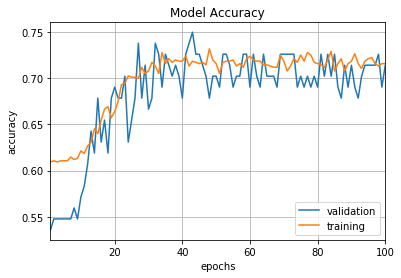

84/84 [==============================] - 0s 88us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.21106721602735065, 0.7142857171240307]
 best Score: 0.7142857171240307          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 0s - loss: 0.5326 - acc: 0.4347 - val_loss: 0.2795 - val_acc: 0.6190
Epoch 2/100
 - 0s - loss: 0.2410 - acc: 0.6027 - val_loss: 0.2551 - val_acc: 0.4405
Epoch 3/100
 - 0s - loss: 0.2386 - acc: 0.5880 - val_loss: 0.2251 - val_acc: 0.6310
Epoch 4/100
 - 0s - loss: 0.2355 - acc: 0.6067 - val_loss: 0.2150 - val_acc: 0.6310
Epoch 5/100
 - 0s - loss: 0.2303 - acc: 0.6000 - val_loss: 0.2105 - val_acc: 0.6310
Epoch 6/100
 - 0s - loss: 0.2275 - acc: 0.6267 - val_loss: 0.2074 - val_acc: 0.6310
Epoch 7/100
 - 0s - loss: 0.2292 - acc: 0.6240 - val_loss: 0.2423 - val_acc: 0.6190
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.1970 - acc: 0.7107 - val_loss: 0.1698 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.1982 - acc: 0.7053 - val_loss: 0.1738 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.2107 - acc: 0.6867 - val_loss: 0.1740 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.2003 - acc: 0.7027 - val_loss: 0.1850 - val_acc: 0.6905
Epoch 97/100
 - 0s - loss: 0.1963 - acc: 0.7147 - val_loss: 0.1702 - val_acc: 0.7619
Epoch 98/100
 - 0s - loss: 0.1984 - acc: 0.7107 - val_loss: 0.1814 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.2016 - acc: 0.7107 - val_loss: 0.1751 - val_acc: 0.7500
Epoch 100/100
 - 0s - loss: 0.2054 - acc: 0.7080 - val_loss: 0.1739 - val_acc: 0.7262


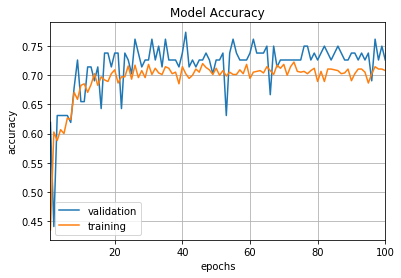

84/84 [==============================] - 0s 85us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.17391750145526158, 0.7261904790287926]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 0s - loss: 0.2993 - acc: 0.5707 - val_loss: 0.2478 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.2422 - acc: 0.5933 - val_loss: 0.2536 - val_acc: 0.4524
Epoch 3/100
 - 0s - loss: 0.2401 - acc: 0.5947 - val_loss: 0.2257 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 0.2384 - acc: 0.6027 - val_loss: 0.2281 - val_acc: 0.6548
Epoch 5/100
 - 0s - loss: 0.2369 - acc: 0.6053 - val_loss: 0.2315 - val_acc: 0.6548
Epoch 6/100
 - 0s - loss: 0.2357 - acc: 0.6013 - val_loss: 0.2211 - val_acc: 0.6786
Epoch 7/100
 - 0s - loss: 0.2320 - acc: 0.6187 - val_loss: 0.2268 - val_acc: 0.6667
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.1940 - acc: 0.7200 - val_loss: 0.1921 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.1949 - acc: 0.7173 - val_loss: 0.1944 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.1950 - acc: 0.7267 - val_loss: 0.1936 - val_acc: 0.7024
Epoch 96/100
 - 0s - loss: 0.1942 - acc: 0.7187 - val_loss: 0.1922 - val_acc: 0.7143
Epoch 97/100
 - 0s - loss: 0.1966 - acc: 0.7240 - val_loss: 0.1931 - val_acc: 0.6905
Epoch 98/100
 - 0s - loss: 0.1948 - acc: 0.7227 - val_loss: 0.1921 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.1937 - acc: 0.7147 - val_loss: 0.1921 - val_acc: 0.7143
Epoch 100/100
 - 0s - loss: 0.1952 - acc: 0.7240 - val_loss: 0.1979 - val_acc: 0.7024


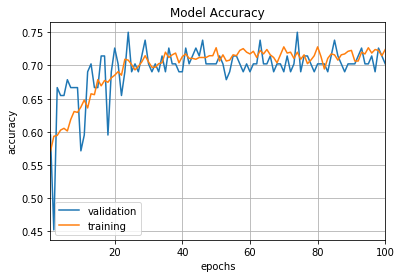

84/84 [==============================] - 0s 36us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.1978605574085599, 0.7023809552192688]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 0s - loss: 0.3000 - acc: 0.5893 - val_loss: 0.2634 - val_acc: 0.5000
Epoch 2/100
 - 0s - loss: 0.2358 - acc: 0.6253 - val_loss: 0.2660 - val_acc: 0.5119
Epoch 3/100
 - 0s - loss: 0.2315 - acc: 0.6307 - val_loss: 0.2569 - val_acc: 0.5119
Epoch 4/100
 - 0s - loss: 0.2334 - acc: 0.6067 - val_loss: 0.2617 - val_acc: 0.5595
Epoch 5/100
 - 0s - loss: 0.2276 - acc: 0.6453 - val_loss: 0.2559 - val_acc: 0.5714
Epoch 6/100
 - 0s - loss: 0.2221 - acc: 0.6467 - val_loss: 0.2641 - val_acc: 0.5595
Epoch 7/100
 - 0s - loss: 0.2197 - acc: 0.6520 - val_loss: 0.2557 - val_acc: 0.5833
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.1912 - acc: 0.7280 - val_loss: 0.2189 - val_acc: 0.6429
Epoch 94/100
 - 0s - loss: 0.1940 - acc: 0.7280 - val_loss: 0.2168 - val_acc: 0.6548
Epoch 95/100
 - 0s - loss: 0.1927 - acc: 0.7240 - val_loss: 0.2168 - val_acc: 0.6667
Epoch 96/100
 - 0s - loss: 0.1929 - acc: 0.7240 - val_loss: 0.2194 - val_acc: 0.6548
Epoch 97/100
 - 0s - loss: 0.1927 - acc: 0.7200 - val_loss: 0.2184 - val_acc: 0.6429
Epoch 98/100
 - 0s - loss: 0.1908 - acc: 0.7187 - val_loss: 0.2164 - val_acc: 0.6667
Epoch 99/100
 - 0s - loss: 0.1928 - acc: 0.7200 - val_loss: 0.2161 - val_acc: 0.6667
Epoch 100/100
 - 0s - loss: 0.1899 - acc: 0.7267 - val_loss: 0.2221 - val_acc: 0.6429


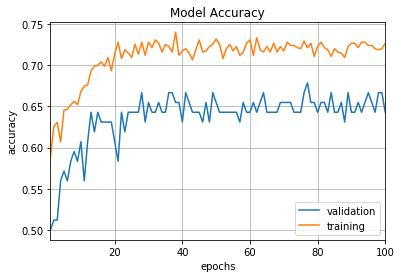

84/84 [==============================] - 0s 43us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.2221348299866631, 0.6428571485337757]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2516 - acc: 0.5699 - val_loss: 0.2372 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.2399 - acc: 0.5939 - val_loss: 0.2150 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.2390 - acc: 0.5992 - val_loss: 0.2175 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.2376 - acc: 0.5912 - val_loss: 0.2185 - val_acc: 0.6867
Epoch 5/100
 - 0s - loss: 0.2358 - acc: 0.5965 - val_loss: 0.2149 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.2354 - acc: 0.6045 - val_loss: 0.2186 - val_acc: 0.6747
Epoch 7/100
 - 0s - loss: 0.2338 - acc: 0.6085 - val_loss: 0.2160 - val_acc: 0.6867
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.1944 - acc: 0.7164 - val_loss: 0.1949 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.1944 - acc: 0.7204 - val_loss: 0.1941 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.1945 - acc: 0.7137 - val_loss: 0.1990 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.1949 - acc: 0.7150 - val_loss: 0.1877 - val_acc: 0.7590
Epoch 97/100
 - 0s - loss: 0.1949 - acc: 0.7111 - val_loss: 0.1870 - val_acc: 0.7590
Epoch 98/100
 - 0s - loss: 0.1946 - acc: 0.7111 - val_loss: 0.1878 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.1941 - acc: 0.7217 - val_loss: 0.1848 - val_acc: 0.7831
Epoch 100/100
 - 0s - loss: 0.1974 - acc: 0.7111 - val_loss: 0.1879 - val_acc: 0.7590


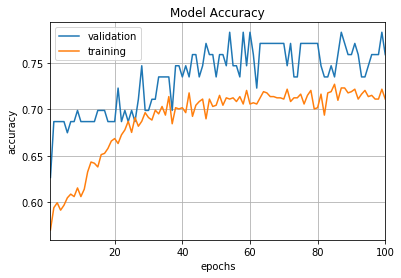

83/83 [==============================] - 0s 50us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.18786703283528247, 0.7590361510414675]
 best Score: 0.7590361510414675          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2450 - acc: 0.6005 - val_loss: 0.2430 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.2408 - acc: 0.6045 - val_loss: 0.2435 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.2392 - acc: 0.6059 - val_loss: 0.2396 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.2400 - acc: 0.6045 - val_loss: 0.2382 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.2365 - acc: 0.6045 - val_loss: 0.2381 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.2357 - acc: 0.6072 - val_loss: 0.2378 - val_acc: 0.5663
Epoch 7/100
 - 0s - loss: 0.2339 - acc: 0.6045 - val_loss: 0.2359 - val_acc: 0.5783
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.1926 - acc: 0.7217 - val_loss: 0.2091 - val_acc: 0.6506
Epoch 94/100
 - 0s - loss: 0.1931 - acc: 0.7244 - val_loss: 0.2081 - val_acc: 0.6506
Epoch 95/100
 - 0s - loss: 0.1934 - acc: 0.7310 - val_loss: 0.2093 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.1946 - acc: 0.7284 - val_loss: 0.2069 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.1923 - acc: 0.7270 - val_loss: 0.2095 - val_acc: 0.6627
Epoch 98/100
 - 0s - loss: 0.1927 - acc: 0.7350 - val_loss: 0.2084 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.1924 - acc: 0.7137 - val_loss: 0.2090 - val_acc: 0.6506
Epoch 100/100
 - 0s - loss: 0.1938 - acc: 0.7270 - val_loss: 0.2067 - val_acc: 0.6145


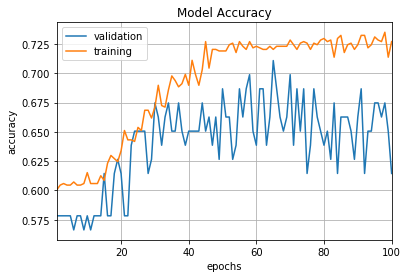

83/83 [==============================] - 0s 43us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.20672814296670708, 0.614457830607173]
 best Score: 0.7590361510414675          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.3984 - acc: 0.4008 - val_loss: 0.2496 - val_acc: 0.5542
Epoch 2/100
 - 0s - loss: 0.2403 - acc: 0.6005 - val_loss: 0.2350 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.2372 - acc: 0.6005 - val_loss: 0.2343 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.2368 - acc: 0.6005 - val_loss: 0.2341 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.2369 - acc: 0.6005 - val_loss: 0.2343 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.2362 - acc: 0.6005 - val_loss: 0.2339 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.2363 - acc: 0.6005 - val_loss: 0.2341 - val_acc: 0.6145
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.1927 - acc: 0.7164 - val_loss: 0.2132 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.1912 - acc: 0.7270 - val_loss: 0.2137 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.1914 - acc: 0.7217 - val_loss: 0.2168 - val_acc: 0.6627
Epoch 96/100
 - 0s - loss: 0.1917 - acc: 0.7297 - val_loss: 0.2132 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.1909 - acc: 0.7270 - val_loss: 0.2125 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.1919 - acc: 0.7244 - val_loss: 0.2148 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.1911 - acc: 0.7217 - val_loss: 0.2152 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.1900 - acc: 0.7310 - val_loss: 0.2100 - val_acc: 0.6988


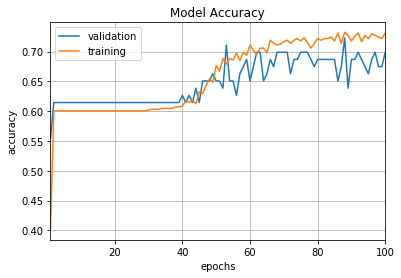

83/83 [==============================] - 0s 67us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.20997647240937475, 0.6987951800047633]
 best Score: 0.7590361510414675          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.3824 - acc: 0.6032 - val_loss: 0.2423 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.2425 - acc: 0.5872 - val_loss: 0.2569 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.2407 - acc: 0.6032 - val_loss: 0.2402 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.2346 - acc: 0.6045 - val_loss: 0.2415 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.2352 - acc: 0.5965 - val_loss: 0.2422 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.2383 - acc: 0.5846 - val_loss: 0.2435 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.2336 - acc: 0.6085 - val_loss: 0.2402 - val_acc: 0.5904
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.1951 - acc: 0.7111 - val_loss: 0.1911 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.1965 - acc: 0.7031 - val_loss: 0.1903 - val_acc: 0.7711
Epoch 95/100
 - 0s - loss: 0.1973 - acc: 0.7124 - val_loss: 0.1901 - val_acc: 0.7590
Epoch 96/100
 - 0s - loss: 0.1981 - acc: 0.7031 - val_loss: 0.1916 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.1953 - acc: 0.7137 - val_loss: 0.1901 - val_acc: 0.7711
Epoch 98/100
 - 0s - loss: 0.1947 - acc: 0.7177 - val_loss: 0.1929 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.2007 - acc: 0.7017 - val_loss: 0.1921 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.1968 - acc: 0.7097 - val_loss: 0.1921 - val_acc: 0.7470


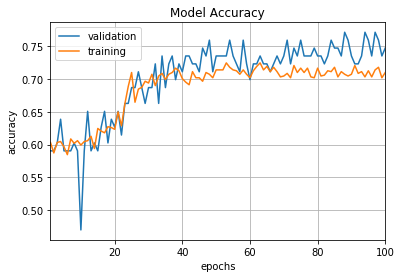

83/83 [==============================] - 0s 69us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.19206313106669, 0.7469879582703832]
 best Score: 0.7590361510414675          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.3968 - acc: 0.6032 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.3968 - acc: 0.6032 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.3967 - acc: 0.6032 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.3966 - acc: 0.6032 - val_loss: 0.4095 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.3880 - acc: 0.6032 - val_loss: 0.3545 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.2345 - acc: 0.6232 - val_loss: 0.2344 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.2293 - acc: 0.6218 - val_loss: 0.2300 - val_acc: 0.6265
Epoch 8/100


Epoch 93/100
 - 0s - loss: 0.1946 - acc: 0.7164 - val_loss: 0.2002 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.1953 - acc: 0.7204 - val_loss: 0.1970 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.1942 - acc: 0.7164 - val_loss: 0.1995 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.1940 - acc: 0.7257 - val_loss: 0.1996 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.1948 - acc: 0.7057 - val_loss: 0.2166 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.1949 - acc: 0.7190 - val_loss: 0.2005 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.1960 - acc: 0.7097 - val_loss: 0.1962 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.1933 - acc: 0.7217 - val_loss: 0.1974 - val_acc: 0.6747


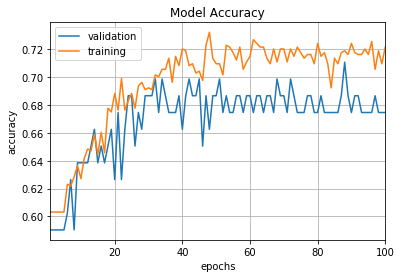

83/83 [==============================] - 0s 55us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.19739802163767528, 0.6746987976941717]
 best Score: 0.7590361510414675          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2551 - acc: 0.5672 - val_loss: 0.2477 - val_acc: 0.5663
Epoch 2/100
 - 0s - loss: 0.2475 - acc: 0.5819 - val_loss: 0.2408 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.2488 - acc: 0.5846 - val_loss: 0.2418 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.2415 - acc: 0.5939 - val_loss: 0.2364 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.2433 - acc: 0.5819 - val_loss: 0.2373 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.2402 - acc: 0.6019 - val_loss: 0.2668 - val_acc: 0.3976
Epoch 7/100
 - 0s - loss: 0.2413 - acc: 0.5739 - val_loss: 0.2311 - val_acc: 0.6145
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.1976 - acc: 0.7044 - val_loss: 0.1819 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.1959 - acc: 0.7150 - val_loss: 0.1827 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.1958 - acc: 0.7084 - val_loss: 0.1854 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.1968 - acc: 0.7137 - val_loss: 0.1821 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.1943 - acc: 0.7150 - val_loss: 0.1832 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.1953 - acc: 0.7204 - val_loss: 0.1825 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.1978 - acc: 0.7124 - val_loss: 0.1828 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.1969 - acc: 0.7111 - val_loss: 0.1870 - val_acc: 0.7349


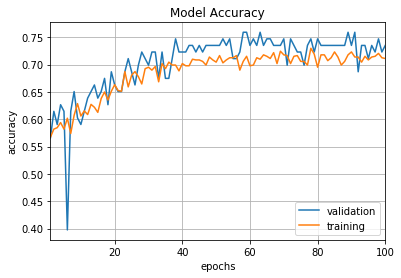

83/83 [==============================] - 0s 94us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.18704312016446906, 0.7349397532911186]
 best Score: 0.7590361510414675          
-------------------------------------------------------------------------------------------




In [9]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.mean_squared_error,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [10]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7590361510414675
0.7014629970814944


[[0.21106721602735065, 0.7142857171240307],
 [0.17391750145526158, 0.7261904790287926],
 [0.1978605574085599, 0.7023809552192688],
 [0.2221348299866631, 0.6428571485337757],
 [0.18786703283528247, 0.7590361510414675],
 [0.20672814296670708, 0.614457830607173],
 [0.20997647240937475, 0.6987951800047633],
 [0.19206313106669, 0.7469879582703832],
 [0.19739802163767528, 0.6746987976941717],
 [0.18704312016446906, 0.7349397532911186]]

In [11]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7186251232033563


[0.7160000022252401,
 0.7080000015099843,
 0.724000001748403,
 0.7266666686534882,
 0.7110519313145572,
 0.7270306262290589,
 0.7310253016640755,
 0.709720374185458,
 0.721704393982411,
 0.7110519305208869]

# 02 # losses.mean_absolute_error,

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 2/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 3/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 4/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 5/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 6/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 7/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 8/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 9/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 10/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 11/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 98/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 99/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643
Epoch 100/100
 - 0s - loss: 0.6093 - acc: 0.3907 - val_loss: 0.5357 - val_acc: 0.4643


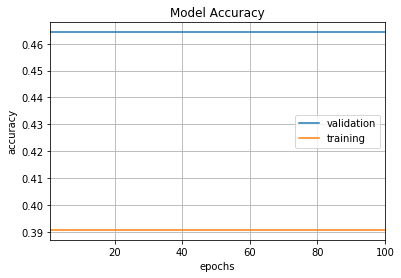

84/84 [==============================] - 0s 47us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.5357143708637783, 0.4642857142857143]
 best Score: 0.4642857142857143          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6191 - val_acc: 0.3810
Epoch 2/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6191 - val_acc: 0.3810
Epoch 3/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6191 - val_acc: 0.3810
Epoch 4/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6191 - val_acc: 0.3810
Epoch 5/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6191 - val_acc: 0.3810
Epoch 6/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6191 - val_acc: 0.3810
Epoch 7/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6191 - val_acc: 0.3810
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6190 - val_acc: 0.3810
Epoch 94/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6190 - val_acc: 0.3810
Epoch 95/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6190 - val_acc: 0.3810
Epoch 96/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6190 - val_acc: 0.3810
Epoch 97/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6190 - val_acc: 0.3810
Epoch 98/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6190 - val_acc: 0.3810
Epoch 99/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6190 - val_acc: 0.3810
Epoch 100/100
 - 0s - loss: 0.6000 - acc: 0.4000 - val_loss: 0.6190 - val_acc: 0.3810


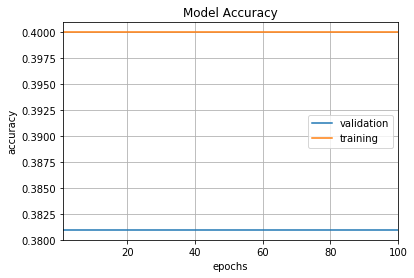

84/84 [==============================] - 0s 83us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6190476218859354, 0.38095238166196005]
 best Score: 0.4642857142857143          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.5956 - acc: 0.4053 - val_loss: 0.6669 - val_acc: 0.3333
Epoch 2/100
 - 0s - loss: 0.5952 - acc: 0.4053 - val_loss: 0.6669 - val_acc: 0.3333
Epoch 3/100
 - 0s - loss: 0.5950 - acc: 0.4053 - val_loss: 0.6668 - val_acc: 0.3333
Epoch 4/100
 - 0s - loss: 0.5949 - acc: 0.4053 - val_loss: 0.6668 - val_acc: 0.3333
Epoch 5/100
 - 0s - loss: 0.5948 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333
Epoch 6/100
 - 0s - loss: 0.5948 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333
Epoch 7/100
 - 0s - loss: 0.5948 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5947 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333
Epoch 94/100
 - 0s - loss: 0.5947 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333
Epoch 95/100
 - 0s - loss: 0.5947 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333
Epoch 96/100
 - 0s - loss: 0.5947 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333
Epoch 97/100
 - 0s - loss: 0.5947 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333
Epoch 98/100
 - 0s - loss: 0.5947 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333
Epoch 99/100
 - 0s - loss: 0.5947 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333
Epoch 100/100
 - 0s - loss: 0.5947 - acc: 0.4053 - val_loss: 0.6667 - val_acc: 0.3333


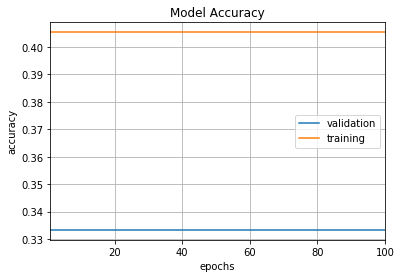

84/84 [==============================] - 0s 58us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.6666666723432995, 0.33333333475249155]
 best Score: 0.4642857142857143          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.3894 - acc: 0.6107 - val_loss: 0.4744 - val_acc: 0.5238
Epoch 2/100
 - 0s - loss: 0.3885 - acc: 0.6107 - val_loss: 0.4744 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: 0.3883 - acc: 0.6107 - val_loss: 0.4743 - val_acc: 0.5238
Epoch 4/100
 - 0s - loss: 0.3883 - acc: 0.6107 - val_loss: 0.4740 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: 0.3883 - acc: 0.6107 - val_loss: 0.4741 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: 0.3882 - acc: 0.6107 - val_loss: 0.4741 - val_acc: 0.5238
Epoch 7/100
 - 0s - loss: 0.3882 - acc: 0.6107 - val_loss: 0.4740 - val_acc: 0.5238
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.2770 - acc: 0.7267 - val_loss: 0.3427 - val_acc: 0.6667
Epoch 94/100
 - 0s - loss: 0.2741 - acc: 0.7280 - val_loss: 0.3430 - val_acc: 0.6548
Epoch 95/100
 - 0s - loss: 0.2744 - acc: 0.7307 - val_loss: 0.3422 - val_acc: 0.6667
Epoch 96/100
 - 0s - loss: 0.2746 - acc: 0.7267 - val_loss: 0.3425 - val_acc: 0.6548
Epoch 97/100
 - 0s - loss: 0.2733 - acc: 0.7253 - val_loss: 0.3427 - val_acc: 0.6548
Epoch 98/100
 - 0s - loss: 0.2726 - acc: 0.7280 - val_loss: 0.3416 - val_acc: 0.6667
Epoch 99/100
 - 0s - loss: 0.2735 - acc: 0.7267 - val_loss: 0.3419 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.2727 - acc: 0.7293 - val_loss: 0.3421 - val_acc: 0.6548


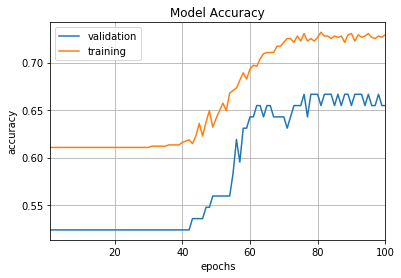

84/84 [==============================] - 0s 51us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.3421101030849275, 0.6547619076002211]
 best Score: 0.6547619076002211          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.4707 - acc: 0.5925 - val_loss: 0.4102 - val_acc: 0.6867
Epoch 2/100
 - 0s - loss: 0.4368 - acc: 0.5925 - val_loss: 0.3607 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.4164 - acc: 0.5925 - val_loss: 0.3245 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.4071 - acc: 0.5925 - val_loss: 0.3185 - val_acc: 0.6867
Epoch 5/100
 - 0s - loss: 0.4066 - acc: 0.5925 - val_loss: 0.3173 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.4064 - acc: 0.5925 - val_loss: 0.3165 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.4063 - acc: 0.5925 - val_loss: 0.3165 - val_acc: 0.6867
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.3682 - acc: 0.6565 - val_loss: 0.3237 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.3683 - acc: 0.6498 - val_loss: 0.3248 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.3660 - acc: 0.6551 - val_loss: 0.3262 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.3655 - acc: 0.6551 - val_loss: 0.3255 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.3646 - acc: 0.6525 - val_loss: 0.3268 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.3635 - acc: 0.6591 - val_loss: 0.3289 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.3622 - acc: 0.6538 - val_loss: 0.3254 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.3614 - acc: 0.6644 - val_loss: 0.3231 - val_acc: 0.6988


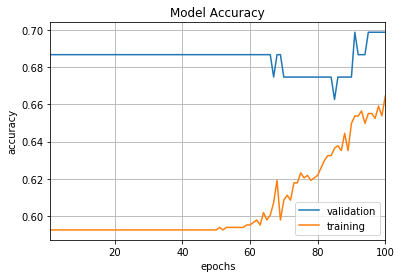

83/83 [==============================] - 0s 95us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.32305393520608006, 0.6987951835954046]
 best Score: 0.6987951835954046          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.4984 - acc: 0.5726 - val_loss: 0.4971 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.4944 - acc: 0.6045 - val_loss: 0.4946 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.4912 - acc: 0.6045 - val_loss: 0.4920 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.4877 - acc: 0.6045 - val_loss: 0.4894 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.4842 - acc: 0.6045 - val_loss: 0.4867 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.4807 - acc: 0.6045 - val_loss: 0.4842 - val_acc: 0.5783
Epoch 7/100
 - 0s - loss: 0.4773 - acc: 0.6045 - val_loss: 0.4817 - val_acc: 0.5783
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.3960 - acc: 0.6045 - val_loss: 0.4220 - val_acc: 0.5783
Epoch 94/100
 - 0s - loss: 0.3959 - acc: 0.6045 - val_loss: 0.4220 - val_acc: 0.5783
Epoch 95/100
 - 0s - loss: 0.3959 - acc: 0.6045 - val_loss: 0.4220 - val_acc: 0.5783
Epoch 96/100
 - 0s - loss: 0.3959 - acc: 0.6045 - val_loss: 0.4220 - val_acc: 0.5783
Epoch 97/100
 - 0s - loss: 0.3958 - acc: 0.6045 - val_loss: 0.4220 - val_acc: 0.5783
Epoch 98/100
 - 0s - loss: 0.3958 - acc: 0.6045 - val_loss: 0.4219 - val_acc: 0.5783
Epoch 99/100
 - 0s - loss: 0.3958 - acc: 0.6045 - val_loss: 0.4219 - val_acc: 0.5783
Epoch 100/100
 - 0s - loss: 0.3958 - acc: 0.6045 - val_loss: 0.4219 - val_acc: 0.5783


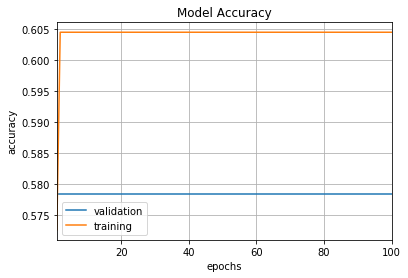

83/83 [==============================] - 0s 54us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.4219115028180272, 0.5783132472670222]
 best Score: 0.6987951835954046          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.4032 - acc: 0.6005 - val_loss: 0.3864 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.3990 - acc: 0.6005 - val_loss: 0.3863 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.3990 - acc: 0.6005 - val_loss: 0.3863 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.3990 - acc: 0.6005 - val_loss: 0.3862 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.3990 - acc: 0.6005 - val_loss: 0.3862 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.3989 - acc: 0.6005 - val_loss: 0.3862 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.3989 - acc: 0.6005 - val_loss: 0.3862 - val_acc: 0.6145
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.2887 - acc: 0.7310 - val_loss: 0.3322 - val_acc: 0.6627
Epoch 94/100
 - 0s - loss: 0.2922 - acc: 0.7230 - val_loss: 0.3221 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.2884 - acc: 0.7270 - val_loss: 0.3252 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.2872 - acc: 0.7257 - val_loss: 0.3209 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.2882 - acc: 0.7230 - val_loss: 0.3205 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.2851 - acc: 0.7230 - val_loss: 0.3263 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.2880 - acc: 0.7284 - val_loss: 0.3238 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.2863 - acc: 0.7284 - val_loss: 0.3229 - val_acc: 0.6867


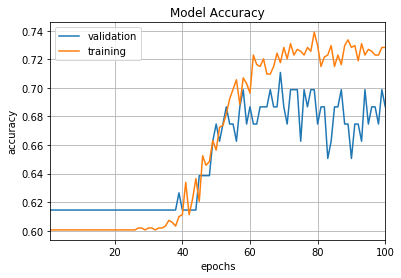

83/83 [==============================] - 0s 58us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.32288981956171703, 0.6867469822067812]
 best Score: 0.6987951835954046          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 2/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 3/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 4/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 5/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 6/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 7/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 94/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 95/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 96/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 97/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 98/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 99/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 100/100
 - 0s - loss: 0.6032 - acc: 0.3968 - val_loss: 0.5904 - val_acc: 0.4096


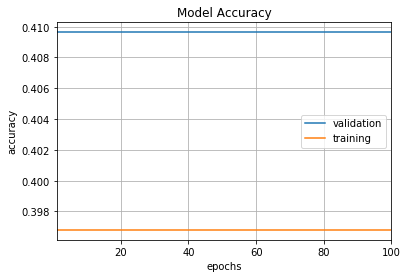

83/83 [==============================] - 0s 103us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.590361450091902, 0.40963855673031635]
 best Score: 0.6987951835954046          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.4031 - acc: 0.6019 - val_loss: 0.4099 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.3965 - acc: 0.6032 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.3963 - acc: 0.6032 - val_loss: 0.4095 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.3962 - acc: 0.6032 - val_loss: 0.4094 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.3961 - acc: 0.6032 - val_loss: 0.4093 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.3960 - acc: 0.6032 - val_loss: 0.4093 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.3960 - acc: 0.6032 - val_loss: 0.4092 - val_acc: 0.5904
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.2893 - acc: 0.7230 - val_loss: 0.3144 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.2888 - acc: 0.7190 - val_loss: 0.3188 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.2885 - acc: 0.7177 - val_loss: 0.3166 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.2879 - acc: 0.7270 - val_loss: 0.3114 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.2896 - acc: 0.7177 - val_loss: 0.3199 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.2891 - acc: 0.7177 - val_loss: 0.3190 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.2876 - acc: 0.7217 - val_loss: 0.3158 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.2882 - acc: 0.7217 - val_loss: 0.3209 - val_acc: 0.6747


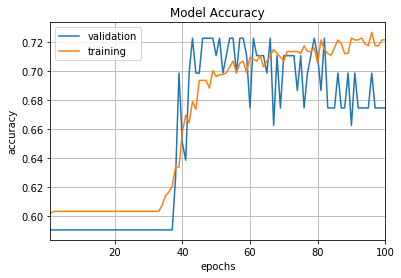

83/83 [==============================] - 0s 199us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.32092096073081694, 0.6746987976941717]
 best Score: 0.6987951835954046          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.6008 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 2/100
 - 0s - loss: 0.6006 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 3/100
 - 0s - loss: 0.6006 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 4/100
 - 0s - loss: 0.6006 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 5/100
 - 0s - loss: 0.6006 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 6/100
 - 0s - loss: 0.6006 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 7/100
 - 0s - loss: 0.6006 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 8

Epoch 93/100
 - 0s - loss: 0.6005 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 94/100
 - 0s - loss: 0.6005 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 95/100
 - 0s - loss: 0.6005 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 96/100
 - 0s - loss: 0.6005 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 97/100
 - 0s - loss: 0.6005 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 98/100
 - 0s - loss: 0.6005 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 99/100
 - 0s - loss: 0.6005 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855
Epoch 100/100
 - 0s - loss: 0.6005 - acc: 0.3995 - val_loss: 0.6145 - val_acc: 0.3855


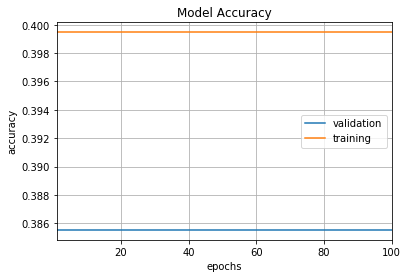

83/83 [==============================] - 0s 106us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6144578356340707, 0.38554217118814765]
 best Score: 0.6987951835954046          
-------------------------------------------------------------------------------------------




In [12]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss= losses.mean_absolute_error,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])
    
    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [13]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.6987951835954046
0.526706827698223


[[0.5357143708637783, 0.4642857142857143],
 [0.6190476218859354, 0.38095238166196005],
 [0.6666666723432995, 0.33333333475249155],
 [0.3421101030849275, 0.6547619076002211],
 [0.32305393520608006, 0.6987951835954046],
 [0.4219115028180272, 0.5783132472670222],
 [0.32288981956171703, 0.6867469822067812],
 [0.590361450091902, 0.40963855673031635],
 [0.32092096073081694, 0.6746987976941717],
 [0.6144578356340707, 0.38554217118814765]]

In [14]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.5440646289530934


[0.39066667437553404,
 0.40000000576178235,
 0.4053333389759064,
 0.7293333331743876,
 0.6644474058033782,
 0.6045273020565907,
 0.7283621820882855,
 0.3968042671958235,
 0.7217043964427892,
 0.39946738365645734]

# 03 # losses.mean_absolute_percentage_error,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 197048388.1067 - acc: 0.6093 - val_loss: 228694191.4286 - val_acc: 0.5357
Epoch 2/100
 - 0s - loss: 195173036.5867 - acc: 0.6093 - val_loss: 229440536.0000 - val_acc: 0.5357
Epoch 3/100
 - 0s - loss: 195010565.4733 - acc: 0.6093 - val_loss: 229558053.7143 - val_acc: 0.5357
Epoch 4/100
 - 0s - loss: 194955768.2133 - acc: 0.6093 - val_loss: 229615947.8095 - val_acc: 0.5357
Epoch 5/100
 - 0s - loss: 194929004.2667 - acc: 0.6093 - val_loss: 229777048.5714 - val_acc: 0.5357
Epoch 6/100
 - 0s - loss: 194900114.6133 - acc: 0.6093 - val_loss: 229893364.0000 - val_acc: 0.5357
Epoch 7/100
 - 0s - loss: 194882918.5600 - acc: 0.6093 - val_loss: 230001106.2857 - val_acc: 0.5357
Epoch 8/100
 - 0s - loss: 194862281.7600 - acc: 0.6093 - val_loss: 229857901.9048 - val_acc: 0.5357
Epoch 9/100
 - 0s - loss: 194840433.2400 - acc: 0.6093 - val_loss: 229693072.5714 - val_acc: 0.5357
Epoch 10/100
 - 0s - loss: 194834601.5467 - acc

Epoch 82/100
 - 0s - loss: 141437863.2000 - acc: 0.7253 - val_loss: 145283377.0952 - val_acc: 0.7262
Epoch 83/100
 - 0s - loss: 139843439.4767 - acc: 0.7307 - val_loss: 150438407.0238 - val_acc: 0.7024
Epoch 84/100
 - 0s - loss: 141465543.2108 - acc: 0.7240 - val_loss: 142282710.9762 - val_acc: 0.7500
Epoch 85/100
 - 0s - loss: 141307346.9733 - acc: 0.7200 - val_loss: 142853621.9762 - val_acc: 0.7500
Epoch 86/100
 - 0s - loss: 142288238.4633 - acc: 0.7240 - val_loss: 142511815.5476 - val_acc: 0.7619
Epoch 87/100
 - 0s - loss: 140805895.5200 - acc: 0.7307 - val_loss: 145576109.7143 - val_acc: 0.7143
Epoch 88/100
 - 0s - loss: 142589877.8000 - acc: 0.7187 - val_loss: 142198307.0714 - val_acc: 0.7500
Epoch 89/100
 - 0s - loss: 141102984.3733 - acc: 0.7280 - val_loss: 143679499.9048 - val_acc: 0.7262
Epoch 90/100
 - 0s - loss: 142354099.9758 - acc: 0.7200 - val_loss: 153492397.9048 - val_acc: 0.7024
Epoch 91/100
 - 0s - loss: 141487839.2667 - acc: 0.7213 - val_loss: 165820000.2381 - val_ac

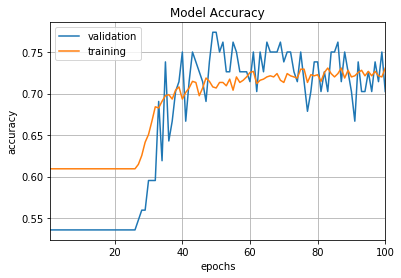

84/84 [==============================] - 0s 76us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [145518896.76190478, 0.7023809467043195]
 best Score: 0.7023809467043195          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 300168156.5867 - acc: 0.4000 - val_loss: 309773953.5238 - val_acc: 0.3810
Epoch 2/100
 - 0s - loss: 300095278.7200 - acc: 0.4000 - val_loss: 309701560.0000 - val_acc: 0.3810
Epoch 3/100
 - 0s - loss: 300064957.0133 - acc: 0.4000 - val_loss: 309656843.4286 - val_acc: 0.3810
Epoch 4/100
 - 0s - loss: 300049301.0133 - acc: 0.4000 - val_loss: 309624267.4286 - val_acc: 0.3810
Epoch 5/100
 - 0s - loss: 300038644.3733 - acc: 0.4000 - val_loss: 309606733.3333 - val_acc: 0.3810
Epoch 6/100
 - 0s - loss: 300031689.0667 - acc: 0.4000 - val_loss: 309590908.9524 - val_acc: 0.381

Epoch 79/100
 - 0s - loss: 300000063.2533 - acc: 0.4000 - val_loss: 309523856.3810 - val_acc: 0.3810
Epoch 80/100
 - 0s - loss: 300000062.7200 - acc: 0.4000 - val_loss: 309523856.3810 - val_acc: 0.3810
Epoch 81/100
 - 0s - loss: 300000059.2000 - acc: 0.4000 - val_loss: 309523856.3810 - val_acc: 0.3810
Epoch 82/100
 - 0s - loss: 300000057.8133 - acc: 0.4000 - val_loss: 309523856.3810 - val_acc: 0.3810
Epoch 83/100
 - 0s - loss: 300000059.4133 - acc: 0.4000 - val_loss: 309523856.3810 - val_acc: 0.3810
Epoch 84/100
 - 0s - loss: 300000058.2400 - acc: 0.4000 - val_loss: 309523854.4762 - val_acc: 0.3810
Epoch 85/100
 - 0s - loss: 300000052.9067 - acc: 0.4000 - val_loss: 309523854.4762 - val_acc: 0.3810
Epoch 86/100
 - 0s - loss: 300000052.6933 - acc: 0.4000 - val_loss: 309523854.4762 - val_acc: 0.3810
Epoch 87/100
 - 0s - loss: 300000052.6933 - acc: 0.4000 - val_loss: 309523854.4762 - val_acc: 0.3810
Epoch 88/100
 - 0s - loss: 300000049.0667 - acc: 0.4000 - val_loss: 309523854.4762 - val_ac

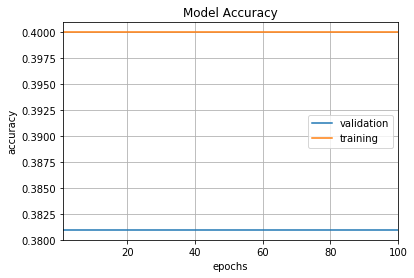

84/84 [==============================] - 0s 256us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [309523849.14285713, 0.38095238166196005]
 best Score: 0.7023809467043195          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 202621930.8267 - acc: 0.5947 - val_loss: 166636299.2381 - val_acc: 0.6667
Epoch 2/100
 - 0s - loss: 202552269.0133 - acc: 0.5947 - val_loss: 166832441.6190 - val_acc: 0.6667
Epoch 3/100
 - 0s - loss: 202405685.2267 - acc: 0.5947 - val_loss: 167109886.0000 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 202324860.3733 - acc: 0.5947 - val_loss: 167194815.4286 - val_acc: 0.6667
Epoch 5/100
 - 0s - loss: 202085134.7600 - acc: 0.5947 - val_loss: 166906702.6667 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 201946745.8467 - acc: 0.5947 - val_loss: 167280770.0952 - val_acc: 0.6

Epoch 79/100
 - 0s - loss: 143919936.8367 - acc: 0.7067 - val_loss: 133684450.5000 - val_acc: 0.7262
Epoch 80/100
 - 0s - loss: 142046776.6454 - acc: 0.7240 - val_loss: 133544297.3571 - val_acc: 0.7381
Epoch 81/100
 - 0s - loss: 142707674.1333 - acc: 0.7240 - val_loss: 133724156.5238 - val_acc: 0.7262
Epoch 82/100
 - 0s - loss: 141324226.5067 - acc: 0.7200 - val_loss: 134590874.4881 - val_acc: 0.7381
Epoch 83/100
 - 0s - loss: 142696656.7333 - acc: 0.7240 - val_loss: 134444153.6786 - val_acc: 0.7262
Epoch 84/100
 - 0s - loss: 144634927.2533 - acc: 0.7093 - val_loss: 133421931.2381 - val_acc: 0.7262
Epoch 85/100
 - 0s - loss: 142969972.7267 - acc: 0.7133 - val_loss: 136090689.2857 - val_acc: 0.7262
Epoch 86/100
 - 0s - loss: 139833583.4467 - acc: 0.7320 - val_loss: 134745876.9048 - val_acc: 0.7262
Epoch 87/100
 - 0s - loss: 144087867.6000 - acc: 0.7147 - val_loss: 136534010.0476 - val_acc: 0.7262
Epoch 88/100
 - 0s - loss: 141921312.2917 - acc: 0.7227 - val_loss: 135373999.5714 - val_ac

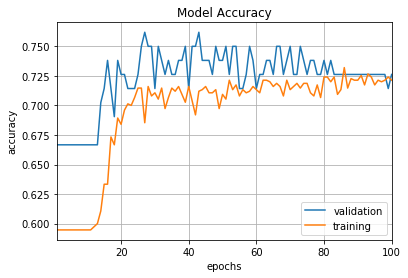

84/84 [==============================] - 0s 84us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [137553775.23809522, 0.7261904790287926]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 230800816.4267 - acc: 0.5653 - val_loss: 237553246.0952 - val_acc: 0.5238
Epoch 2/100
 - 0s - loss: 199009423.2533 - acc: 0.6107 - val_loss: 236429693.3333 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: 195570854.8800 - acc: 0.6107 - val_loss: 236552241.1429 - val_acc: 0.5238
Epoch 4/100
 - 0s - loss: 194853500.9067 - acc: 0.6107 - val_loss: 236689203.0476 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: 194517918.2800 - acc: 0.6107 - val_loss: 236749297.9048 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: 194375784.6933 - acc: 0.6107 - val_loss: 236821398.2857 - val_acc: 0.523

Epoch 79/100
 - 0s - loss: 144596946.4333 - acc: 0.7227 - val_loss: 175502283.0476 - val_acc: 0.6667
Epoch 80/100
 - 0s - loss: 144409999.2517 - acc: 0.7227 - val_loss: 175570230.6667 - val_acc: 0.6667
Epoch 81/100
 - 0s - loss: 144422895.0267 - acc: 0.7200 - val_loss: 174995974.8571 - val_acc: 0.6667
Epoch 82/100
 - 0s - loss: 143506393.2267 - acc: 0.7187 - val_loss: 174698968.5714 - val_acc: 0.6548
Epoch 83/100
 - 0s - loss: 144169407.2800 - acc: 0.7227 - val_loss: 174487141.3333 - val_acc: 0.6190
Epoch 84/100
 - 0s - loss: 143908101.3333 - acc: 0.7187 - val_loss: 175267504.0000 - val_acc: 0.6786
Epoch 85/100
 - 0s - loss: 143120124.8783 - acc: 0.7227 - val_loss: 174492834.8571 - val_acc: 0.6667
Epoch 86/100
 - 0s - loss: 142784787.8133 - acc: 0.7267 - val_loss: 174038578.4762 - val_acc: 0.6190
Epoch 87/100
 - 0s - loss: 143365350.5600 - acc: 0.7160 - val_loss: 174691200.7619 - val_acc: 0.6786
Epoch 88/100
 - 0s - loss: 142362072.1850 - acc: 0.7280 - val_loss: 175283103.2381 - val_ac

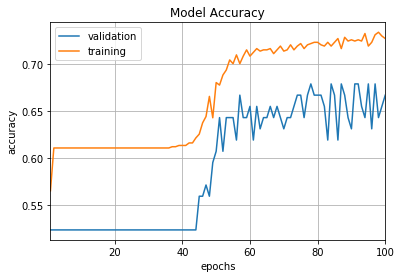

84/84 [==============================] - 0s 138us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [173558015.23809522, 0.6666666695049831]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 296883418.3245 - acc: 0.4075 - val_loss: 342930519.9036 - val_acc: 0.3133
Epoch 2/100
 - 0s - loss: 296618150.4128 - acc: 0.4075 - val_loss: 343113394.8916 - val_acc: 0.3133
Epoch 3/100
 - 0s - loss: 296502444.8895 - acc: 0.4075 - val_loss: 343189506.1205 - val_acc: 0.3133
Epoch 4/100
 - 0s - loss: 296444906.4181 - acc: 0.4075 - val_loss: 343243786.6024 - val_acc: 0.3133
Epoch 5/100
 - 0s - loss: 296402639.9197 - acc: 0.4075 - val_loss: 343282431.4217 - val_acc: 0.3133
Epoch 6/100
 - 0s - loss: 296369672.3302 - acc: 0.4075 - val_loss: 343302818.6988 - val_acc: 0.31

Epoch 79/100
 - 0s - loss: 296271725.1451 - acc: 0.4075 - val_loss: 343373523.6627 - val_acc: 0.3133
Epoch 80/100
 - 0s - loss: 296271722.3968 - acc: 0.4075 - val_loss: 343373523.6627 - val_acc: 0.3133
Epoch 81/100
 - 0s - loss: 296271716.9427 - acc: 0.4075 - val_loss: 343373523.6627 - val_acc: 0.3133
Epoch 82/100
 - 0s - loss: 296271713.8216 - acc: 0.4075 - val_loss: 343373523.6627 - val_acc: 0.3133
Epoch 83/100
 - 0s - loss: 296271713.3956 - acc: 0.4075 - val_loss: 343373523.6627 - val_acc: 0.3133
Epoch 84/100
 - 0s - loss: 296271713.5340 - acc: 0.4075 - val_loss: 343373523.6627 - val_acc: 0.3133
Epoch 85/100
 - 0s - loss: 296271707.3555 - acc: 0.4075 - val_loss: 343373523.6627 - val_acc: 0.3133
Epoch 86/100
 - 0s - loss: 296271705.7790 - acc: 0.4075 - val_loss: 343373523.6627 - val_acc: 0.3133
Epoch 87/100
 - 0s - loss: 296271703.2224 - acc: 0.4075 - val_loss: 343373525.5904 - val_acc: 0.3133
Epoch 88/100
 - 0s - loss: 296271693.8482 - acc: 0.4075 - val_loss: 343373523.6627 - val_ac

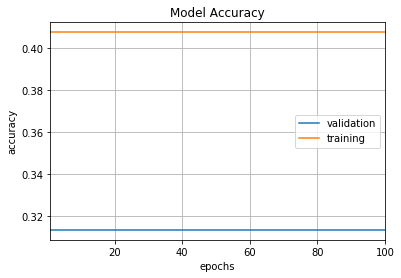

83/83 [==============================] - 0s 127us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [343373524.8192771, 0.3132530091756798]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 197375456.3924 - acc: 0.6045 - val_loss: 207741758.6506 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 196709048.9854 - acc: 0.6045 - val_loss: 206138140.9157 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 196555587.4850 - acc: 0.6045 - val_loss: 206194004.6265 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 194816624.7377 - acc: 0.6045 - val_loss: 201288505.6386 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 193869390.7643 - acc: 0.6059 - val_loss: 197472422.9398 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 191042617.1744 - acc: 0.6059 - val_loss: 196384311.3253 - val_acc: 0.578

Epoch 79/100
 - 0s - loss: 139323323.8690 - acc: 0.7310 - val_loss: 153060029.8795 - val_acc: 0.7108
Epoch 80/100
 - 0s - loss: 137604510.7740 - acc: 0.7257 - val_loss: 171451413.7831 - val_acc: 0.6627
Epoch 81/100
 - 0s - loss: 139346747.1955 - acc: 0.7244 - val_loss: 160426802.8916 - val_acc: 0.6867
Epoch 82/100
 - 0s - loss: 137873344.8026 - acc: 0.7324 - val_loss: 164159611.0843 - val_acc: 0.6867
Epoch 83/100
 - 0s - loss: 138446106.7007 - acc: 0.7324 - val_loss: 149591426.2169 - val_acc: 0.7108
Epoch 84/100
 - 0s - loss: 139721486.6838 - acc: 0.7270 - val_loss: 166369708.1446 - val_acc: 0.6747
Epoch 85/100
 - 0s - loss: 138266737.0231 - acc: 0.7270 - val_loss: 163111258.9880 - val_acc: 0.6747
Epoch 86/100
 - 0s - loss: 139040309.1751 - acc: 0.7244 - val_loss: 171266360.0000 - val_acc: 0.6627
Epoch 87/100
 - 0s - loss: 139168217.5766 - acc: 0.7257 - val_loss: 172086355.9518 - val_acc: 0.6627
Epoch 88/100
 - 0s - loss: 139794208.1122 - acc: 0.7230 - val_loss: 159873544.4819 - val_ac

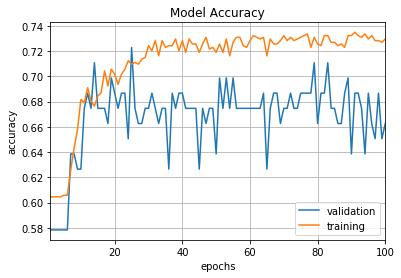

83/83 [==============================] - 0s 131us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [170401201.1566265, 0.662650606718408]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 232478529.5659 - acc: 0.6005 - val_loss: 218848658.5060 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 210536252.8149 - acc: 0.6005 - val_loss: 200501862.5542 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 201932523.0493 - acc: 0.6005 - val_loss: 195775751.1325 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 199982547.2383 - acc: 0.6005 - val_loss: 194360848.6747 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 199515952.8675 - acc: 0.6005 - val_loss: 193824984.8675 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 199249203.0040 - acc: 0.6005 - val_loss: 193474977.5422 - val_acc: 0.6145

Epoch 79/100
 - 0s - loss: 139598790.9333 - acc: 0.7244 - val_loss: 162838525.4940 - val_acc: 0.6747
Epoch 80/100
 - 0s - loss: 139062887.7383 - acc: 0.7310 - val_loss: 162918636.1446 - val_acc: 0.6867
Epoch 81/100
 - 0s - loss: 138731586.5419 - acc: 0.7324 - val_loss: 162824142.0723 - val_acc: 0.6867
Epoch 82/100
 - 0s - loss: 138693508.6042 - acc: 0.7324 - val_loss: 163212146.1205 - val_acc: 0.6867
Epoch 83/100
 - 0s - loss: 138489068.2159 - acc: 0.7337 - val_loss: 162809815.1325 - val_acc: 0.6867
Epoch 84/100
 - 0s - loss: 139560688.9201 - acc: 0.7270 - val_loss: 163764677.6867 - val_acc: 0.6867
Epoch 85/100
 - 0s - loss: 138149703.9467 - acc: 0.7377 - val_loss: 162889749.3976 - val_acc: 0.6988
Epoch 86/100
 - 0s - loss: 138665453.5642 - acc: 0.7297 - val_loss: 162813466.5060 - val_acc: 0.6747
Epoch 87/100
 - 0s - loss: 137455696.9268 - acc: 0.7337 - val_loss: 162999652.5301 - val_acc: 0.6627
Epoch 88/100
 - 0s - loss: 137785187.8935 - acc: 0.7284 - val_loss: 164146309.2048 - val_ac

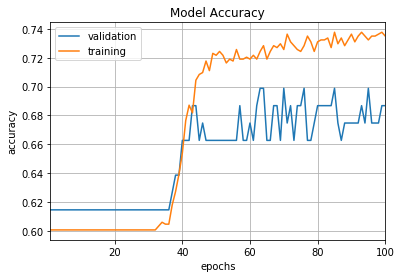

83/83 [==============================] - 0s 82us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [162773387.95180723, 0.6867469822067812]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 198049405.5132 - acc: 0.6032 - val_loss: 204188482.8434 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 197858552.3449 - acc: 0.6032 - val_loss: 204020299.2711 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 197726767.7973 - acc: 0.6032 - val_loss: 203944941.9217 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 197613033.3089 - acc: 0.6032 - val_loss: 203827546.1747 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 197496512.1718 - acc: 0.6032 - val_loss: 203671632.3253 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 197392679.9667 - acc: 0.6032 - val_loss: 203516215.3614 - val_acc: 0.590

Epoch 79/100
 - 0s - loss: 137703296.8766 - acc: 0.7310 - val_loss: 140624043.1390 - val_acc: 0.7229
Epoch 80/100
 - 0s - loss: 138528410.3562 - acc: 0.7310 - val_loss: 141829836.7160 - val_acc: 0.7349
Epoch 81/100
 - 0s - loss: 138040634.4586 - acc: 0.7324 - val_loss: 147464476.6439 - val_acc: 0.6988
Epoch 82/100
 - 0s - loss: 138120274.6705 - acc: 0.7284 - val_loss: 141768863.2472 - val_acc: 0.7349
Epoch 83/100
 - 0s - loss: 137403280.6734 - acc: 0.7310 - val_loss: 141635957.9625 - val_acc: 0.7349
Epoch 84/100
 - 0s - loss: 136917823.7882 - acc: 0.7337 - val_loss: 140972454.0428 - val_acc: 0.7349
Epoch 85/100
 - 0s - loss: 137400393.1706 - acc: 0.7310 - val_loss: 140446746.5111 - val_acc: 0.7229
Epoch 86/100
 - 0s - loss: 136675777.6821 - acc: 0.7324 - val_loss: 144092536.1089 - val_acc: 0.7229
Epoch 87/100
 - 0s - loss: 137674232.9907 - acc: 0.7284 - val_loss: 143542008.6047 - val_acc: 0.7229
Epoch 88/100
 - 0s - loss: 136994417.3003 - acc: 0.7337 - val_loss: 140569268.3073 - val_ac

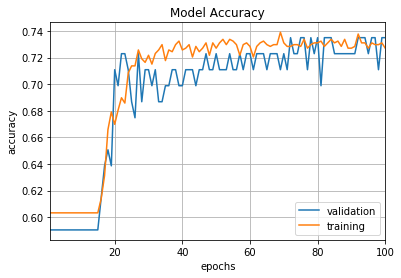

83/83 [==============================] - 0s 336us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [141943439.71084338, 0.7349397604724011]
 best Score: 0.7349397604724011          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 300435924.2237 - acc: 0.3968 - val_loss: 290723607.9036 - val_acc: 0.4096
Epoch 2/100
 - 0s - loss: 275566561.3635 - acc: 0.4368 - val_loss: 217707219.2771 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 204167653.3928 - acc: 0.6032 - val_loss: 204690471.3253 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 198456617.5979 - acc: 0.6032 - val_loss: 203445778.5060 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 197421151.9414 - acc: 0.6032 - val_loss: 202700648.6747 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 196721607.4754 - acc: 0.6032 - val_loss: 201719601.5422 - val_acc: 0.59

Epoch 79/100
 - 0s - loss: 140005472.1881 - acc: 0.7257 - val_loss: 156031152.0000 - val_acc: 0.7108
Epoch 80/100
 - 0s - loss: 141918601.1843 - acc: 0.7270 - val_loss: 154310221.1084 - val_acc: 0.6988
Epoch 81/100
 - 0s - loss: 140031102.0586 - acc: 0.7350 - val_loss: 154180731.3735 - val_acc: 0.6988
Epoch 82/100
 - 0s - loss: 143275801.9990 - acc: 0.7217 - val_loss: 154691910.3614 - val_acc: 0.6867
Epoch 83/100
 - 0s - loss: 139408850.1877 - acc: 0.7310 - val_loss: 154227563.3735 - val_acc: 0.6988
Epoch 84/100
 - 0s - loss: 139908666.4980 - acc: 0.7324 - val_loss: 154112080.0000 - val_acc: 0.6988
Epoch 85/100
 - 0s - loss: 141195513.4660 - acc: 0.7297 - val_loss: 155198828.1446 - val_acc: 0.6747
Epoch 86/100
 - 0s - loss: 139856383.0768 - acc: 0.7284 - val_loss: 155557407.2289 - val_acc: 0.6867
Epoch 87/100
 - 0s - loss: 139961261.4896 - acc: 0.7324 - val_loss: 155142527.8072 - val_acc: 0.6867
Epoch 88/100
 - 0s - loss: 139773488.9337 - acc: 0.7337 - val_loss: 153601356.1446 - val_ac

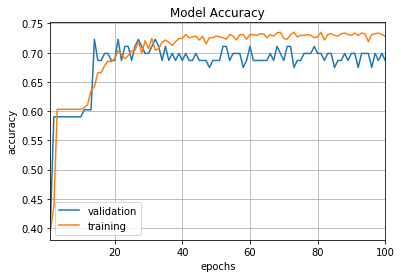

83/83 [==============================] - 0s 64us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [154903666.69879517, 0.6867469922605768]
 best Score: 0.7349397604724011          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 199516669.8211 - acc: 0.6005 - val_loss: 192897048.2892 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 199309850.9867 - acc: 0.6005 - val_loss: 192969645.4940 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 199137854.0821 - acc: 0.6005 - val_loss: 193063030.7470 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 199009166.3406 - acc: 0.6005 - val_loss: 193127105.9277 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 198988137.5459 - acc: 0.6005 - val_loss: 193126622.8434 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 198949948.3342 - acc: 0.6005 - val_loss: 193129839.8072 - val_acc: 0.61

Epoch 79/100
 - 0s - loss: 149809992.7896 - acc: 0.7057 - val_loss: 133834762.4096 - val_acc: 0.7711
Epoch 80/100
 - 0s - loss: 150342486.4416 - acc: 0.7017 - val_loss: 135384071.2289 - val_acc: 0.7590
Epoch 81/100
 - 0s - loss: 149978267.1212 - acc: 0.7057 - val_loss: 133540548.7229 - val_acc: 0.7590
Epoch 82/100
 - 0s - loss: 148389044.9241 - acc: 0.7071 - val_loss: 132213882.6024 - val_acc: 0.7590
Epoch 83/100
 - 0s - loss: 147887237.4107 - acc: 0.7137 - val_loss: 131541340.9157 - val_acc: 0.7831
Epoch 84/100
 - 0s - loss: 148362572.1546 - acc: 0.7150 - val_loss: 132228105.7349 - val_acc: 0.7470
Epoch 85/100
 - 0s - loss: 148662365.3606 - acc: 0.7137 - val_loss: 139053315.3735 - val_acc: 0.7349
Epoch 86/100
 - 0s - loss: 147950756.8732 - acc: 0.7084 - val_loss: 132848324.8193 - val_acc: 0.7590
Epoch 87/100
 - 0s - loss: 147748295.1522 - acc: 0.7137 - val_loss: 130032119.1325 - val_acc: 0.7590
Epoch 88/100
 - 0s - loss: 147391603.2318 - acc: 0.7150 - val_loss: 128317706.0241 - val_ac

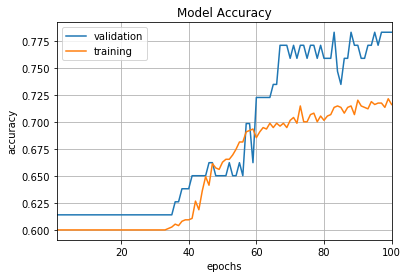

83/83 [==============================] - 0s 209us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [125182008.86746988, 0.7831325243754559]
 best Score: 0.7831325243754559          
-------------------------------------------------------------------------------------------




In [15]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.mean_absolute_percentage_error,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [16]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7831325243754559
0.6343660352109359


[[145518896.76190478, 0.7023809467043195],
 [309523849.14285713, 0.38095238166196005],
 [137553775.23809522, 0.7261904790287926],
 [173558015.23809522, 0.6666666695049831],
 [343373524.8192771, 0.3132530091756798],
 [170401201.1566265, 0.662650606718408],
 [162773387.95180723, 0.6867469822067812],
 [141943439.71084338, 0.7349397604724011],
 [154903666.69879517, 0.6867469922605768],
 [125182008.86746988, 0.7831325243754559]]

In [17]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6622608099675713


[0.7306666676203409,
 0.4000000062584877,
 0.7213333332538605,
 0.7266666666666667,
 0.40745673133196747,
 0.7296937423126992,
 0.7350199752736505,
 0.7270306278163996,
 0.7283621860566374,
 0.7163781630850029]

# 04 # losses.mean_squared_logarithmic_error,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.1615 - acc: 0.6093 - val_loss: 0.1255 - val_acc: 0.5476
Epoch 2/100
 - 0s - loss: 0.1139 - acc: 0.6120 - val_loss: 0.1186 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.1135 - acc: 0.6133 - val_loss: 0.1203 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 0.1143 - acc: 0.6160 - val_loss: 0.1186 - val_acc: 0.5476
Epoch 5/100
 - 0s - loss: 0.1132 - acc: 0.6107 - val_loss: 0.1188 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 0.1128 - acc: 0.6253 - val_loss: 0.1207 - val_acc: 0.5476
Epoch 7/100
 - 0s - loss: 0.1125 - acc: 0.6147 - val_loss: 0.1180 - val_acc: 0.5595
Epoch 8/100
 - 0s - loss: 0.1126 - acc: 0.6200 - val_loss: 0.1180 - val_acc: 0.5595
Epoch 9/100
 - 0s - loss: 0.1120 - acc: 0.6187 - val_loss: 0.1177 - val_acc: 0.5714
Epoch 10/100
 - 0s - loss: 0.1119 - acc: 0.6320 - val_loss: 0.1167 - val_acc: 0.5714
Epoch 11/100
 - 0s - loss: 0.1113 - acc: 0.6293 - val_loss: 0.1158 - val_acc: 0.5833
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.0934 - acc: 0.7280 - val_loss: 0.1036 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.0931 - acc: 0.7293 - val_loss: 0.1033 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.0928 - acc: 0.7387 - val_loss: 0.1025 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.0931 - acc: 0.7400 - val_loss: 0.1027 - val_acc: 0.7143


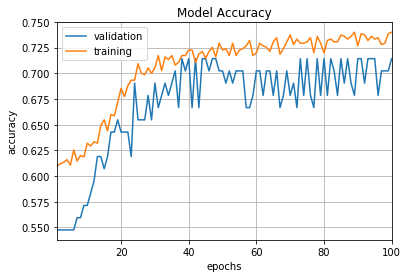

84/84 [==============================] - 0s 96us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.10272828737894694, 0.7142857171240307]
 best Score: 0.7142857171240307          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.1182 - acc: 0.6000 - val_loss: 0.1130 - val_acc: 0.6190
Epoch 2/100
 - 0s - loss: 0.1174 - acc: 0.6000 - val_loss: 0.1127 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.1171 - acc: 0.6000 - val_loss: 0.1124 - val_acc: 0.6190
Epoch 4/100
 - 0s - loss: 0.1169 - acc: 0.6000 - val_loss: 0.1124 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.1166 - acc: 0.6000 - val_loss: 0.1118 - val_acc: 0.6190
Epoch 6/100
 - 0s - loss: 0.1163 - acc: 0.6000 - val_loss: 0.1115 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.1159 - acc: 0.6000 - val_loss: 0.1108 - val_acc: 0.6190
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0960 - acc: 0.7160 - val_loss: 0.0850 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.0959 - acc: 0.7160 - val_loss: 0.0855 - val_acc: 0.7619
Epoch 95/100
 - 0s - loss: 0.0958 - acc: 0.7120 - val_loss: 0.0861 - val_acc: 0.7738
Epoch 96/100
 - 0s - loss: 0.0963 - acc: 0.7173 - val_loss: 0.0857 - val_acc: 0.7738
Epoch 97/100
 - 0s - loss: 0.0959 - acc: 0.7120 - val_loss: 0.0861 - val_acc: 0.7738
Epoch 98/100
 - 0s - loss: 0.0960 - acc: 0.7133 - val_loss: 0.0858 - val_acc: 0.7738
Epoch 99/100
 - 0s - loss: 0.0957 - acc: 0.7147 - val_loss: 0.0848 - val_acc: 0.7619
Epoch 100/100
 - 0s - loss: 0.0957 - acc: 0.7147 - val_loss: 0.0862 - val_acc: 0.7738


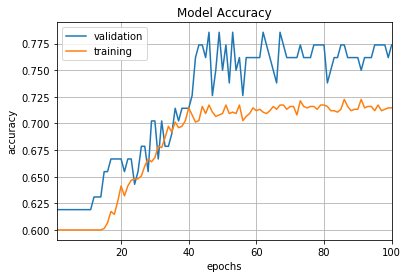

84/84 [==============================] - 0s 66us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.08622733539059049, 0.7738095266478402]
 best Score: 0.7738095266478402          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.1594 - acc: 0.5907 - val_loss: 0.1164 - val_acc: 0.6905
Epoch 2/100
 - 0s - loss: 0.1150 - acc: 0.6120 - val_loss: 0.1093 - val_acc: 0.6667
Epoch 3/100
 - 0s - loss: 0.1143 - acc: 0.6107 - val_loss: 0.1060 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 0.1135 - acc: 0.6200 - val_loss: 0.1031 - val_acc: 0.6786
Epoch 5/100
 - 0s - loss: 0.1119 - acc: 0.6293 - val_loss: 0.1052 - val_acc: 0.6905
Epoch 6/100
 - 0s - loss: 0.1110 - acc: 0.6347 - val_loss: 0.1039 - val_acc: 0.7024
Epoch 7/100
 - 0s - loss: 0.1100 - acc: 0.6413 - val_loss: 0.1030 - val_acc: 0.7262
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0959 - acc: 0.7333 - val_loss: 0.0946 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.0940 - acc: 0.7307 - val_loss: 0.1010 - val_acc: 0.6905
Epoch 95/100
 - 0s - loss: 0.0957 - acc: 0.7213 - val_loss: 0.0930 - val_acc: 0.6905
Epoch 96/100
 - 0s - loss: 0.0955 - acc: 0.7253 - val_loss: 0.0950 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.0948 - acc: 0.7267 - val_loss: 0.0946 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.0950 - acc: 0.7240 - val_loss: 0.0944 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.0946 - acc: 0.7267 - val_loss: 0.0936 - val_acc: 0.6905
Epoch 100/100
 - 0s - loss: 0.0950 - acc: 0.7280 - val_loss: 0.0958 - val_acc: 0.7024


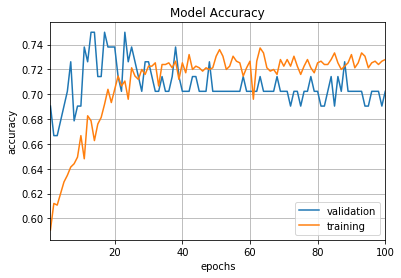

84/84 [==============================] - 0s 99us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.09575632214546204, 0.7023809552192688]
 best Score: 0.7738095266478402          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.1165 - acc: 0.6107 - val_loss: 0.1243 - val_acc: 0.5238
Epoch 2/100
 - 0s - loss: 0.1148 - acc: 0.6107 - val_loss: 0.1262 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: 0.1132 - acc: 0.6107 - val_loss: 0.1274 - val_acc: 0.5238
Epoch 4/100
 - 0s - loss: 0.1132 - acc: 0.6107 - val_loss: 0.1259 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: 0.1126 - acc: 0.6107 - val_loss: 0.1229 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: 0.1121 - acc: 0.6107 - val_loss: 0.1269 - val_acc: 0.5238
Epoch 7/100
 - 0s - loss: 0.1116 - acc: 0.6107 - val_loss: 0.1284 - val_acc: 0.5238
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0935 - acc: 0.7227 - val_loss: 0.1136 - val_acc: 0.6548
Epoch 94/100
 - 0s - loss: 0.0932 - acc: 0.7267 - val_loss: 0.1136 - val_acc: 0.6548
Epoch 95/100
 - 0s - loss: 0.0948 - acc: 0.7147 - val_loss: 0.1113 - val_acc: 0.6548
Epoch 96/100
 - 0s - loss: 0.0939 - acc: 0.7240 - val_loss: 0.1128 - val_acc: 0.6548
Epoch 97/100
 - 0s - loss: 0.0931 - acc: 0.7187 - val_loss: 0.1170 - val_acc: 0.6190
Epoch 98/100
 - 0s - loss: 0.0932 - acc: 0.7293 - val_loss: 0.1151 - val_acc: 0.6310
Epoch 99/100
 - 0s - loss: 0.0938 - acc: 0.7240 - val_loss: 0.1122 - val_acc: 0.6667
Epoch 100/100
 - 0s - loss: 0.0931 - acc: 0.7333 - val_loss: 0.1164 - val_acc: 0.6310


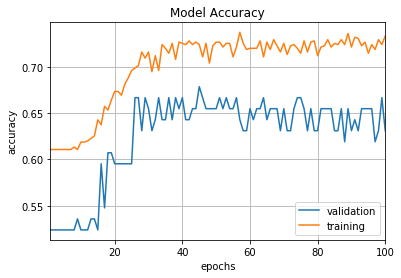

84/84 [==============================] - 0s 118us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.11635980364822206, 0.6309523866290138]
 best Score: 0.7738095266478402          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 0.1216 - acc: 0.5925 - val_loss: 0.1073 - val_acc: 0.6867
Epoch 2/100
 - 0s - loss: 0.1157 - acc: 0.5925 - val_loss: 0.1040 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.1156 - acc: 0.5925 - val_loss: 0.1064 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.1149 - acc: 0.5925 - val_loss: 0.1058 - val_acc: 0.6867
Epoch 5/100
 - 0s - loss: 0.1144 - acc: 0.5925 - val_loss: 0.1039 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.1139 - acc: 0.5939 - val_loss: 0.1064 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.1144 - acc: 0.6005 - val_loss: 0.1055 - val_acc: 0.6867
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0956 - acc: 0.7124 - val_loss: 0.0961 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.0958 - acc: 0.7137 - val_loss: 0.0944 - val_acc: 0.7711
Epoch 95/100
 - 0s - loss: 0.0953 - acc: 0.7177 - val_loss: 0.0937 - val_acc: 0.7831
Epoch 96/100
 - 0s - loss: 0.0955 - acc: 0.7164 - val_loss: 0.0937 - val_acc: 0.7831
Epoch 97/100
 - 0s - loss: 0.0952 - acc: 0.7204 - val_loss: 0.0929 - val_acc: 0.7831
Epoch 98/100
 - 0s - loss: 0.0955 - acc: 0.7150 - val_loss: 0.0942 - val_acc: 0.7711
Epoch 99/100
 - 0s - loss: 0.0953 - acc: 0.7111 - val_loss: 0.0973 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.0952 - acc: 0.7150 - val_loss: 0.0928 - val_acc: 0.7831


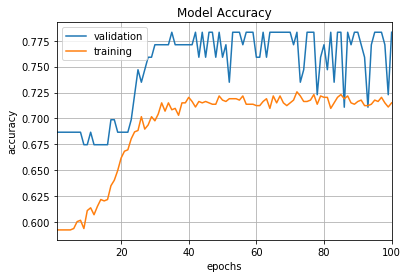

83/83 [==============================] - 0s 118us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.09284238696816456, 0.7831325315567385]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 0.1352 - acc: 0.5899 - val_loss: 0.1165 - val_acc: 0.5663
Epoch 2/100
 - 0s - loss: 0.1205 - acc: 0.5832 - val_loss: 0.1160 - val_acc: 0.5663
Epoch 3/100
 - 0s - loss: 0.1184 - acc: 0.6045 - val_loss: 0.1146 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.1170 - acc: 0.6019 - val_loss: 0.1134 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.1148 - acc: 0.6005 - val_loss: 0.1120 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.1135 - acc: 0.6045 - val_loss: 0.1115 - val_acc: 0.5783
Epoch 7/100
 - 0s - loss: 0.1128 - acc: 0.6125 - val_loss: 0.1099 - val_acc: 0.5904
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0956 - acc: 0.7177 - val_loss: 0.0983 - val_acc: 0.6627
Epoch 94/100
 - 0s - loss: 0.0952 - acc: 0.7257 - val_loss: 0.0993 - val_acc: 0.6145
Epoch 95/100
 - 0s - loss: 0.0946 - acc: 0.7310 - val_loss: 0.1026 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.0960 - acc: 0.7204 - val_loss: 0.0983 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.0956 - acc: 0.7111 - val_loss: 0.0984 - val_acc: 0.6386
Epoch 98/100
 - 0s - loss: 0.0957 - acc: 0.7244 - val_loss: 0.0982 - val_acc: 0.6506
Epoch 99/100
 - 0s - loss: 0.0953 - acc: 0.7137 - val_loss: 0.0987 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.0958 - acc: 0.7217 - val_loss: 0.0983 - val_acc: 0.6506


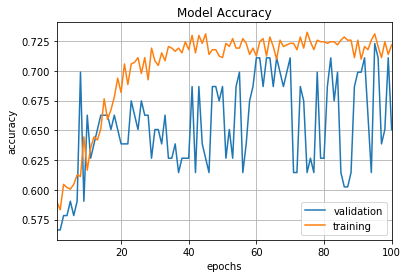

83/83 [==============================] - 0s 264us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.09826705909996147, 0.6506024139473238]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.2597 - acc: 0.3995 - val_loss: 0.1568 - val_acc: 0.3855
Epoch 2/100
 - 0s - loss: 0.1251 - acc: 0.5220 - val_loss: 0.1137 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.1154 - acc: 0.6005 - val_loss: 0.1131 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.1145 - acc: 0.6005 - val_loss: 0.1130 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.1138 - acc: 0.6019 - val_loss: 0.1126 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.1131 - acc: 0.6019 - val_loss: 0.1124 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.1126 - acc: 0.6032 - val_loss: 0.1119 - val_acc: 0.6145
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0940 - acc: 0.7124 - val_loss: 0.1062 - val_acc: 0.6627
Epoch 94/100
 - 0s - loss: 0.0937 - acc: 0.7190 - val_loss: 0.1033 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.0934 - acc: 0.7150 - val_loss: 0.1027 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.0945 - acc: 0.7177 - val_loss: 0.1054 - val_acc: 0.6627
Epoch 97/100
 - 0s - loss: 0.0938 - acc: 0.7164 - val_loss: 0.1031 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.0939 - acc: 0.7111 - val_loss: 0.1031 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.0939 - acc: 0.7230 - val_loss: 0.1037 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.0932 - acc: 0.7164 - val_loss: 0.1057 - val_acc: 0.6627


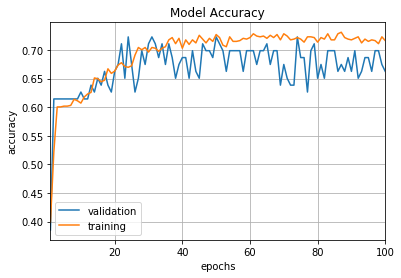

83/83 [==============================] - 0s 128us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.10565250124557908, 0.6626506016915104]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.2896 - acc: 0.3968 - val_loss: 0.2823 - val_acc: 0.4096
Epoch 2/100
 - 0s - loss: 0.2306 - acc: 0.4301 - val_loss: 0.1186 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.1149 - acc: 0.6019 - val_loss: 0.1137 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.1116 - acc: 0.6085 - val_loss: 0.1118 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.1095 - acc: 0.6192 - val_loss: 0.1088 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.1079 - acc: 0.6352 - val_loss: 0.1076 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.1066 - acc: 0.6511 - val_loss: 0.1067 - val_acc: 0.6265
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0954 - acc: 0.7164 - val_loss: 0.0927 - val_acc: 0.7590
Epoch 94/100
 - 0s - loss: 0.0935 - acc: 0.7204 - val_loss: 0.0951 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.0942 - acc: 0.7177 - val_loss: 0.0930 - val_acc: 0.7590
Epoch 96/100
 - 0s - loss: 0.0949 - acc: 0.7257 - val_loss: 0.0927 - val_acc: 0.7590
Epoch 97/100
 - 0s - loss: 0.0951 - acc: 0.7217 - val_loss: 0.0934 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.0960 - acc: 0.7084 - val_loss: 0.0933 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.0942 - acc: 0.7244 - val_loss: 0.0938 - val_acc: 0.7470
Epoch 100/100
 - 0s - loss: 0.0952 - acc: 0.7150 - val_loss: 0.0930 - val_acc: 0.7590


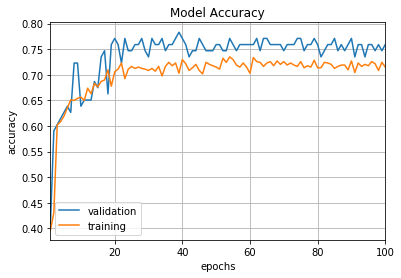

83/83 [==============================] - 0s 397us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.0930413552616016, 0.7590361510414675]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.1243 - acc: 0.5246 - val_loss: 0.1207 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.1182 - acc: 0.6032 - val_loss: 0.1181 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.1162 - acc: 0.6032 - val_loss: 0.1181 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.1160 - acc: 0.6032 - val_loss: 0.1182 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.1158 - acc: 0.6032 - val_loss: 0.1181 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.1157 - acc: 0.6032 - val_loss: 0.1181 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.1158 - acc: 0.6032 - val_loss: 0.1179 - val_acc: 0.5904
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0958 - acc: 0.7177 - val_loss: 0.0987 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.0951 - acc: 0.7177 - val_loss: 0.0956 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.0955 - acc: 0.7124 - val_loss: 0.0959 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.0953 - acc: 0.7150 - val_loss: 0.0963 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.0948 - acc: 0.7177 - val_loss: 0.1128 - val_acc: 0.6627
Epoch 98/100
 - 0s - loss: 0.0956 - acc: 0.7270 - val_loss: 0.0982 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.0950 - acc: 0.7217 - val_loss: 0.0971 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.0951 - acc: 0.7204 - val_loss: 0.0974 - val_acc: 0.7108


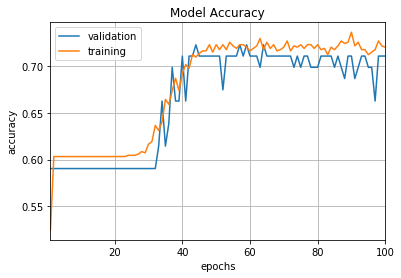

83/83 [==============================] - 0s 136us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.09736731145755355, 0.7108433778027454]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.1649 - acc: 0.5020 - val_loss: 0.1153 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.1175 - acc: 0.6005 - val_loss: 0.1138 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.1164 - acc: 0.6005 - val_loss: 0.1141 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.1153 - acc: 0.6005 - val_loss: 0.1124 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.1153 - acc: 0.6005 - val_loss: 0.1116 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.1143 - acc: 0.6005 - val_loss: 0.1111 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.1137 - acc: 0.5979 - val_loss: 0.1103 - val_acc: 0.6145
Epoch 8

Epoch 93/100
 - 0s - loss: 0.0947 - acc: 0.7111 - val_loss: 0.0896 - val_acc: 0.7470
Epoch 94/100
 - 0s - loss: 0.0952 - acc: 0.7150 - val_loss: 0.0884 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.0950 - acc: 0.7190 - val_loss: 0.0885 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.0952 - acc: 0.7150 - val_loss: 0.0888 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.0949 - acc: 0.7217 - val_loss: 0.0885 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.0948 - acc: 0.7177 - val_loss: 0.0886 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.0947 - acc: 0.7230 - val_loss: 0.0886 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.0952 - acc: 0.7097 - val_loss: 0.0887 - val_acc: 0.7349


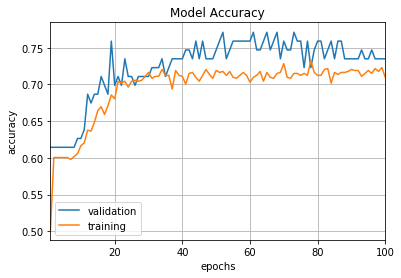

83/83 [==============================] - 0s 168us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.08873477820531432, 0.7349397619086576]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------




In [18]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.mean_squared_logarithmic_error,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [19]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7831325315567385
0.7122633423568596


[[0.10272828737894694, 0.7142857171240307],
 [0.08622733539059049, 0.7738095266478402],
 [0.09575632214546204, 0.7023809552192688],
 [0.11635980364822206, 0.6309523866290138],
 [0.09284238696816456, 0.7831325315567385],
 [0.09826705909996147, 0.6506024139473238],
 [0.10565250124557908, 0.6626506016915104],
 [0.0930413552616016, 0.7590361510414675],
 [0.09736731145755355, 0.7108433778027454],
 [0.08873477820531432, 0.7349397619086576]]

In [20]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7214268985738026


[0.74,
 0.7146666661898295,
 0.728000002304713,
 0.7333333357175191,
 0.7150466056384355,
 0.7217043964427892,
 0.7163781606246248,
 0.7150466096067873,
 0.7203728389168548,
 0.7097203702964732]

# 05 #losses.squared_hinge,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 3s - loss: 0.7638 - acc: 0.4013 - val_loss: 0.6253 - val_acc: 0.5357
Epoch 2/100
 - 0s - loss: 0.6175 - acc: 0.6093 - val_loss: 0.6245 - val_acc: 0.5357
Epoch 3/100
 - 0s - loss: 0.6175 - acc: 0.6093 - val_loss: 0.6242 - val_acc: 0.5357
Epoch 4/100
 - 0s - loss: 0.6171 - acc: 0.6093 - val_loss: 0.6247 - val_acc: 0.5357
Epoch 5/100
 - 0s - loss: 0.6172 - acc: 0.6093 - val_loss: 0.6243 - val_acc: 0.5357
Epoch 6/100
 - 0s - loss: 0.6171 - acc: 0.6093 - val_loss: 0.6240 - val_acc: 0.5357
Epoch 7/100
 - 0s - loss: 0.6168 - acc: 0.6093 - val_loss: 0.6245 - val_acc: 0.5357
Epoch 8/100
 - 0s - loss: 0.6168 - acc: 0.6093 - val_loss: 0.6243 - val_acc: 0.5357
Epoch 9/100
 - 0s - loss: 0.6168 - acc: 0.6093 - val_loss: 0.6240 - val_acc: 0.5357
Epoch 10/100
 - 0s - loss: 0.6169 - acc: 0.6093 - val_loss: 0.6238 - val_acc: 0.5357
Epoch 11/100
 - 0s - loss: 0.6165 - acc: 0.6093 - val_loss: 0.6242 - val_acc: 0.5357
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.5963 - acc: 0.7213 - val_loss: 0.6064 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.5977 - acc: 0.7213 - val_loss: 0.6051 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.5973 - acc: 0.7227 - val_loss: 0.6048 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.5965 - acc: 0.7133 - val_loss: 0.6041 - val_acc: 0.7143


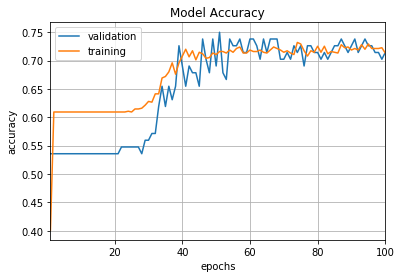

84/84 [==============================] - 0s 113us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6041095143272763, 0.7142857199623471]
 best Score: 0.7142857199623471          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 3s - loss: 0.6473 - acc: 0.6013 - val_loss: 0.6128 - val_acc: 0.6310
Epoch 2/100
 - 0s - loss: 0.6167 - acc: 0.5947 - val_loss: 0.6114 - val_acc: 0.6310
Epoch 3/100
 - 0s - loss: 0.6153 - acc: 0.6000 - val_loss: 0.6102 - val_acc: 0.6429
Epoch 4/100
 - 0s - loss: 0.6151 - acc: 0.6080 - val_loss: 0.6124 - val_acc: 0.6548
Epoch 5/100
 - 0s - loss: 0.6139 - acc: 0.6240 - val_loss: 0.6103 - val_acc: 0.6429
Epoch 6/100
 - 0s - loss: 0.6140 - acc: 0.6227 - val_loss: 0.6083 - val_acc: 0.6548
Epoch 7/100
 - 0s - loss: 0.6120 - acc: 0.6253 - val_loss: 0.6071 - val_acc: 0.6548
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5968 - acc: 0.7133 - val_loss: 0.5865 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.5968 - acc: 0.7120 - val_loss: 0.5865 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.5968 - acc: 0.7147 - val_loss: 0.5902 - val_acc: 0.7262
Epoch 96/100
 - 0s - loss: 0.5971 - acc: 0.7133 - val_loss: 0.5905 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.5983 - acc: 0.7067 - val_loss: 0.5876 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.5971 - acc: 0.7173 - val_loss: 0.5872 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.5975 - acc: 0.7200 - val_loss: 0.5898 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.5975 - acc: 0.7107 - val_loss: 0.5861 - val_acc: 0.7619


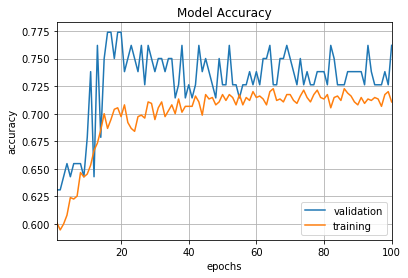

84/84 [==============================] - 0s 106us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.586115593001956, 0.7619047647430783]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 3s - loss: 0.7947 - acc: 0.4053 - val_loss: 0.8091 - val_acc: 0.3333
Epoch 2/100
 - 0s - loss: 0.6591 - acc: 0.5040 - val_loss: 0.6024 - val_acc: 0.6667
Epoch 3/100
 - 0s - loss: 0.6190 - acc: 0.5960 - val_loss: 0.6003 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 0.6184 - acc: 0.5987 - val_loss: 0.6049 - val_acc: 0.6905
Epoch 5/100
 - 0s - loss: 0.6180 - acc: 0.6000 - val_loss: 0.6013 - val_acc: 0.6786
Epoch 6/100
 - 0s - loss: 0.6157 - acc: 0.5973 - val_loss: 0.6003 - val_acc: 0.6667
Epoch 7/100
 - 0s - loss: 0.6163 - acc: 0.6080 - val_loss: 0.5989 - val_acc: 0.6667
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5957 - acc: 0.7200 - val_loss: 0.5938 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.5958 - acc: 0.7227 - val_loss: 0.5944 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.5972 - acc: 0.7147 - val_loss: 0.5928 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.5973 - acc: 0.7173 - val_loss: 0.5958 - val_acc: 0.7381
Epoch 97/100
 - 0s - loss: 0.5966 - acc: 0.7160 - val_loss: 0.5926 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.5961 - acc: 0.7267 - val_loss: 0.5931 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.5960 - acc: 0.7200 - val_loss: 0.5926 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.5961 - acc: 0.7200 - val_loss: 0.5967 - val_acc: 0.7381


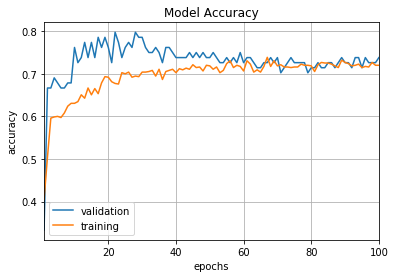

84/84 [==============================] - 0s 82us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.596685699054173, 0.7380952409335545]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 3s - loss: 0.6198 - acc: 0.5813 - val_loss: 0.6276 - val_acc: 0.5357
Epoch 2/100
 - 0s - loss: 0.6146 - acc: 0.6320 - val_loss: 0.6258 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.6137 - acc: 0.6213 - val_loss: 0.6229 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.6139 - acc: 0.6427 - val_loss: 0.6235 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.6126 - acc: 0.6307 - val_loss: 0.6300 - val_acc: 0.5357
Epoch 6/100
 - 0s - loss: 0.6125 - acc: 0.6360 - val_loss: 0.6228 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.6114 - acc: 0.6480 - val_loss: 0.6241 - val_acc: 0.5833
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.5956 - acc: 0.7200 - val_loss: 0.6193 - val_acc: 0.6429
Epoch 94/100
 - 0s - loss: 0.5945 - acc: 0.7280 - val_loss: 0.6105 - val_acc: 0.6667
Epoch 95/100
 - 0s - loss: 0.5959 - acc: 0.7160 - val_loss: 0.6143 - val_acc: 0.6548
Epoch 96/100
 - 0s - loss: 0.5951 - acc: 0.7253 - val_loss: 0.6181 - val_acc: 0.6429
Epoch 97/100
 - 0s - loss: 0.5949 - acc: 0.7320 - val_loss: 0.6115 - val_acc: 0.6429
Epoch 98/100
 - 0s - loss: 0.5950 - acc: 0.7307 - val_loss: 0.6145 - val_acc: 0.6548
Epoch 99/100
 - 0s - loss: 0.5948 - acc: 0.7347 - val_loss: 0.6143 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.5950 - acc: 0.7280 - val_loss: 0.6163 - val_acc: 0.6190


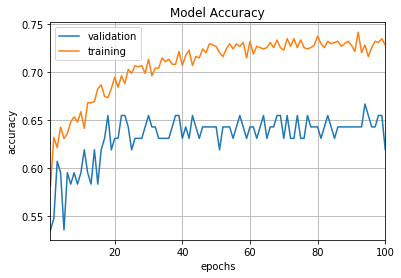

84/84 [==============================] - 0s 107us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6162668125970023, 0.6190476218859354]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.6194 - acc: 0.5925 - val_loss: 0.6109 - val_acc: 0.6867
Epoch 2/100
 - 0s - loss: 0.6183 - acc: 0.5925 - val_loss: 0.6098 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.6179 - acc: 0.5925 - val_loss: 0.6102 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.6175 - acc: 0.5925 - val_loss: 0.6099 - val_acc: 0.6867
Epoch 5/100
 - 0s - loss: 0.6170 - acc: 0.5952 - val_loss: 0.6086 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.6168 - acc: 0.5979 - val_loss: 0.6091 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.6164 - acc: 0.5979 - val_loss: 0.6089 - val_acc: 0.6867
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5984 - acc: 0.7097 - val_loss: 0.5968 - val_acc: 0.7711
Epoch 94/100
 - 0s - loss: 0.5985 - acc: 0.7150 - val_loss: 0.5955 - val_acc: 0.7590
Epoch 95/100
 - 0s - loss: 0.5984 - acc: 0.7111 - val_loss: 0.5965 - val_acc: 0.7711
Epoch 96/100
 - 0s - loss: 0.5984 - acc: 0.7097 - val_loss: 0.5957 - val_acc: 0.7590
Epoch 97/100
 - 0s - loss: 0.5984 - acc: 0.7084 - val_loss: 0.5970 - val_acc: 0.7711
Epoch 98/100
 - 0s - loss: 0.5983 - acc: 0.7111 - val_loss: 0.5965 - val_acc: 0.7711
Epoch 99/100
 - 0s - loss: 0.5984 - acc: 0.7111 - val_loss: 0.5965 - val_acc: 0.7711
Epoch 100/100
 - 0s - loss: 0.5987 - acc: 0.7071 - val_loss: 0.5948 - val_acc: 0.7711


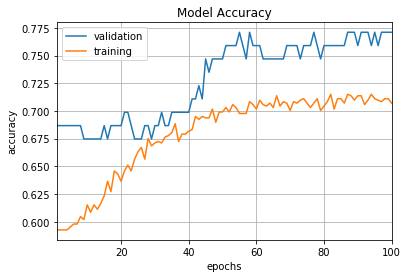

83/83 [==============================] - 0s 109us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5948376590947071, 0.7710843387856541]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.6938 - acc: 0.6045 - val_loss: 0.6836 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.6273 - acc: 0.6085 - val_loss: 0.6158 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.6165 - acc: 0.6085 - val_loss: 0.6183 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.6152 - acc: 0.6072 - val_loss: 0.6160 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6141 - acc: 0.6178 - val_loss: 0.6153 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.6129 - acc: 0.6165 - val_loss: 0.6160 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.6136 - acc: 0.6178 - val_loss: 0.6133 - val_acc: 0.5904
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5977 - acc: 0.7204 - val_loss: 0.5995 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5970 - acc: 0.7177 - val_loss: 0.6002 - val_acc: 0.6265
Epoch 95/100
 - 0s - loss: 0.5975 - acc: 0.7230 - val_loss: 0.5992 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.5990 - acc: 0.7190 - val_loss: 0.5994 - val_acc: 0.6627
Epoch 97/100
 - 0s - loss: 0.5990 - acc: 0.7164 - val_loss: 0.5998 - val_acc: 0.6506
Epoch 98/100
 - 0s - loss: 0.5977 - acc: 0.7230 - val_loss: 0.5997 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.5979 - acc: 0.7190 - val_loss: 0.5999 - val_acc: 0.6265
Epoch 100/100
 - 0s - loss: 0.5975 - acc: 0.7164 - val_loss: 0.5991 - val_acc: 0.6988


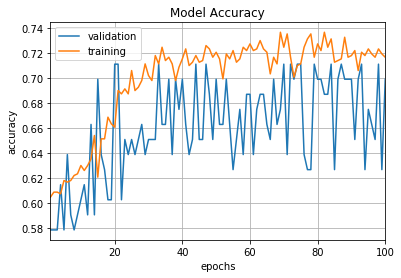

83/83 [==============================] - 0s 154us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.5990550776562059, 0.6987951749778656]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.7914 - acc: 0.3995 - val_loss: 0.7432 - val_acc: 0.3855
Epoch 2/100
 - 0s - loss: 0.6502 - acc: 0.4913 - val_loss: 0.6176 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6189 - acc: 0.6005 - val_loss: 0.6173 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6181 - acc: 0.6005 - val_loss: 0.6168 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6177 - acc: 0.6005 - val_loss: 0.6172 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6170 - acc: 0.6005 - val_loss: 0.6170 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6170 - acc: 0.6005 - val_loss: 0.6159 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5956 - acc: 0.7164 - val_loss: 0.6100 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5958 - acc: 0.7244 - val_loss: 0.6070 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.5953 - acc: 0.7230 - val_loss: 0.6064 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.5963 - acc: 0.7204 - val_loss: 0.6065 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.5959 - acc: 0.7204 - val_loss: 0.6062 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.5954 - acc: 0.7284 - val_loss: 0.6075 - val_acc: 0.6867
Epoch 99/100
 - 0s - loss: 0.5964 - acc: 0.7204 - val_loss: 0.6067 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.5954 - acc: 0.7150 - val_loss: 0.6081 - val_acc: 0.6867


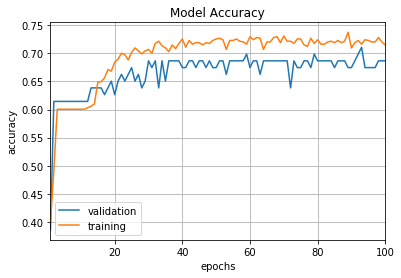

83/83 [==============================] - 0s 104us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6080852847501456, 0.686746987233679]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.6649 - acc: 0.6045 - val_loss: 0.6222 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.6168 - acc: 0.6232 - val_loss: 0.6190 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.6155 - acc: 0.6059 - val_loss: 0.6192 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.6152 - acc: 0.6045 - val_loss: 0.6196 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.6157 - acc: 0.6045 - val_loss: 0.6185 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.6148 - acc: 0.6045 - val_loss: 0.6187 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.6146 - acc: 0.6125 - val_loss: 0.6187 - val_acc: 0.5904
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5972 - acc: 0.7150 - val_loss: 0.5959 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.5972 - acc: 0.7137 - val_loss: 0.5959 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.5973 - acc: 0.7177 - val_loss: 0.5959 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.5971 - acc: 0.7190 - val_loss: 0.5965 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.5977 - acc: 0.7137 - val_loss: 0.5964 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.5973 - acc: 0.7177 - val_loss: 0.5959 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.5970 - acc: 0.7190 - val_loss: 0.5959 - val_acc: 0.7590
Epoch 100/100
 - 0s - loss: 0.5970 - acc: 0.7137 - val_loss: 0.5959 - val_acc: 0.7470


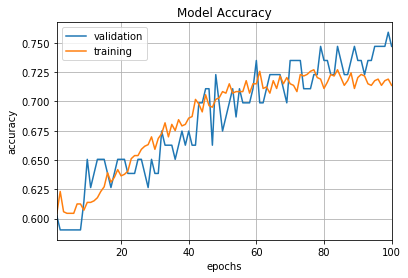

83/83 [==============================] - 0s 101us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5958756797284965, 0.7469879582703832]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.7985 - acc: 0.3968 - val_loss: 0.7810 - val_acc: 0.4096
Epoch 2/100
 - 0s - loss: 0.7068 - acc: 0.3928 - val_loss: 0.6320 - val_acc: 0.3614
Epoch 3/100
 - 0s - loss: 0.6230 - acc: 0.5579 - val_loss: 0.6211 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.6198 - acc: 0.6032 - val_loss: 0.6204 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.6188 - acc: 0.6032 - val_loss: 0.6201 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.6185 - acc: 0.6032 - val_loss: 0.6199 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.6182 - acc: 0.6032 - val_loss: 0.6197 - val_acc: 0.5904
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5972 - acc: 0.7257 - val_loss: 0.6005 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5974 - acc: 0.7257 - val_loss: 0.5967 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.5967 - acc: 0.7204 - val_loss: 0.5968 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.5969 - acc: 0.7177 - val_loss: 0.5980 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5971 - acc: 0.7190 - val_loss: 0.5985 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.5969 - acc: 0.7230 - val_loss: 0.5969 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.5964 - acc: 0.7177 - val_loss: 0.6030 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.5974 - acc: 0.7244 - val_loss: 0.6002 - val_acc: 0.7108


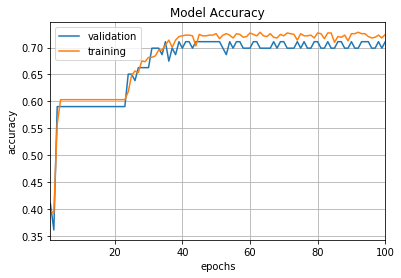

83/83 [==============================] - 0s 113us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.6001578662768904, 0.7108433778027454]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.6179 - acc: 0.6005 - val_loss: 0.6153 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.6177 - acc: 0.6005 - val_loss: 0.6150 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6172 - acc: 0.6005 - val_loss: 0.6150 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6170 - acc: 0.6005 - val_loss: 0.6152 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6169 - acc: 0.6005 - val_loss: 0.6145 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6170 - acc: 0.6005 - val_loss: 0.6142 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6164 - acc: 0.6019 - val_loss: 0.6140 - val_acc: 0.6145
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5968 - acc: 0.7111 - val_loss: 0.5899 - val_acc: 0.7590
Epoch 94/100
 - 0s - loss: 0.5974 - acc: 0.7190 - val_loss: 0.5892 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.5981 - acc: 0.7111 - val_loss: 0.5890 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.5978 - acc: 0.7124 - val_loss: 0.5890 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.5978 - acc: 0.7177 - val_loss: 0.5894 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.5977 - acc: 0.7097 - val_loss: 0.5895 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.5979 - acc: 0.7084 - val_loss: 0.5895 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.5981 - acc: 0.7017 - val_loss: 0.5895 - val_acc: 0.7470


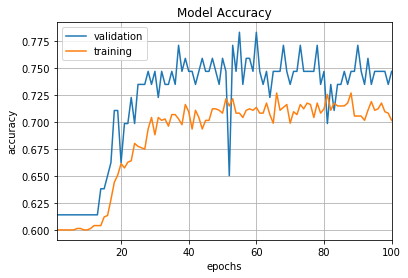

83/83 [==============================] - 0s 111us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.5895108027630541, 0.7469879546797419]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------




In [21]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.squared_hinge,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [22]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7710843387856541
0.7194779139274984


[[0.6041095143272763, 0.7142857199623471],
 [0.586115593001956, 0.7619047647430783],
 [0.596685699054173, 0.7380952409335545],
 [0.6162668125970023, 0.6190476218859354],
 [0.5948376590947071, 0.7710843387856541],
 [0.5990550776562059, 0.6987951749778656],
 [0.6080852847501456, 0.686746987233679],
 [0.5958756797284965, 0.7469879582703832],
 [0.6001578662768904, 0.7108433778027454],
 [0.5895108027630541, 0.7469879546797419]]

In [23]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7150295606016637


[0.7133333341280619,
 0.7106666680177053,
 0.7199999984105429,
 0.7279999987284342,
 0.7070572561176417,
 0.7163781614976621,
 0.7150466051622333,
 0.7137150458108569,
 0.7243675093517481,
 0.7017310287917502]

# 06 #losses.hinge,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.6952 - acc: 0.6093 - val_loss: 0.7303 - val_acc: 0.5357
Epoch 2/100
 - 0s - loss: 0.6950 - acc: 0.6093 - val_loss: 0.7298 - val_acc: 0.5357
Epoch 3/100
 - 0s - loss: 0.6950 - acc: 0.6093 - val_loss: 0.7293 - val_acc: 0.5357
Epoch 4/100
 - 0s - loss: 0.6948 - acc: 0.6093 - val_loss: 0.7296 - val_acc: 0.5357
Epoch 5/100
 - 0s - loss: 0.6947 - acc: 0.6093 - val_loss: 0.7285 - val_acc: 0.5357
Epoch 6/100
 - 0s - loss: 0.6947 - acc: 0.6093 - val_loss: 0.7285 - val_acc: 0.5357
Epoch 7/100
 - 0s - loss: 0.6945 - acc: 0.6093 - val_loss: 0.7280 - val_acc: 0.5357
Epoch 8/100
 - 0s - loss: 0.6945 - acc: 0.6093 - val_loss: 0.7275 - val_acc: 0.5357
Epoch 9/100
 - 0s - loss: 0.6944 - acc: 0.6093 - val_loss: 0.7269 - val_acc: 0.5357
Epoch 10/100
 - 0s - loss: 0.6941 - acc: 0.6093 - val_loss: 0.7256 - val_acc: 0.5357
Epoch 11/100
 - 0s - loss: 0.6938 - acc: 0.6093 - val_loss: 0.7247 - val_acc: 0.5357
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.6393 - acc: 0.7347 - val_loss: 0.6429 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.6396 - acc: 0.7240 - val_loss: 0.6452 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.6410 - acc: 0.7253 - val_loss: 0.6442 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.6382 - acc: 0.7293 - val_loss: 0.6488 - val_acc: 0.7143


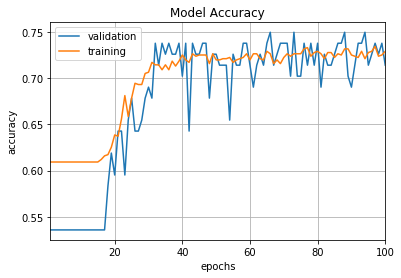

84/84 [==============================] - 0s 147us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6488414122944787, 0.7142857199623471]
 best Score: 0.7142857199623471          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.6999 - acc: 0.6000 - val_loss: 0.6900 - val_acc: 0.6190
Epoch 2/100
 - 0s - loss: 0.6998 - acc: 0.6000 - val_loss: 0.6893 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.6997 - acc: 0.6000 - val_loss: 0.6886 - val_acc: 0.6190
Epoch 4/100
 - 0s - loss: 0.6996 - acc: 0.6000 - val_loss: 0.6883 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.6997 - acc: 0.6000 - val_loss: 0.6880 - val_acc: 0.6190
Epoch 6/100
 - 0s - loss: 0.6992 - acc: 0.6000 - val_loss: 0.6878 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.6991 - acc: 0.6000 - val_loss: 0.6876 - val_acc: 0.6190
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6424 - acc: 0.7227 - val_loss: 0.6317 - val_acc: 0.7500
Epoch 94/100
 - 0s - loss: 0.6396 - acc: 0.7307 - val_loss: 0.6447 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.6420 - acc: 0.7187 - val_loss: 0.6323 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.6402 - acc: 0.7253 - val_loss: 0.6315 - val_acc: 0.7500
Epoch 97/100
 - 0s - loss: 0.6410 - acc: 0.7267 - val_loss: 0.6312 - val_acc: 0.7500
Epoch 98/100
 - 0s - loss: 0.6413 - acc: 0.7267 - val_loss: 0.6319 - val_acc: 0.7500
Epoch 99/100
 - 0s - loss: 0.6401 - acc: 0.7227 - val_loss: 0.6332 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.6422 - acc: 0.7213 - val_loss: 0.6302 - val_acc: 0.7619


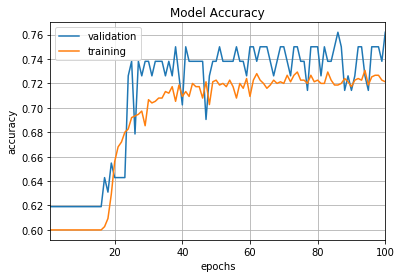

84/84 [==============================] - 0s 102us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6302092841693333, 0.7619047647430783]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.7020 - acc: 0.5947 - val_loss: 0.6666 - val_acc: 0.6667
Epoch 2/100
 - 0s - loss: 0.7018 - acc: 0.5947 - val_loss: 0.6672 - val_acc: 0.6667
Epoch 3/100
 - 0s - loss: 0.7016 - acc: 0.5947 - val_loss: 0.6669 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 0.7014 - acc: 0.5947 - val_loss: 0.6672 - val_acc: 0.6667
Epoch 5/100
 - 0s - loss: 0.7011 - acc: 0.5947 - val_loss: 0.6673 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.7008 - acc: 0.5947 - val_loss: 0.6674 - val_acc: 0.6667
Epoch 7/100
 - 0s - loss: 0.7005 - acc: 0.5947 - val_loss: 0.6679 - val_acc: 0.6667
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6424 - acc: 0.7160 - val_loss: 0.6271 - val_acc: 0.7500
Epoch 94/100
 - 0s - loss: 0.6418 - acc: 0.7200 - val_loss: 0.6265 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.6412 - acc: 0.7213 - val_loss: 0.6269 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.6398 - acc: 0.7267 - val_loss: 0.6280 - val_acc: 0.7500
Epoch 97/100
 - 0s - loss: 0.6413 - acc: 0.7280 - val_loss: 0.6270 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.6401 - acc: 0.7280 - val_loss: 0.6283 - val_acc: 0.7500
Epoch 99/100
 - 0s - loss: 0.6386 - acc: 0.7307 - val_loss: 0.6307 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.6395 - acc: 0.7253 - val_loss: 0.6284 - val_acc: 0.7381


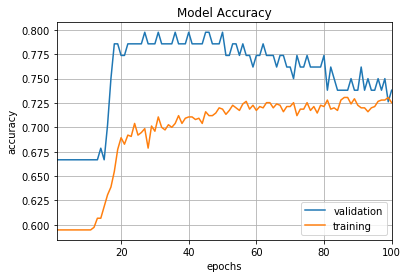

84/84 [==============================] - 0s 128us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.6283511945179531, 0.7380952324186053]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.6969 - acc: 0.6107 - val_loss: 0.7370 - val_acc: 0.5238
Epoch 2/100
 - 0s - loss: 0.6944 - acc: 0.6107 - val_loss: 0.7372 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: 0.6943 - acc: 0.6107 - val_loss: 0.7372 - val_acc: 0.5238
Epoch 4/100
 - 0s - loss: 0.6943 - acc: 0.6107 - val_loss: 0.7373 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: 0.6943 - acc: 0.6107 - val_loss: 0.7373 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: 0.6942 - acc: 0.6107 - val_loss: 0.7372 - val_acc: 0.5238
Epoch 7/100
 - 0s - loss: 0.6942 - acc: 0.6107 - val_loss: 0.7372 - val_acc: 0.5238
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6351 - acc: 0.7347 - val_loss: 0.6700 - val_acc: 0.6667
Epoch 94/100
 - 0s - loss: 0.6359 - acc: 0.7307 - val_loss: 0.6685 - val_acc: 0.6667
Epoch 95/100
 - 0s - loss: 0.6370 - acc: 0.7280 - val_loss: 0.6680 - val_acc: 0.6667
Epoch 96/100
 - 0s - loss: 0.6351 - acc: 0.7373 - val_loss: 0.6685 - val_acc: 0.6667
Epoch 97/100
 - 0s - loss: 0.6354 - acc: 0.7307 - val_loss: 0.6684 - val_acc: 0.6667
Epoch 98/100
 - 0s - loss: 0.6363 - acc: 0.7347 - val_loss: 0.6708 - val_acc: 0.6548
Epoch 99/100
 - 0s - loss: 0.6351 - acc: 0.7320 - val_loss: 0.6706 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.6407 - acc: 0.7213 - val_loss: 0.6716 - val_acc: 0.6548


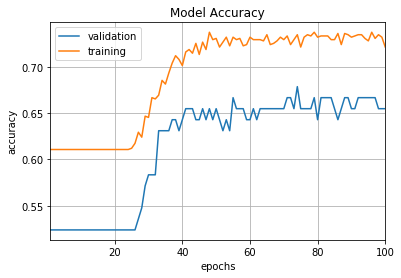

84/84 [==============================] - 0s 181us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6716178684007554, 0.6547619047619048]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.7108 - acc: 0.5925 - val_loss: 0.6653 - val_acc: 0.6867
Epoch 2/100
 - 0s - loss: 0.7041 - acc: 0.5925 - val_loss: 0.6615 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.7032 - acc: 0.5925 - val_loss: 0.6602 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.7030 - acc: 0.5925 - val_loss: 0.6597 - val_acc: 0.6867
Epoch 5/100
 - 0s - loss: 0.7029 - acc: 0.5925 - val_loss: 0.6592 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.7029 - acc: 0.5925 - val_loss: 0.6593 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.7028 - acc: 0.5925 - val_loss: 0.6591 - val_acc: 0.6867
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6488 - acc: 0.7177 - val_loss: 0.6478 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.6488 - acc: 0.7190 - val_loss: 0.6385 - val_acc: 0.7470
Epoch 95/100
 - 0s - loss: 0.6486 - acc: 0.7137 - val_loss: 0.6418 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.6485 - acc: 0.7177 - val_loss: 0.6383 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.6479 - acc: 0.7204 - val_loss: 0.6402 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.6481 - acc: 0.7190 - val_loss: 0.6383 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.6480 - acc: 0.7177 - val_loss: 0.6395 - val_acc: 0.7470
Epoch 100/100
 - 0s - loss: 0.6479 - acc: 0.7164 - val_loss: 0.6363 - val_acc: 0.7470


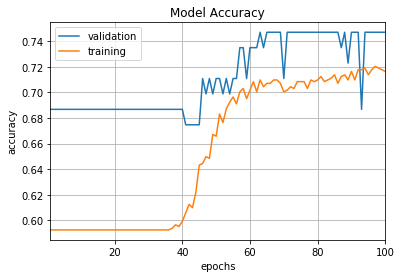

83/83 [==============================] - 0s 108us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.6363159712538662, 0.7469879532434854]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.7505 - acc: 0.4940 - val_loss: 0.7067 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.6970 - acc: 0.6045 - val_loss: 0.7071 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.6965 - acc: 0.6045 - val_loss: 0.7073 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.6963 - acc: 0.6045 - val_loss: 0.7074 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.6962 - acc: 0.6045 - val_loss: 0.7074 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.6961 - acc: 0.6045 - val_loss: 0.7073 - val_acc: 0.5783
Epoch 7/100
 - 0s - loss: 0.6958 - acc: 0.6045 - val_loss: 0.7068 - val_acc: 0.5783
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6414 - acc: 0.7230 - val_loss: 0.6516 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.6417 - acc: 0.7217 - val_loss: 0.6667 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.6406 - acc: 0.7244 - val_loss: 0.6655 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.6392 - acc: 0.7284 - val_loss: 0.6607 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.6410 - acc: 0.7177 - val_loss: 0.6707 - val_acc: 0.6506
Epoch 98/100
 - 0s - loss: 0.6399 - acc: 0.7230 - val_loss: 0.6583 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.6384 - acc: 0.7310 - val_loss: 0.6605 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.6381 - acc: 0.7310 - val_loss: 0.6521 - val_acc: 0.7229


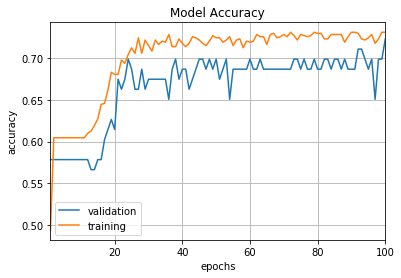

83/83 [==============================] - 0s 138us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6520968216011324, 0.7228915605200342]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.7571 - acc: 0.5166 - val_loss: 0.7289 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.7073 - acc: 0.6005 - val_loss: 0.6955 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6994 - acc: 0.6005 - val_loss: 0.6936 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6986 - acc: 0.6005 - val_loss: 0.6930 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6984 - acc: 0.6005 - val_loss: 0.6928 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6983 - acc: 0.6005 - val_loss: 0.6925 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6981 - acc: 0.6005 - val_loss: 0.6924 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6366 - acc: 0.7310 - val_loss: 0.6570 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.6366 - acc: 0.7284 - val_loss: 0.6570 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.6365 - acc: 0.7297 - val_loss: 0.6574 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.6352 - acc: 0.7324 - val_loss: 0.6610 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.6358 - acc: 0.7350 - val_loss: 0.6562 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.6357 - acc: 0.7297 - val_loss: 0.6596 - val_acc: 0.6867
Epoch 99/100
 - 0s - loss: 0.6369 - acc: 0.7324 - val_loss: 0.6594 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.6358 - acc: 0.7284 - val_loss: 0.6580 - val_acc: 0.6867


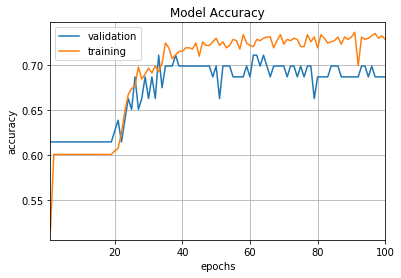

83/83 [==============================] - 0s 269us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6579768226807376, 0.6867469822067812]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.8024 - acc: 0.3968 - val_loss: 0.7955 - val_acc: 0.4096
Epoch 2/100
 - 0s - loss: 0.8022 - acc: 0.3968 - val_loss: 0.7956 - val_acc: 0.4096
Epoch 3/100
 - 0s - loss: 0.8022 - acc: 0.3968 - val_loss: 0.7955 - val_acc: 0.4096
Epoch 4/100
 - 0s - loss: 0.8022 - acc: 0.3968 - val_loss: 0.7955 - val_acc: 0.4096
Epoch 5/100
 - 0s - loss: 0.8022 - acc: 0.3968 - val_loss: 0.7955 - val_acc: 0.4096
Epoch 6/100
 - 0s - loss: 0.8022 - acc: 0.3968 - val_loss: 0.7955 - val_acc: 0.4096
Epoch 7/100
 - 0s - loss: 0.8021 - acc: 0.3968 - val_loss: 0.7953 - val_acc: 0.4096
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6548 - acc: 0.7111 - val_loss: 0.6690 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.6534 - acc: 0.7164 - val_loss: 0.6672 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.6520 - acc: 0.7177 - val_loss: 0.6701 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.6524 - acc: 0.7097 - val_loss: 0.6668 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.6528 - acc: 0.7084 - val_loss: 0.6652 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.6518 - acc: 0.7190 - val_loss: 0.6645 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.6516 - acc: 0.7150 - val_loss: 0.6642 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.6520 - acc: 0.7177 - val_loss: 0.6631 - val_acc: 0.6747


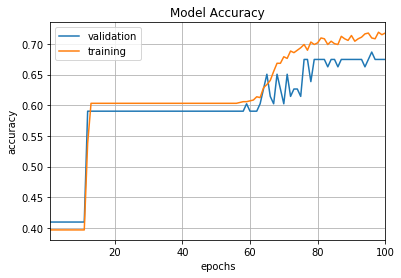

83/83 [==============================] - 0s 144us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.6630829314151442, 0.6746987930263382]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 2/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 3/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 4/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 5/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 6/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 7/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 94/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 95/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 96/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 97/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 98/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 99/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096
Epoch 100/100
 - 0s - loss: 0.8016 - acc: 0.3968 - val_loss: 0.7952 - val_acc: 0.4096


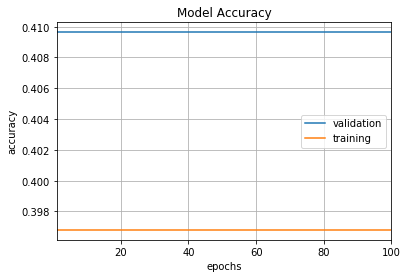

83/83 [==============================] - 0s 139us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.7951807207371815, 0.40963855852563696]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.6995 - acc: 0.6005 - val_loss: 0.6930 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.6993 - acc: 0.6005 - val_loss: 0.6931 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6991 - acc: 0.6005 - val_loss: 0.6931 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6990 - acc: 0.6005 - val_loss: 0.6930 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6989 - acc: 0.6005 - val_loss: 0.6930 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6988 - acc: 0.6005 - val_loss: 0.6929 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6987 - acc: 0.6005 - val_loss: 0.6929 - val_acc: 0.6145
Epoch 8

Epoch 93/100
 - 0s - loss: 0.6407 - acc: 0.7204 - val_loss: 0.6318 - val_acc: 0.7470
Epoch 94/100
 - 0s - loss: 0.6412 - acc: 0.7297 - val_loss: 0.6302 - val_acc: 0.7470
Epoch 95/100
 - 0s - loss: 0.6412 - acc: 0.7204 - val_loss: 0.6304 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.6403 - acc: 0.7230 - val_loss: 0.6353 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.6406 - acc: 0.7257 - val_loss: 0.6304 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.6430 - acc: 0.7270 - val_loss: 0.6306 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.6415 - acc: 0.7244 - val_loss: 0.6321 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.6416 - acc: 0.7270 - val_loss: 0.6316 - val_acc: 0.7470


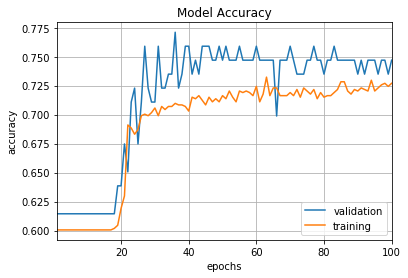

83/83 [==============================] - 0s 127us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6315986011401716, 0.7469879460622029]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------




In [24]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.hinge,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [25]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7619047647430783
0.6856999415470414


[[0.6488414122944787, 0.7142857199623471],
 [0.6302092841693333, 0.7619047647430783],
 [0.6283511945179531, 0.7380952324186053],
 [0.6716178684007554, 0.6547619047619048],
 [0.6363159712538662, 0.7469879532434854],
 [0.6520968216011324, 0.7228915605200342],
 [0.6579768226807376, 0.6867469822067812],
 [0.6630829314151442, 0.6746987930263382],
 [0.7951807207371815, 0.40963855852563696],
 [0.6315986011401716, 0.7469879460622029]]

In [26]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6914643597204951


[0.7293333351612091,
 0.7213333308696747,
 0.7253333346048991,
 0.7213333344459534,
 0.7163781637993062,
 0.7310253001561019,
 0.728362182881956,
 0.7177097236268848,
 0.39680426630294435,
 0.7270306253560215]

# 07 #losses.categorical_hinge,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.7813 - acc: 0.6093 - val_loss: 0.9273 - val_acc: 0.5357
Epoch 2/100
 - 0s - loss: 0.7811 - acc: 0.6093 - val_loss: 0.9257 - val_acc: 0.5357
Epoch 3/100
 - 0s - loss: 0.7809 - acc: 0.6093 - val_loss: 0.9234 - val_acc: 0.5357
Epoch 4/100
 - 0s - loss: 0.7805 - acc: 0.6093 - val_loss: 0.9225 - val_acc: 0.5357
Epoch 5/100
 - 0s - loss: 0.7804 - acc: 0.6093 - val_loss: 0.9221 - val_acc: 0.5357
Epoch 6/100
 - 0s - loss: 0.7802 - acc: 0.6093 - val_loss: 0.9209 - val_acc: 0.5357
Epoch 7/100
 - 0s - loss: 0.7797 - acc: 0.6093 - val_loss: 0.9182 - val_acc: 0.5357
Epoch 8/100
 - 0s - loss: 0.7793 - acc: 0.6093 - val_loss: 0.9163 - val_acc: 0.5357
Epoch 9/100
 - 0s - loss: 0.7790 - acc: 0.6093 - val_loss: 0.9153 - val_acc: 0.5357
Epoch 10/100
 - 0s - loss: 0.7785 - acc: 0.6093 - val_loss: 0.9139 - val_acc: 0.5357
Epoch 11/100
 - 0s - loss: 0.7778 - acc: 0.6093 - val_loss: 0.9047 - val_acc: 0.5357
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.5565 - acc: 0.7253 - val_loss: 0.5354 - val_acc: 0.7500
Epoch 98/100
 - 0s - loss: 0.5656 - acc: 0.7213 - val_loss: 0.6123 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.5555 - acc: 0.7307 - val_loss: 0.5721 - val_acc: 0.7143
Epoch 100/100
 - 0s - loss: 0.5593 - acc: 0.7200 - val_loss: 0.5351 - val_acc: 0.7619


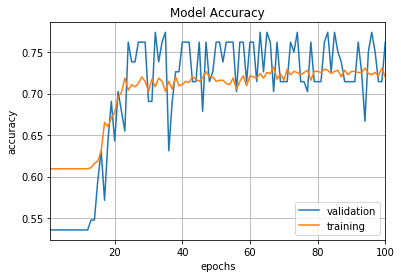

84/84 [==============================] - 0s 238us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.535084917431786, 0.761904756228129]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 1.1581 - acc: 0.4000 - val_loss: 1.0328 - val_acc: 0.3810
Epoch 2/100
 - 0s - loss: 0.9084 - acc: 0.5787 - val_loss: 0.7787 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.8095 - acc: 0.6000 - val_loss: 0.7578 - val_acc: 0.6190
Epoch 4/100
 - 0s - loss: 0.8006 - acc: 0.6000 - val_loss: 0.7561 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.7994 - acc: 0.6000 - val_loss: 0.7556 - val_acc: 0.6190
Epoch 6/100
 - 0s - loss: 0.7987 - acc: 0.6000 - val_loss: 0.7555 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.7983 - acc: 0.6000 - val_loss: 0.7554 - val_acc: 0.6190
Epoch 8/100


Epoch 93/100
 - 0s - loss: 0.5666 - acc: 0.7240 - val_loss: 0.5164 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.5644 - acc: 0.7253 - val_loss: 0.5270 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.5680 - acc: 0.7200 - val_loss: 0.5270 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.5676 - acc: 0.7253 - val_loss: 0.5328 - val_acc: 0.7381
Epoch 97/100
 - 0s - loss: 0.5694 - acc: 0.7227 - val_loss: 0.5211 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.5694 - acc: 0.7253 - val_loss: 0.5141 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.5603 - acc: 0.7320 - val_loss: 0.5326 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.5649 - acc: 0.7267 - val_loss: 0.5276 - val_acc: 0.7381


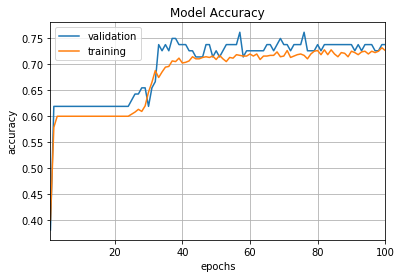

84/84 [==============================] - 0s 142us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.5276020382131849, 0.7380952380952381]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.9433 - acc: 0.5827 - val_loss: 0.8328 - val_acc: 0.6667
Epoch 2/100
 - 0s - loss: 0.8596 - acc: 0.5947 - val_loss: 0.7265 - val_acc: 0.6667
Epoch 3/100
 - 0s - loss: 0.8237 - acc: 0.5947 - val_loss: 0.6937 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 0.8139 - acc: 0.5947 - val_loss: 0.6824 - val_acc: 0.6667
Epoch 5/100
 - 0s - loss: 0.8111 - acc: 0.5947 - val_loss: 0.6767 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.8096 - acc: 0.5947 - val_loss: 0.6742 - val_acc: 0.6667
Epoch 7/100
 - 0s - loss: 0.8089 - acc: 0.5947 - val_loss: 0.6727 - val_acc: 0.6667
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5773 - acc: 0.7267 - val_loss: 0.5137 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.5854 - acc: 0.7213 - val_loss: 0.5162 - val_acc: 0.7500
Epoch 95/100
 - 0s - loss: 0.5811 - acc: 0.7133 - val_loss: 0.5128 - val_acc: 0.7500
Epoch 96/100
 - 0s - loss: 0.5741 - acc: 0.7187 - val_loss: 0.5219 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.5758 - acc: 0.7267 - val_loss: 0.5132 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.5722 - acc: 0.7227 - val_loss: 0.5135 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.5720 - acc: 0.7253 - val_loss: 0.5175 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.5734 - acc: 0.7240 - val_loss: 0.5135 - val_acc: 0.7500


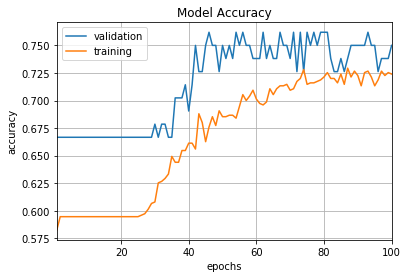

84/84 [==============================] - 0s 200us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5134660232634771, 0.7500000056766328]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 1.1704 - acc: 0.3893 - val_loss: 1.0384 - val_acc: 0.4762
Epoch 2/100
 - 0s - loss: 1.0903 - acc: 0.3880 - val_loss: 1.0162 - val_acc: 0.4762
Epoch 3/100
 - 0s - loss: 1.0267 - acc: 0.3773 - val_loss: 1.0040 - val_acc: 0.4286
Epoch 4/100
 - 0s - loss: 0.9931 - acc: 0.5653 - val_loss: 0.9974 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: 0.9740 - acc: 0.6107 - val_loss: 0.9934 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: 0.9609 - acc: 0.6107 - val_loss: 0.9904 - val_acc: 0.5238
Epoch 7/100
 - 0s - loss: 0.9494 - acc: 0.6107 - val_loss: 0.9876 - val_acc: 0.5238
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.6212 - acc: 0.7240 - val_loss: 0.7891 - val_acc: 0.6429
Epoch 94/100
 - 0s - loss: 0.6185 - acc: 0.7240 - val_loss: 0.7858 - val_acc: 0.6429
Epoch 95/100
 - 0s - loss: 0.6149 - acc: 0.7200 - val_loss: 0.7847 - val_acc: 0.6548
Epoch 96/100
 - 0s - loss: 0.6115 - acc: 0.7307 - val_loss: 0.7801 - val_acc: 0.6667
Epoch 97/100
 - 0s - loss: 0.6084 - acc: 0.7267 - val_loss: 0.7806 - val_acc: 0.6429
Epoch 98/100
 - 0s - loss: 0.6050 - acc: 0.7307 - val_loss: 0.7770 - val_acc: 0.6429
Epoch 99/100
 - 0s - loss: 0.6023 - acc: 0.7307 - val_loss: 0.7726 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.5999 - acc: 0.7320 - val_loss: 0.7729 - val_acc: 0.6429


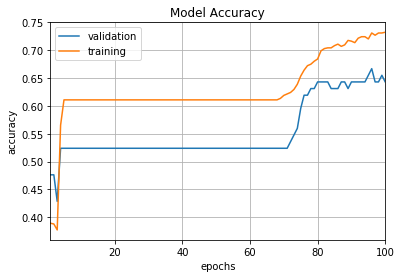

84/84 [==============================] - 0s 147us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.7728941554114932, 0.6428571456954593]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.8118 - acc: 0.5925 - val_loss: 0.6325 - val_acc: 0.6867
Epoch 2/100
 - 0s - loss: 0.8115 - acc: 0.5925 - val_loss: 0.6326 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.8108 - acc: 0.5925 - val_loss: 0.6347 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.8107 - acc: 0.5925 - val_loss: 0.6363 - val_acc: 0.6867
Epoch 5/100
 - 0s - loss: 0.8100 - acc: 0.5925 - val_loss: 0.6351 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.8097 - acc: 0.5925 - val_loss: 0.6361 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.8094 - acc: 0.5925 - val_loss: 0.6375 - val_acc: 0.6867
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.6054 - acc: 0.7057 - val_loss: 0.5758 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5922 - acc: 0.7230 - val_loss: 0.5253 - val_acc: 0.7470
Epoch 95/100
 - 0s - loss: 0.5962 - acc: 0.7124 - val_loss: 0.5467 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.5994 - acc: 0.7097 - val_loss: 0.5210 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.5928 - acc: 0.7150 - val_loss: 0.5520 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.5941 - acc: 0.7164 - val_loss: 0.5375 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.5872 - acc: 0.7190 - val_loss: 0.5496 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.5915 - acc: 0.7164 - val_loss: 0.5497 - val_acc: 0.7229


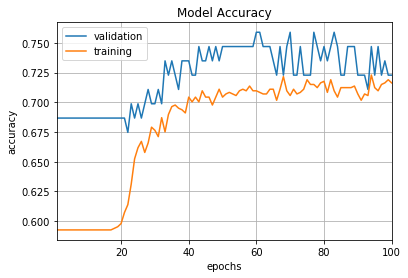

83/83 [==============================] - 0s 149us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5496608966804413, 0.7228915677013168]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.7942 - acc: 0.6032 - val_loss: 0.8229 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.7863 - acc: 0.6045 - val_loss: 0.8233 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.7859 - acc: 0.6045 - val_loss: 0.8210 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.7840 - acc: 0.6045 - val_loss: 0.8173 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.7822 - acc: 0.6045 - val_loss: 0.8153 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.7789 - acc: 0.6072 - val_loss: 0.8061 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.7726 - acc: 0.6112 - val_loss: 0.7970 - val_acc: 0.5904
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5439 - acc: 0.7337 - val_loss: 0.6494 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.5435 - acc: 0.7377 - val_loss: 0.6668 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.5451 - acc: 0.7284 - val_loss: 0.6624 - val_acc: 0.6627
Epoch 96/100
 - 0s - loss: 0.5432 - acc: 0.7350 - val_loss: 0.6535 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.5440 - acc: 0.7337 - val_loss: 0.6567 - val_acc: 0.6627
Epoch 98/100
 - 0s - loss: 0.5441 - acc: 0.7324 - val_loss: 0.6517 - val_acc: 0.6867
Epoch 99/100
 - 0s - loss: 0.5449 - acc: 0.7337 - val_loss: 0.6572 - val_acc: 0.6627
Epoch 100/100
 - 0s - loss: 0.5436 - acc: 0.7337 - val_loss: 0.6608 - val_acc: 0.6627


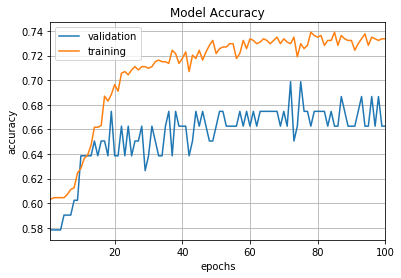

83/83 [==============================] - 0s 164us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6607847809791565, 0.6626506016915104]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.8687 - acc: 0.5979 - val_loss: 0.7962 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.8057 - acc: 0.6005 - val_loss: 0.7778 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.7990 - acc: 0.6005 - val_loss: 0.7748 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.7977 - acc: 0.6005 - val_loss: 0.7737 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.7974 - acc: 0.6005 - val_loss: 0.7731 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.7971 - acc: 0.6005 - val_loss: 0.7726 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.7970 - acc: 0.6005 - val_loss: 0.7724 - val_acc: 0.6145
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5579 - acc: 0.7337 - val_loss: 0.6666 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.5532 - acc: 0.7390 - val_loss: 0.6622 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.5506 - acc: 0.7403 - val_loss: 0.6667 - val_acc: 0.6506
Epoch 96/100
 - 0s - loss: 0.5488 - acc: 0.7430 - val_loss: 0.6682 - val_acc: 0.6506
Epoch 97/100
 - 0s - loss: 0.5507 - acc: 0.7350 - val_loss: 0.6586 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.5421 - acc: 0.7443 - val_loss: 0.6853 - val_acc: 0.6627
Epoch 99/100
 - 0s - loss: 0.5512 - acc: 0.7364 - val_loss: 0.6782 - val_acc: 0.6627
Epoch 100/100
 - 0s - loss: 0.5501 - acc: 0.7377 - val_loss: 0.6712 - val_acc: 0.6506


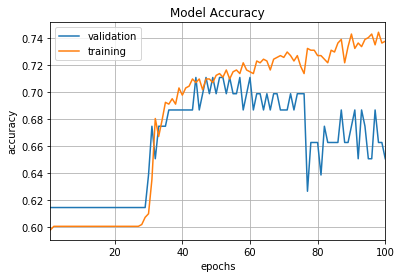

83/83 [==============================] - 0s 141us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6712479842714516, 0.6506024038935282]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.8129 - acc: 0.6032 - val_loss: 0.8191 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.7933 - acc: 0.6032 - val_loss: 0.8156 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.7918 - acc: 0.6032 - val_loss: 0.8154 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.7917 - acc: 0.6032 - val_loss: 0.8152 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.7915 - acc: 0.6032 - val_loss: 0.8149 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.7913 - acc: 0.6032 - val_loss: 0.8147 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.7912 - acc: 0.6032 - val_loss: 0.8145 - val_acc: 0.5904
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5635 - acc: 0.7257 - val_loss: 0.5758 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.5688 - acc: 0.7270 - val_loss: 0.5852 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.5651 - acc: 0.7244 - val_loss: 0.5841 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.5639 - acc: 0.7244 - val_loss: 0.5796 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.5625 - acc: 0.7270 - val_loss: 0.5738 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.5676 - acc: 0.7217 - val_loss: 0.5678 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.5631 - acc: 0.7244 - val_loss: 0.5752 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.5644 - acc: 0.7244 - val_loss: 0.5654 - val_acc: 0.7229


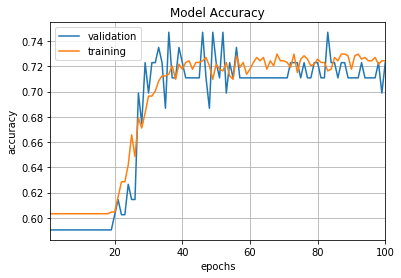

83/83 [==============================] - 0s 105us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5654339553361916, 0.7228915641106755]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 1.0161 - acc: 0.5406 - val_loss: 0.9855 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.9771 - acc: 0.6032 - val_loss: 0.9746 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.9657 - acc: 0.6032 - val_loss: 0.9645 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.9531 - acc: 0.6032 - val_loss: 0.9535 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.9416 - acc: 0.6032 - val_loss: 0.9441 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.9291 - acc: 0.6032 - val_loss: 0.9318 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.9161 - acc: 0.6032 - val_loss: 0.9209 - val_acc: 0.5904
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.7936 - acc: 0.6032 - val_loss: 0.8193 - val_acc: 0.5904
Epoch 94/100
 - 0s - loss: 0.7936 - acc: 0.6032 - val_loss: 0.8193 - val_acc: 0.5904
Epoch 95/100
 - 0s - loss: 0.7936 - acc: 0.6032 - val_loss: 0.8193 - val_acc: 0.5904
Epoch 96/100
 - 0s - loss: 0.7936 - acc: 0.6032 - val_loss: 0.8193 - val_acc: 0.5904
Epoch 97/100
 - 0s - loss: 0.7936 - acc: 0.6032 - val_loss: 0.8193 - val_acc: 0.5904
Epoch 98/100
 - 0s - loss: 0.7936 - acc: 0.6032 - val_loss: 0.8193 - val_acc: 0.5904
Epoch 99/100
 - 0s - loss: 0.7936 - acc: 0.6032 - val_loss: 0.8193 - val_acc: 0.5904
Epoch 100/100
 - 0s - loss: 0.7936 - acc: 0.6032 - val_loss: 0.8193 - val_acc: 0.5904


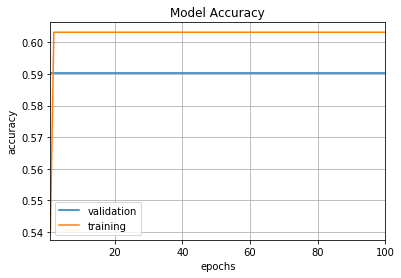

83/83 [==============================] - 0s 120us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.8192809116409485, 0.5903614482965814]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.7989 - acc: 0.6005 - val_loss: 0.7711 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.7989 - acc: 0.6005 - val_loss: 0.7711 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.7988 - acc: 0.6005 - val_loss: 0.7712 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.7988 - acc: 0.6005 - val_loss: 0.7712 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.7987 - acc: 0.6005 - val_loss: 0.7714 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.7984 - acc: 0.6005 - val_loss: 0.7718 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.7981 - acc: 0.6005 - val_loss: 0.7721 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5751 - acc: 0.7244 - val_loss: 0.5195 - val_acc: 0.7470
Epoch 94/100
 - 0s - loss: 0.5726 - acc: 0.7257 - val_loss: 0.5193 - val_acc: 0.7590
Epoch 95/100
 - 0s - loss: 0.5714 - acc: 0.7190 - val_loss: 0.5187 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.5713 - acc: 0.7217 - val_loss: 0.5183 - val_acc: 0.7711
Epoch 97/100
 - 0s - loss: 0.5734 - acc: 0.7244 - val_loss: 0.5177 - val_acc: 0.7711
Epoch 98/100
 - 0s - loss: 0.5743 - acc: 0.7177 - val_loss: 0.5194 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.5714 - acc: 0.7217 - val_loss: 0.5183 - val_acc: 0.7590
Epoch 100/100
 - 0s - loss: 0.5728 - acc: 0.7257 - val_loss: 0.5169 - val_acc: 0.7470


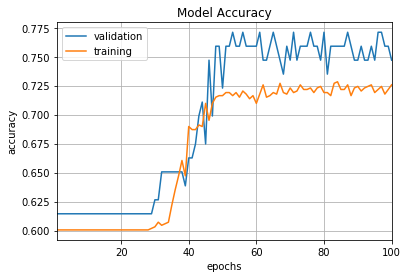

83/83 [==============================] - 0s 199us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.5169256681419281, 0.7469879460622029]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------




In [27]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.categorical_hinge,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [28]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.761904756228129
0.6989242677451275


[[0.535084917431786, 0.761904756228129],
 [0.5276020382131849, 0.7380952380952381],
 [0.5134660232634771, 0.7500000056766328],
 [0.7728941554114932, 0.6428571456954593],
 [0.5496608966804413, 0.7228915677013168],
 [0.6607847809791565, 0.6626506016915104],
 [0.6712479842714516, 0.6506024038935282],
 [0.5654339553361916, 0.7228915641106755],
 [0.8192809116409485, 0.5903614482965814],
 [0.5169256681419281, 0.7469879460622029]]

In [29]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7143678661848882


[0.7200000019868215,
 0.7266666678587596,
 0.7240000021457672,
 0.7320000020662943,
 0.7163781626088006,
 0.7336884142555663,
 0.7376830905636205,
 0.7243675085580777,
 0.6031957450068585,
 0.7256990667983155]

# 08 #losses.logcosh,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 0.1117 - acc: 0.6133 - val_loss: 0.1194 - val_acc: 0.5476
Epoch 2/100
 - 0s - loss: 0.1109 - acc: 0.6147 - val_loss: 0.1184 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.1099 - acc: 0.6133 - val_loss: 0.1172 - val_acc: 0.5357
Epoch 4/100
 - 0s - loss: 0.1097 - acc: 0.6213 - val_loss: 0.1210 - val_acc: 0.5476
Epoch 5/100
 - 0s - loss: 0.1094 - acc: 0.6227 - val_loss: 0.1177 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 0.1091 - acc: 0.6280 - val_loss: 0.1181 - val_acc: 0.5357
Epoch 7/100
 - 0s - loss: 0.1091 - acc: 0.6187 - val_loss: 0.1139 - val_acc: 0.5476
Epoch 8/100
 - 0s - loss: 0.1085 - acc: 0.6267 - val_loss: 0.1153 - val_acc: 0.5476
Epoch 9/100
 - 0s - loss: 0.1081 - acc: 0.6360 - val_loss: 0.1106 - val_acc: 0.6429
Epoch 10/100
 - 0s - loss: 0.1072 - acc: 0.6267 - val_loss: 0.1108 - val_acc: 0.6190
Epoch 11/100
 - 0s - loss: 0.1063 - acc: 0.6387 - val_loss: 0.1079 - val_acc: 0.6429
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.0895 - acc: 0.7280 - val_loss: 0.0990 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.0900 - acc: 0.7187 - val_loss: 0.0986 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.0893 - acc: 0.7307 - val_loss: 0.0981 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.0907 - acc: 0.7280 - val_loss: 0.0992 - val_acc: 0.7024


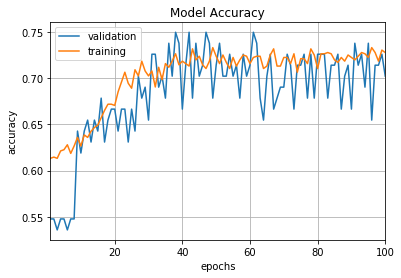

84/84 [==============================] - 0s 188us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.09915094006629217, 0.7023809580575853]
 best Score: 0.7023809580575853          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 0.2083 - acc: 0.4000 - val_loss: 0.1380 - val_acc: 0.3571
Epoch 2/100
 - 0s - loss: 0.1187 - acc: 0.5693 - val_loss: 0.1123 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.1136 - acc: 0.6000 - val_loss: 0.1086 - val_acc: 0.6190
Epoch 4/100
 - 0s - loss: 0.1108 - acc: 0.6000 - val_loss: 0.1081 - val_acc: 0.6429
Epoch 5/100
 - 0s - loss: 0.1102 - acc: 0.6133 - val_loss: 0.1072 - val_acc: 0.6310
Epoch 6/100
 - 0s - loss: 0.1090 - acc: 0.6080 - val_loss: 0.1039 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.1073 - acc: 0.6240 - val_loss: 0.1017 - val_acc: 0.6190
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0907 - acc: 0.7200 - val_loss: 0.0844 - val_acc: 0.7500
Epoch 94/100
 - 0s - loss: 0.0915 - acc: 0.7173 - val_loss: 0.0823 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.0914 - acc: 0.7080 - val_loss: 0.0811 - val_acc: 0.7500
Epoch 96/100
 - 0s - loss: 0.0912 - acc: 0.7160 - val_loss: 0.0823 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.0907 - acc: 0.7147 - val_loss: 0.0814 - val_acc: 0.7500
Epoch 98/100
 - 0s - loss: 0.0913 - acc: 0.7187 - val_loss: 0.0817 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.0912 - acc: 0.7187 - val_loss: 0.0844 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.0910 - acc: 0.7120 - val_loss: 0.0814 - val_acc: 0.7619


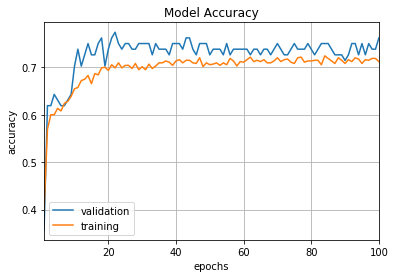

84/84 [==============================] - 0s 160us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.08137829708201545, 0.7619047647430783]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 0.1201 - acc: 0.5827 - val_loss: 0.0969 - val_acc: 0.6667
Epoch 2/100
 - 0s - loss: 0.1116 - acc: 0.5960 - val_loss: 0.0945 - val_acc: 0.6667
Epoch 3/100
 - 0s - loss: 0.1123 - acc: 0.5960 - val_loss: 0.0942 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 0.1124 - acc: 0.5747 - val_loss: 0.0957 - val_acc: 0.7143
Epoch 5/100
 - 0s - loss: 0.1099 - acc: 0.6360 - val_loss: 0.0932 - val_acc: 0.6786
Epoch 6/100
 - 0s - loss: 0.1109 - acc: 0.6253 - val_loss: 0.0940 - val_acc: 0.7500
Epoch 7/100
 - 0s - loss: 0.1084 - acc: 0.6320 - val_loss: 0.0911 - val_acc: 0.6786
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0910 - acc: 0.7267 - val_loss: 0.0871 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.0905 - acc: 0.7253 - val_loss: 0.0885 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.0922 - acc: 0.7187 - val_loss: 0.0864 - val_acc: 0.7024
Epoch 96/100
 - 0s - loss: 0.0925 - acc: 0.7160 - val_loss: 0.0901 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.0904 - acc: 0.7147 - val_loss: 0.0880 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.0903 - acc: 0.7253 - val_loss: 0.0869 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.0920 - acc: 0.7187 - val_loss: 0.0867 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.0922 - acc: 0.7093 - val_loss: 0.0888 - val_acc: 0.7143


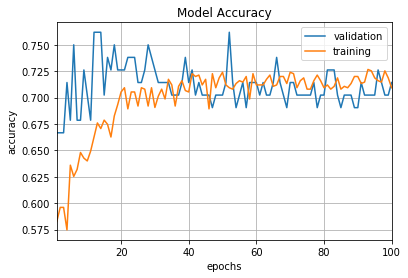

84/84 [==============================] - 0s 169us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.08877907551470257, 0.7142857171240307]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 0.1207 - acc: 0.6027 - val_loss: 0.1313 - val_acc: 0.5238
Epoch 2/100
 - 0s - loss: 0.1105 - acc: 0.6133 - val_loss: 0.1224 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: 0.1080 - acc: 0.6147 - val_loss: 0.1339 - val_acc: 0.5238
Epoch 4/100
 - 0s - loss: 0.1087 - acc: 0.6173 - val_loss: 0.1182 - val_acc: 0.5357
Epoch 5/100
 - 0s - loss: 0.1082 - acc: 0.6173 - val_loss: 0.1274 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: 0.1058 - acc: 0.6373 - val_loss: 0.1291 - val_acc: 0.5238
Epoch 7/100
 - 0s - loss: 0.1045 - acc: 0.6373 - val_loss: 0.1181 - val_acc: 0.5476
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0894 - acc: 0.7240 - val_loss: 0.1159 - val_acc: 0.6310
Epoch 94/100
 - 0s - loss: 0.0892 - acc: 0.7227 - val_loss: 0.1106 - val_acc: 0.6429
Epoch 95/100
 - 0s - loss: 0.0905 - acc: 0.7147 - val_loss: 0.1106 - val_acc: 0.6429
Epoch 96/100
 - 0s - loss: 0.0891 - acc: 0.7320 - val_loss: 0.1093 - val_acc: 0.6310
Epoch 97/100
 - 0s - loss: 0.0888 - acc: 0.7307 - val_loss: 0.1092 - val_acc: 0.6310
Epoch 98/100
 - 0s - loss: 0.0884 - acc: 0.7307 - val_loss: 0.1077 - val_acc: 0.6548
Epoch 99/100
 - 0s - loss: 0.0886 - acc: 0.7267 - val_loss: 0.1179 - val_acc: 0.6310
Epoch 100/100
 - 0s - loss: 0.0888 - acc: 0.7227 - val_loss: 0.1090 - val_acc: 0.6548


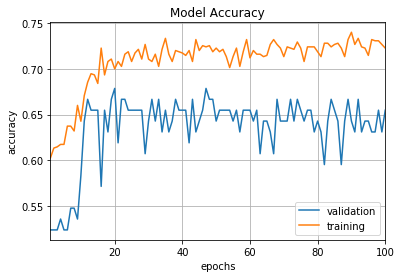

84/84 [==============================] - 0s 164us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.1089816866886048, 0.6547619019235883]
 best Score: 0.7619047647430783          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.1146 - acc: 0.5766 - val_loss: 0.1243 - val_acc: 0.3253
Epoch 2/100
 - 0s - loss: 0.1169 - acc: 0.5606 - val_loss: 0.1020 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.1148 - acc: 0.5925 - val_loss: 0.1044 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.1148 - acc: 0.5925 - val_loss: 0.1059 - val_acc: 0.6867
Epoch 5/100
 - 0s - loss: 0.1146 - acc: 0.5925 - val_loss: 0.1028 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.1135 - acc: 0.5925 - val_loss: 0.1077 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.1149 - acc: 0.5925 - val_loss: 0.1061 - val_acc: 0.6867
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0929 - acc: 0.6977 - val_loss: 0.0930 - val_acc: 0.7470
Epoch 94/100
 - 0s - loss: 0.0913 - acc: 0.7111 - val_loss: 0.0858 - val_acc: 0.7952
Epoch 95/100
 - 0s - loss: 0.0914 - acc: 0.7097 - val_loss: 0.0931 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.0918 - acc: 0.7164 - val_loss: 0.0873 - val_acc: 0.7711
Epoch 97/100
 - 0s - loss: 0.0914 - acc: 0.7164 - val_loss: 0.0860 - val_acc: 0.8072
Epoch 98/100
 - 0s - loss: 0.0922 - acc: 0.7084 - val_loss: 0.0880 - val_acc: 0.7711
Epoch 99/100
 - 0s - loss: 0.0921 - acc: 0.7124 - val_loss: 0.0879 - val_acc: 0.7711
Epoch 100/100
 - 0s - loss: 0.0915 - acc: 0.7164 - val_loss: 0.0865 - val_acc: 0.7831


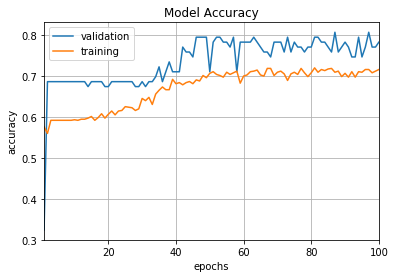

83/83 [==============================] - 0s 309us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.08654321810926299, 0.7831325315567385]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.2622 - acc: 0.3955 - val_loss: 0.2509 - val_acc: 0.4217
Epoch 2/100
 - 0s - loss: 0.2622 - acc: 0.3955 - val_loss: 0.2508 - val_acc: 0.4217
Epoch 3/100
 - 0s - loss: 0.2620 - acc: 0.3955 - val_loss: 0.2497 - val_acc: 0.4217
Epoch 4/100
 - 0s - loss: 0.1960 - acc: 0.4168 - val_loss: 0.1163 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.1155 - acc: 0.6045 - val_loss: 0.1170 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.1151 - acc: 0.6045 - val_loss: 0.1169 - val_acc: 0.5783
Epoch 7/100
 - 0s - loss: 0.1148 - acc: 0.6045 - val_loss: 0.1168 - val_acc: 0.5783
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.1142 - acc: 0.6045 - val_loss: 0.1172 - val_acc: 0.5783
Epoch 94/100
 - 0s - loss: 0.1143 - acc: 0.6045 - val_loss: 0.1172 - val_acc: 0.5783
Epoch 95/100
 - 0s - loss: 0.1142 - acc: 0.6045 - val_loss: 0.1171 - val_acc: 0.5783
Epoch 96/100
 - 0s - loss: 0.1142 - acc: 0.6045 - val_loss: 0.1171 - val_acc: 0.5783
Epoch 97/100
 - 0s - loss: 0.1142 - acc: 0.6045 - val_loss: 0.1171 - val_acc: 0.5783
Epoch 98/100
 - 0s - loss: 0.1142 - acc: 0.6045 - val_loss: 0.1171 - val_acc: 0.5783
Epoch 99/100
 - 0s - loss: 0.1142 - acc: 0.6045 - val_loss: 0.1171 - val_acc: 0.5783
Epoch 100/100
 - 0s - loss: 0.1143 - acc: 0.6045 - val_loss: 0.1171 - val_acc: 0.5783


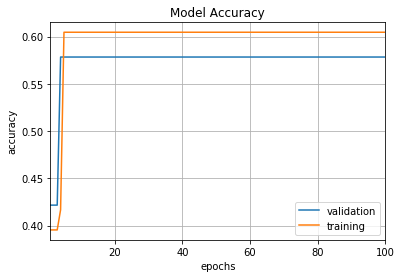

83/83 [==============================] - 0s 155us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.11707436652427697, 0.5783132472670222]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.1194 - acc: 0.6045 - val_loss: 0.1129 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.1120 - acc: 0.6072 - val_loss: 0.1115 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.1110 - acc: 0.6112 - val_loss: 0.1121 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.1114 - acc: 0.5965 - val_loss: 0.1101 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.1091 - acc: 0.6059 - val_loss: 0.1103 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.1086 - acc: 0.6138 - val_loss: 0.1091 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.1076 - acc: 0.6099 - val_loss: 0.1089 - val_acc: 0.6265
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0897 - acc: 0.7177 - val_loss: 0.1003 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.0901 - acc: 0.7284 - val_loss: 0.1004 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.0895 - acc: 0.7257 - val_loss: 0.1012 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.0893 - acc: 0.7244 - val_loss: 0.0998 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.0899 - acc: 0.7230 - val_loss: 0.1000 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.0897 - acc: 0.7270 - val_loss: 0.1001 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.0891 - acc: 0.7324 - val_loss: 0.0998 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.0901 - acc: 0.7244 - val_loss: 0.0999 - val_acc: 0.6988


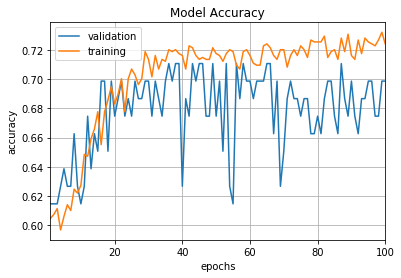

83/83 [==============================] - 0s 188us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.09989359400358545, 0.6987951800047633]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.1677 - acc: 0.4461 - val_loss: 0.1155 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.1111 - acc: 0.6032 - val_loss: 0.1145 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.1106 - acc: 0.6032 - val_loss: 0.1137 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.1104 - acc: 0.6032 - val_loss: 0.1133 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.1097 - acc: 0.6032 - val_loss: 0.1131 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.1094 - acc: 0.6032 - val_loss: 0.1132 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.1091 - acc: 0.6032 - val_loss: 0.1127 - val_acc: 0.5904
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0912 - acc: 0.7137 - val_loss: 0.0939 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.0902 - acc: 0.7324 - val_loss: 0.0928 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.0904 - acc: 0.7204 - val_loss: 0.0926 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.0906 - acc: 0.7230 - val_loss: 0.0922 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.0908 - acc: 0.7217 - val_loss: 0.0931 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.0906 - acc: 0.7230 - val_loss: 0.0921 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.0907 - acc: 0.7190 - val_loss: 0.0938 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.0910 - acc: 0.7204 - val_loss: 0.0920 - val_acc: 0.7470


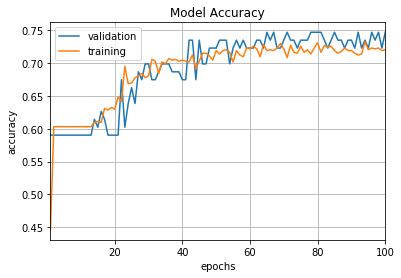

83/83 [==============================] - 0s 187us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.0919870063662529, 0.7469879582703832]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.1264 - acc: 0.5726 - val_loss: 0.1238 - val_acc: 0.5542
Epoch 2/100
 - 0s - loss: 0.1217 - acc: 0.5925 - val_loss: 0.1226 - val_acc: 0.5542
Epoch 3/100
 - 0s - loss: 0.1190 - acc: 0.6019 - val_loss: 0.1184 - val_acc: 0.5542
Epoch 4/100
 - 0s - loss: 0.1171 - acc: 0.5992 - val_loss: 0.1166 - val_acc: 0.5663
Epoch 5/100
 - 0s - loss: 0.1136 - acc: 0.5925 - val_loss: 0.1153 - val_acc: 0.5663
Epoch 6/100
 - 0s - loss: 0.1114 - acc: 0.6272 - val_loss: 0.1191 - val_acc: 0.5783
Epoch 7/100
 - 0s - loss: 0.1105 - acc: 0.6338 - val_loss: 0.1130 - val_acc: 0.5783
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0907 - acc: 0.7364 - val_loss: 0.0957 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.0900 - acc: 0.7310 - val_loss: 0.1030 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.0909 - acc: 0.7217 - val_loss: 0.0973 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.0915 - acc: 0.7217 - val_loss: 0.0979 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.0902 - acc: 0.7284 - val_loss: 0.0969 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.0906 - acc: 0.7204 - val_loss: 0.0980 - val_acc: 0.6867
Epoch 99/100
 - 0s - loss: 0.0917 - acc: 0.7150 - val_loss: 0.0989 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.0904 - acc: 0.7244 - val_loss: 0.0964 - val_acc: 0.6867


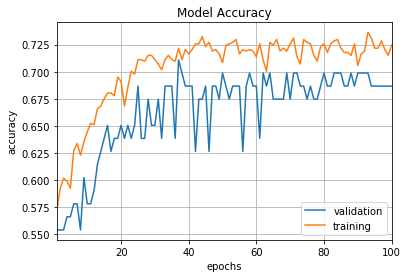

83/83 [==============================] - 0s 162us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.09636666724480779, 0.6867469904652561]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.2287 - acc: 0.3995 - val_loss: 0.1535 - val_acc: 0.3855
Epoch 2/100
 - 0s - loss: 0.1234 - acc: 0.5126 - val_loss: 0.1152 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.1152 - acc: 0.6005 - val_loss: 0.1133 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.1144 - acc: 0.6005 - val_loss: 0.1127 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.1142 - acc: 0.6005 - val_loss: 0.1125 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.1140 - acc: 0.6005 - val_loss: 0.1123 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.1138 - acc: 0.6005 - val_loss: 0.1119 - val_acc: 0.6145
Epoch 8

Epoch 93/100
 - 0s - loss: 0.0908 - acc: 0.7217 - val_loss: 0.0862 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.0917 - acc: 0.7150 - val_loss: 0.0865 - val_acc: 0.7470
Epoch 95/100
 - 0s - loss: 0.0908 - acc: 0.7204 - val_loss: 0.0884 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.0923 - acc: 0.7097 - val_loss: 0.0864 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.0916 - acc: 0.7244 - val_loss: 0.0860 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.0911 - acc: 0.7217 - val_loss: 0.0859 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.0910 - acc: 0.7217 - val_loss: 0.0859 - val_acc: 0.7470
Epoch 100/100
 - 0s - loss: 0.0912 - acc: 0.7084 - val_loss: 0.0874 - val_acc: 0.7108


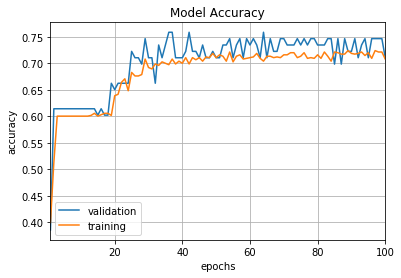

83/83 [==============================] - 0s 197us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.0874065149979419, 0.7108433677489499]
 best Score: 0.7831325315567385          
-------------------------------------------------------------------------------------------




In [30]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.logcosh,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [31]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7831325315567385
0.7038152617161396


[[0.09915094006629217, 0.7023809580575853],
 [0.08137829708201545, 0.7619047647430783],
 [0.08877907551470257, 0.7142857171240307],
 [0.1089816866886048, 0.6547619019235883],
 [0.08654321810926299, 0.7831325315567385],
 [0.11707436652427697, 0.5783132472670222],
 [0.09989359400358545, 0.6987951800047633],
 [0.0919870063662529, 0.7469879582703832],
 [0.09636666724480779, 0.6867469904652561],
 [0.0874065149979419, 0.7108433677489499]]

In [32]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.707040214514235


[0.7279999995231629,
 0.7119999996821086,
 0.709333336353302,
 0.722666669289271,
 0.7163781622913326,
 0.604527301778806,
 0.7243675104628866,
 0.7203728387978042,
 0.7243675101454184,
 0.7083888168182576]

# 09 #losses.categorical_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 7s - loss: 5.8017 - acc: 0.3907 - val_loss: 1.6000 - val_acc: 0.4643
Epoch 2/100
 - 0s - loss: 0.8410 - acc: 0.5053 - val_loss: 0.6836 - val_acc: 0.5595
Epoch 3/100
 - 0s - loss: 0.6724 - acc: 0.6080 - val_loss: 0.6902 - val_acc: 0.5357
Epoch 4/100
 - 0s - loss: 0.6714 - acc: 0.6093 - val_loss: 0.6916 - val_acc: 0.5357
Epoch 5/100
 - 0s - loss: 0.6708 - acc: 0.6093 - val_loss: 0.6921 - val_acc: 0.5357
Epoch 6/100
 - 0s - loss: 0.6705 - acc: 0.6093 - val_loss: 0.6936 - val_acc: 0.5357
Epoch 7/100
 - 0s - loss: 0.6701 - acc: 0.6093 - val_loss: 0.6942 - val_acc: 0.5357
Epoch 8/100
 - 0s - loss: 0.6698 - acc: 0.6093 - val_loss: 0.6942 - val_acc: 0.5357
Epoch 9/100
 - 0s - loss: 0.6698 - acc: 0.6093 - val_loss: 0.6945 - val_acc: 0.5357
Epoch 10/100
 - 0s - loss: 0.6696 - acc: 0.6093 - val_loss: 0.6957 - val_acc: 0.5357
Epoch 11/100
 - 0s - loss: 0.6695 - acc: 0.6093 - val_loss: 0.6961 - val_acc: 0.5357
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.5817 - acc: 0.7133 - val_loss: 0.6071 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.5732 - acc: 0.7133 - val_loss: 0.6145 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.5681 - acc: 0.7160 - val_loss: 0.6071 - val_acc: 0.7500
Epoch 100/100
 - 0s - loss: 0.5746 - acc: 0.7133 - val_loss: 0.6079 - val_acc: 0.7381


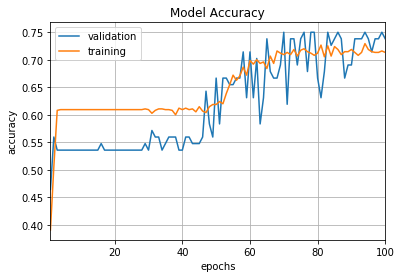

84/84 [==============================] - 0s 221us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6078625065939767, 0.738095243771871]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 7s - loss: 0.9206 - acc: 0.5320 - val_loss: 0.6687 - val_acc: 0.6310
Epoch 2/100
 - 0s - loss: 0.6723 - acc: 0.6000 - val_loss: 0.6553 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.6677 - acc: 0.5987 - val_loss: 0.6519 - val_acc: 0.6429
Epoch 4/100
 - 0s - loss: 0.6637 - acc: 0.5960 - val_loss: 0.6448 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.6596 - acc: 0.6000 - val_loss: 0.6410 - val_acc: 0.6548
Epoch 6/100
 - 0s - loss: 0.6576 - acc: 0.6067 - val_loss: 0.6416 - val_acc: 0.6429
Epoch 7/100
 - 0s - loss: 0.6542 - acc: 0.6080 - val_loss: 0.6461 - val_acc: 0.6548
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.5814 - acc: 0.7080 - val_loss: 0.5388 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.5810 - acc: 0.7053 - val_loss: 0.5508 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.5790 - acc: 0.7200 - val_loss: 0.5400 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.5786 - acc: 0.7133 - val_loss: 0.5288 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.5779 - acc: 0.7187 - val_loss: 0.5430 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.5807 - acc: 0.7147 - val_loss: 0.5362 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.5823 - acc: 0.7187 - val_loss: 0.5262 - val_acc: 0.7500
Epoch 100/100
 - 0s - loss: 0.5744 - acc: 0.7093 - val_loss: 0.5231 - val_acc: 0.7619


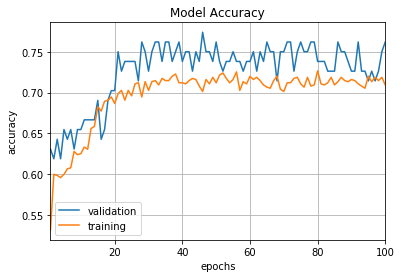

84/84 [==============================] - 0s 452us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.5231443388121468, 0.7619047619047619]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 7s - loss: 0.6899 - acc: 0.5893 - val_loss: 0.6349 - val_acc: 0.6548
Epoch 2/100
 - 0s - loss: 0.6833 - acc: 0.5920 - val_loss: 0.6324 - val_acc: 0.6548
Epoch 3/100
 - 0s - loss: 0.6750 - acc: 0.5947 - val_loss: 0.6212 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 0.6737 - acc: 0.5933 - val_loss: 0.6201 - val_acc: 0.6667
Epoch 5/100
 - 0s - loss: 0.6721 - acc: 0.5933 - val_loss: 0.6116 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.6705 - acc: 0.5933 - val_loss: 0.6137 - val_acc: 0.6667
Epoch 7/100
 - 0s - loss: 0.6731 - acc: 0.5987 - val_loss: 0.6254 - val_acc: 0.6667
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5831 - acc: 0.7160 - val_loss: 0.5459 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.5812 - acc: 0.7240 - val_loss: 0.5446 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.5782 - acc: 0.7173 - val_loss: 0.5744 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.5824 - acc: 0.7120 - val_loss: 0.5540 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.5797 - acc: 0.7120 - val_loss: 0.5456 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.5755 - acc: 0.7213 - val_loss: 0.5631 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.5769 - acc: 0.7013 - val_loss: 0.5459 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.5853 - acc: 0.7080 - val_loss: 0.5464 - val_acc: 0.7024


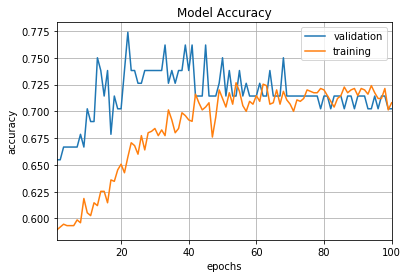

84/84 [==============================] - 0s 144us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5463514384769258, 0.7023809552192688]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 8s - loss: 3.1400 - acc: 0.4467 - val_loss: 0.7327 - val_acc: 0.5238
Epoch 2/100
 - 0s - loss: 0.6622 - acc: 0.6107 - val_loss: 0.7196 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: 0.6608 - acc: 0.6107 - val_loss: 0.7093 - val_acc: 0.5238
Epoch 4/100
 - 0s - loss: 0.6597 - acc: 0.6107 - val_loss: 0.7026 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: 0.6613 - acc: 0.6107 - val_loss: 0.7110 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: 0.6610 - acc: 0.6107 - val_loss: 0.6952 - val_acc: 0.5238
Epoch 7/100
 - 0s - loss: 0.6579 - acc: 0.6107 - val_loss: 0.7158 - val_acc: 0.5238
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5657 - acc: 0.7293 - val_loss: 0.6948 - val_acc: 0.6667
Epoch 94/100
 - 0s - loss: 0.5745 - acc: 0.7173 - val_loss: 0.6441 - val_acc: 0.6548
Epoch 95/100
 - 0s - loss: 0.5714 - acc: 0.7213 - val_loss: 0.6334 - val_acc: 0.6667
Epoch 96/100
 - 0s - loss: 0.5678 - acc: 0.7173 - val_loss: 0.6422 - val_acc: 0.6548
Epoch 97/100
 - 0s - loss: 0.5675 - acc: 0.7173 - val_loss: 0.6658 - val_acc: 0.6429
Epoch 98/100
 - 0s - loss: 0.5696 - acc: 0.7227 - val_loss: 0.6543 - val_acc: 0.6310
Epoch 99/100
 - 0s - loss: 0.5675 - acc: 0.7267 - val_loss: 0.6409 - val_acc: 0.6429
Epoch 100/100
 - 0s - loss: 0.5710 - acc: 0.7147 - val_loss: 0.6540 - val_acc: 0.6310


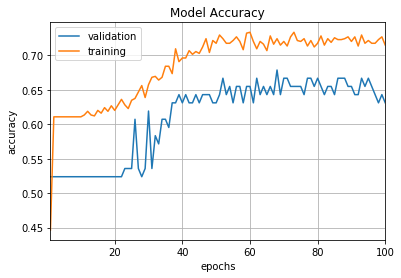

84/84 [==============================] - 0s 151us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6540319039708092, 0.6309523837906974]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.7221 - acc: 0.5965 - val_loss: 0.6323 - val_acc: 0.6867
Epoch 2/100
 - 0s - loss: 0.6606 - acc: 0.6005 - val_loss: 0.6233 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.6602 - acc: 0.5992 - val_loss: 0.6205 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.6587 - acc: 0.6005 - val_loss: 0.6190 - val_acc: 0.6867
Epoch 5/100
 - 0s - loss: 0.6572 - acc: 0.5939 - val_loss: 0.6219 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.6566 - acc: 0.6059 - val_loss: 0.6315 - val_acc: 0.6747
Epoch 7/100
 - 0s - loss: 0.6543 - acc: 0.6019 - val_loss: 0.6127 - val_acc: 0.6867
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5726 - acc: 0.7177 - val_loss: 0.5735 - val_acc: 0.7831
Epoch 94/100
 - 0s - loss: 0.5747 - acc: 0.7124 - val_loss: 0.5901 - val_acc: 0.7470
Epoch 95/100
 - 0s - loss: 0.5774 - acc: 0.7031 - val_loss: 0.5893 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.5732 - acc: 0.7137 - val_loss: 0.5804 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.5731 - acc: 0.7124 - val_loss: 0.5785 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.5703 - acc: 0.7204 - val_loss: 0.5740 - val_acc: 0.7711
Epoch 99/100
 - 0s - loss: 0.5714 - acc: 0.7111 - val_loss: 0.5781 - val_acc: 0.7590
Epoch 100/100
 - 0s - loss: 0.5732 - acc: 0.7204 - val_loss: 0.5761 - val_acc: 0.7590


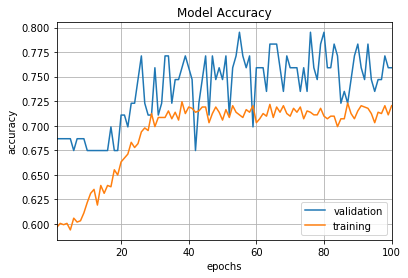

83/83 [==============================] - 0s 405us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.57608793370695, 0.7590361510414675]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 1.0048 - acc: 0.3915 - val_loss: 0.7042 - val_acc: 0.4458
Epoch 2/100
 - 0s - loss: 0.6804 - acc: 0.6045 - val_loss: 0.6815 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.6766 - acc: 0.6045 - val_loss: 0.6801 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.6753 - acc: 0.6045 - val_loss: 0.6791 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.6739 - acc: 0.6045 - val_loss: 0.6781 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.6723 - acc: 0.6045 - val_loss: 0.6779 - val_acc: 0.5783
Epoch 7/100
 - 0s - loss: 0.6709 - acc: 0.6032 - val_loss: 0.6776 - val_acc: 0.5783
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.5733 - acc: 0.7177 - val_loss: 0.6277 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.5718 - acc: 0.7310 - val_loss: 0.6243 - val_acc: 0.6145
Epoch 95/100
 - 0s - loss: 0.5696 - acc: 0.7310 - val_loss: 0.6234 - val_acc: 0.6145
Epoch 96/100
 - 0s - loss: 0.5693 - acc: 0.7324 - val_loss: 0.6231 - val_acc: 0.6265
Epoch 97/100
 - 0s - loss: 0.5708 - acc: 0.7284 - val_loss: 0.6220 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.5703 - acc: 0.7364 - val_loss: 0.6223 - val_acc: 0.6867
Epoch 99/100
 - 0s - loss: 0.5690 - acc: 0.7297 - val_loss: 0.6223 - val_acc: 0.6265
Epoch 100/100
 - 0s - loss: 0.5700 - acc: 0.7390 - val_loss: 0.6217 - val_acc: 0.6265


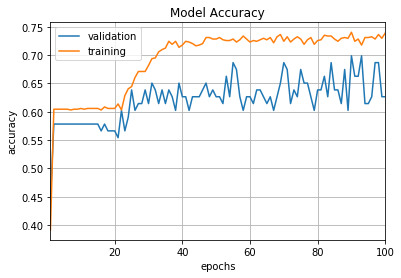

83/83 [==============================] - 0s 229us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6217215413070587, 0.626506028405155]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.6634 - acc: 0.6005 - val_loss: 0.6581 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.6616 - acc: 0.6005 - val_loss: 0.6583 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6617 - acc: 0.6005 - val_loss: 0.6574 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6602 - acc: 0.6005 - val_loss: 0.6572 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6596 - acc: 0.6005 - val_loss: 0.6573 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6594 - acc: 0.6005 - val_loss: 0.6571 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6597 - acc: 0.6005 - val_loss: 0.6564 - val_acc: 0.6145
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5691 - acc: 0.7310 - val_loss: 0.6227 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5694 - acc: 0.7204 - val_loss: 0.6275 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.5691 - acc: 0.7244 - val_loss: 0.6278 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.5676 - acc: 0.7190 - val_loss: 0.6231 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5694 - acc: 0.7284 - val_loss: 0.6257 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.5700 - acc: 0.7284 - val_loss: 0.6230 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5692 - acc: 0.7230 - val_loss: 0.6244 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.5682 - acc: 0.7284 - val_loss: 0.6240 - val_acc: 0.6988


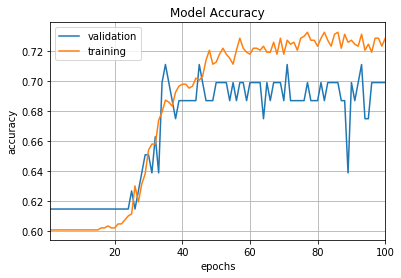

83/83 [==============================] - 0s 236us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6240326424679125, 0.6987951800047633]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 1.0881 - acc: 0.5792 - val_loss: 0.6734 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.6614 - acc: 0.5979 - val_loss: 0.6723 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6585 - acc: 0.6019 - val_loss: 0.6708 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.6569 - acc: 0.6059 - val_loss: 0.6712 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6526 - acc: 0.6165 - val_loss: 0.6665 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.6535 - acc: 0.6072 - val_loss: 0.6657 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.6460 - acc: 0.6138 - val_loss: 0.6716 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5796 - acc: 0.7150 - val_loss: 0.5773 - val_acc: 0.7711
Epoch 94/100
 - 0s - loss: 0.5830 - acc: 0.7150 - val_loss: 0.5809 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.5772 - acc: 0.7137 - val_loss: 0.5770 - val_acc: 0.7711
Epoch 96/100
 - 0s - loss: 0.5777 - acc: 0.7137 - val_loss: 0.5760 - val_acc: 0.7711
Epoch 97/100
 - 0s - loss: 0.5827 - acc: 0.7111 - val_loss: 0.5770 - val_acc: 0.7590
Epoch 98/100
 - 0s - loss: 0.5802 - acc: 0.7111 - val_loss: 0.5813 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.5762 - acc: 0.7177 - val_loss: 0.5868 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.5792 - acc: 0.7124 - val_loss: 0.6063 - val_acc: 0.7349


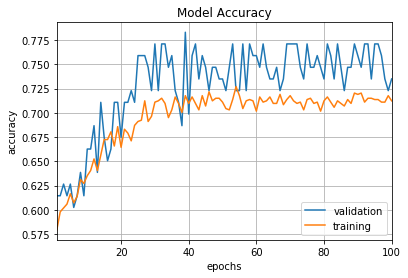

83/83 [==============================] - 0s 177us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.6062987396515995, 0.7349397654992988]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 1.2415 - acc: 0.6032 - val_loss: 0.6679 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.6575 - acc: 0.6032 - val_loss: 0.6643 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.6593 - acc: 0.6045 - val_loss: 0.6641 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.6598 - acc: 0.6059 - val_loss: 0.6670 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.6605 - acc: 0.6045 - val_loss: 0.6675 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.6562 - acc: 0.6045 - val_loss: 0.6648 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.6577 - acc: 0.6045 - val_loss: 0.6628 - val_acc: 0.5904
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5837 - acc: 0.7177 - val_loss: 0.5923 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.5826 - acc: 0.7217 - val_loss: 0.6059 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.5848 - acc: 0.7177 - val_loss: 0.5998 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.5839 - acc: 0.7071 - val_loss: 0.5854 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.5851 - acc: 0.7124 - val_loss: 0.5992 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.5865 - acc: 0.7097 - val_loss: 0.6140 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5900 - acc: 0.7137 - val_loss: 0.5938 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.5826 - acc: 0.7150 - val_loss: 0.5859 - val_acc: 0.6867


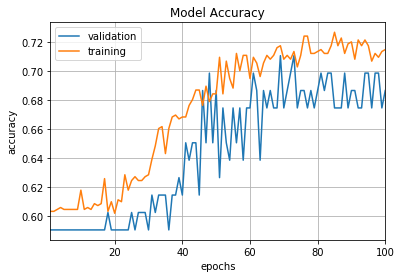

83/83 [==============================] - 0s 191us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5858800899551575, 0.6867469904652561]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.7328 - acc: 0.6005 - val_loss: 0.6516 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.6616 - acc: 0.6019 - val_loss: 0.6549 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6617 - acc: 0.6032 - val_loss: 0.6547 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6611 - acc: 0.6032 - val_loss: 0.6542 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6614 - acc: 0.6032 - val_loss: 0.6550 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6604 - acc: 0.6045 - val_loss: 0.6545 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6596 - acc: 0.6045 - val_loss: 0.6537 - val_acc: 0.6145
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5755 - acc: 0.7137 - val_loss: 0.5558 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.5787 - acc: 0.7164 - val_loss: 0.5542 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.5784 - acc: 0.7111 - val_loss: 0.5570 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.5777 - acc: 0.7111 - val_loss: 0.5546 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.5766 - acc: 0.7084 - val_loss: 0.5575 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.5760 - acc: 0.7190 - val_loss: 0.5528 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.5770 - acc: 0.7177 - val_loss: 0.5523 - val_acc: 0.7470
Epoch 100/100
 - 0s - loss: 0.5781 - acc: 0.7177 - val_loss: 0.5523 - val_acc: 0.7349


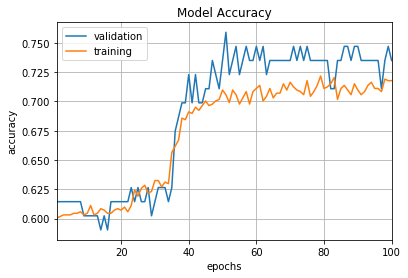

83/83 [==============================] - 0s 306us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.552270006702607, 0.7349397619086576]
 best Score: 0.7619047619047619          
-------------------------------------------------------------------------------------------




In [33]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [34]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7619047619047619
0.7074297222011197


[[0.6078625065939767, 0.738095243771871],
 [0.5231443388121468, 0.7619047619047619],
 [0.5463514384769258, 0.7023809552192688],
 [0.6540319039708092, 0.6309523837906974],
 [0.57608793370695, 0.7590361510414675],
 [0.6217215413070587, 0.626506028405155],
 [0.6240326424679125, 0.6987951800047633],
 [0.6062987396515995, 0.7349397654992988],
 [0.5858800899551575, 0.6867469904652561],
 [0.552270006702607, 0.7349397619086576]]

In [35]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7178222818081241


[0.7133333337306976,
 0.7093333357572555,
 0.7080000011126201,
 0.7146666685740153,
 0.7203728352262876,
 0.7390146476133527,
 0.7283621847867648,
 0.7123834863801136,
 0.7150466036542595,
 0.7177097212458736]

# 10 #losses.sparse_categorical_crossentropy,
              

In [36]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7619047619047619
0.7074297222011197


[[0.6078625065939767, 0.738095243771871],
 [0.5231443388121468, 0.7619047619047619],
 [0.5463514384769258, 0.7023809552192688],
 [0.6540319039708092, 0.6309523837906974],
 [0.57608793370695, 0.7590361510414675],
 [0.6217215413070587, 0.626506028405155],
 [0.6240326424679125, 0.6987951800047633],
 [0.6062987396515995, 0.7349397654992988],
 [0.5858800899551575, 0.6867469904652561],
 [0.552270006702607, 0.7349397619086576]]

In [37]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7178222818081241


[0.7133333337306976,
 0.7093333357572555,
 0.7080000011126201,
 0.7146666685740153,
 0.7203728352262876,
 0.7390146476133527,
 0.7283621847867648,
 0.7123834863801136,
 0.7150466036542595,
 0.7177097212458736]

# 11 #losses.binary_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 8s - loss: 1.0844 - acc: 0.4747 - val_loss: 0.7122 - val_acc: 0.5357
Epoch 2/100
 - 0s - loss: 0.6634 - acc: 0.6093 - val_loss: 0.7073 - val_acc: 0.5357
Epoch 3/100
 - 0s - loss: 0.6614 - acc: 0.6093 - val_loss: 0.7100 - val_acc: 0.5357
Epoch 4/100
 - 0s - loss: 0.6621 - acc: 0.6093 - val_loss: 0.7046 - val_acc: 0.5357
Epoch 5/100
 - 0s - loss: 0.6588 - acc: 0.6093 - val_loss: 0.6986 - val_acc: 0.5357
Epoch 6/100
 - 0s - loss: 0.6594 - acc: 0.6093 - val_loss: 0.7018 - val_acc: 0.5357
Epoch 7/100
 - 0s - loss: 0.6548 - acc: 0.6093 - val_loss: 0.6919 - val_acc: 0.5357
Epoch 8/100
 - 0s - loss: 0.6531 - acc: 0.6093 - val_loss: 0.6954 - val_acc: 0.5357
Epoch 9/100
 - 0s - loss: 0.6520 - acc: 0.6093 - val_loss: 0.6904 - val_acc: 0.5357
Epoch 10/100
 - 0s - loss: 0.6487 - acc: 0.6093 - val_loss: 0.6836 - val_acc: 0.5595
Epoch 11/100
 - 0s - loss: 0.6475 - acc: 0.6080 - val_loss: 0.6862 - val_acc: 0.5476
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.5681 - acc: 0.7173 - val_loss: 0.6136 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.5660 - acc: 0.7160 - val_loss: 0.6141 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.5670 - acc: 0.7187 - val_loss: 0.6159 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.5666 - acc: 0.7253 - val_loss: 0.6317 - val_acc: 0.6548


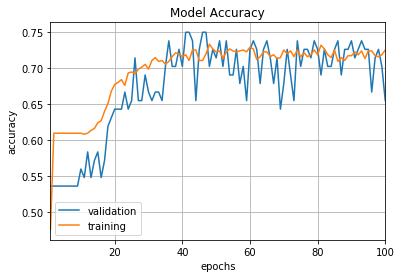

84/84 [==============================] - 0s 191us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6317412257194519, 0.6547619076002211]
 best Score: 0.6547619076002211          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 8s - loss: 1.9890 - acc: 0.3933 - val_loss: 0.7154 - val_acc: 0.3810
Epoch 2/100
 - 0s - loss: 0.6832 - acc: 0.5880 - val_loss: 0.6703 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.6763 - acc: 0.6000 - val_loss: 0.6649 - val_acc: 0.6190
Epoch 4/100
 - 0s - loss: 0.6750 - acc: 0.6000 - val_loss: 0.6673 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.6749 - acc: 0.6000 - val_loss: 0.6641 - val_acc: 0.6190
Epoch 6/100
 - 0s - loss: 0.6742 - acc: 0.6000 - val_loss: 0.6646 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.6738 - acc: 0.6000 - val_loss: 0.6632 - val_acc: 0.6190
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6082 - acc: 0.6880 - val_loss: 0.5513 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.6070 - acc: 0.6760 - val_loss: 0.5537 - val_acc: 0.7500
Epoch 95/100
 - 0s - loss: 0.6025 - acc: 0.6867 - val_loss: 0.5501 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.6002 - acc: 0.6920 - val_loss: 0.5492 - val_acc: 0.7500
Epoch 97/100
 - 0s - loss: 0.5991 - acc: 0.6920 - val_loss: 0.5534 - val_acc: 0.7500
Epoch 98/100
 - 0s - loss: 0.5980 - acc: 0.7027 - val_loss: 0.5452 - val_acc: 0.7500
Epoch 99/100
 - 0s - loss: 0.5956 - acc: 0.6973 - val_loss: 0.5455 - val_acc: 0.7500
Epoch 100/100
 - 0s - loss: 0.5943 - acc: 0.7000 - val_loss: 0.5408 - val_acc: 0.7500


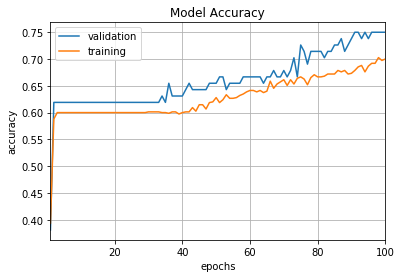

84/84 [==============================] - 0s 201us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.54080502476011, 0.7500000028383165]
 best Score: 0.7500000028383165          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 9s - loss: 1.1634 - acc: 0.5240 - val_loss: 0.6166 - val_acc: 0.6786
Epoch 2/100
 - 0s - loss: 0.6516 - acc: 0.6053 - val_loss: 0.6078 - val_acc: 0.6905
Epoch 3/100
 - 0s - loss: 0.6482 - acc: 0.6173 - val_loss: 0.5967 - val_acc: 0.6786
Epoch 4/100
 - 0s - loss: 0.6496 - acc: 0.6120 - val_loss: 0.6022 - val_acc: 0.6905
Epoch 5/100
 - 0s - loss: 0.6438 - acc: 0.6093 - val_loss: 0.6413 - val_acc: 0.6786
Epoch 6/100
 - 0s - loss: 0.6417 - acc: 0.6187 - val_loss: 0.5978 - val_acc: 0.7143
Epoch 7/100
 - 0s - loss: 0.6386 - acc: 0.6293 - val_loss: 0.5905 - val_acc: 0.7143
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.5781 - acc: 0.7147 - val_loss: 0.5546 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.5748 - acc: 0.7227 - val_loss: 0.5767 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.5772 - acc: 0.7200 - val_loss: 0.5643 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.5791 - acc: 0.7173 - val_loss: 0.5547 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.5812 - acc: 0.7187 - val_loss: 0.5570 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.5764 - acc: 0.7173 - val_loss: 0.5574 - val_acc: 0.6905
Epoch 99/100
 - 0s - loss: 0.5768 - acc: 0.7240 - val_loss: 0.5568 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.5761 - acc: 0.7253 - val_loss: 0.5615 - val_acc: 0.7024


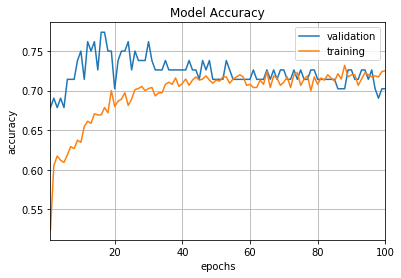

84/84 [==============================] - 0s 236us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5614626010258993, 0.7023809552192688]
 best Score: 0.7500000028383165          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 9s - loss: 0.6882 - acc: 0.6093 - val_loss: 0.6920 - val_acc: 0.5238
Epoch 2/100
 - 0s - loss: 0.6817 - acc: 0.6107 - val_loss: 0.6924 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: 0.6777 - acc: 0.6107 - val_loss: 0.6932 - val_acc: 0.5238
Epoch 4/100
 - 0s - loss: 0.6750 - acc: 0.6107 - val_loss: 0.6946 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: 0.6731 - acc: 0.6107 - val_loss: 0.6961 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: 0.6717 - acc: 0.6107 - val_loss: 0.6975 - val_acc: 0.5238
Epoch 7/100
 - 0s - loss: 0.6707 - acc: 0.6107 - val_loss: 0.6986 - val_acc: 0.5238
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6687 - acc: 0.6107 - val_loss: 0.7075 - val_acc: 0.5238
Epoch 94/100
 - 0s - loss: 0.6685 - acc: 0.6107 - val_loss: 0.7080 - val_acc: 0.5238
Epoch 95/100
 - 0s - loss: 0.6685 - acc: 0.6107 - val_loss: 0.7076 - val_acc: 0.5238
Epoch 96/100
 - 0s - loss: 0.6685 - acc: 0.6107 - val_loss: 0.7077 - val_acc: 0.5238
Epoch 97/100
 - 0s - loss: 0.6685 - acc: 0.6107 - val_loss: 0.7077 - val_acc: 0.5238
Epoch 98/100
 - 0s - loss: 0.6686 - acc: 0.6107 - val_loss: 0.7076 - val_acc: 0.5238
Epoch 99/100
 - 0s - loss: 0.6686 - acc: 0.6107 - val_loss: 0.7075 - val_acc: 0.5238
Epoch 100/100
 - 0s - loss: 0.6685 - acc: 0.6107 - val_loss: 0.7077 - val_acc: 0.5238


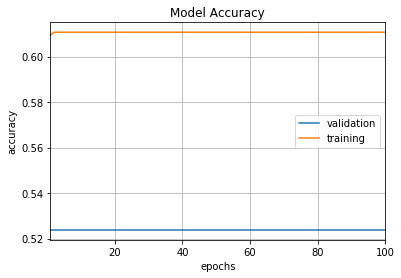

84/84 [==============================] - 0s 156us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.7076556824502491, 0.5238095266478402]
 best Score: 0.7500000028383165          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 0.9997 - acc: 0.5220 - val_loss: 0.6151 - val_acc: 0.6867
Epoch 2/100
 - 0s - loss: 0.6614 - acc: 0.5925 - val_loss: 0.6089 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.6600 - acc: 0.5925 - val_loss: 0.6232 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.6635 - acc: 0.5952 - val_loss: 0.6185 - val_acc: 0.6867
Epoch 5/100
 - 0s - loss: 0.6582 - acc: 0.5939 - val_loss: 0.6274 - val_acc: 0.6988
Epoch 6/100
 - 0s - loss: 0.6593 - acc: 0.6178 - val_loss: 0.6049 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.6522 - acc: 0.5939 - val_loss: 0.6015 - val_acc: 0.6867
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5742 - acc: 0.7111 - val_loss: 0.5603 - val_acc: 0.7590
Epoch 94/100
 - 0s - loss: 0.5776 - acc: 0.7137 - val_loss: 0.5757 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.5655 - acc: 0.7244 - val_loss: 0.5531 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.5871 - acc: 0.7124 - val_loss: 0.5654 - val_acc: 0.7590
Epoch 97/100
 - 0s - loss: 0.5832 - acc: 0.6937 - val_loss: 0.5788 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.5771 - acc: 0.7150 - val_loss: 0.5660 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.5751 - acc: 0.7124 - val_loss: 0.5551 - val_acc: 0.7711
Epoch 100/100
 - 0s - loss: 0.5828 - acc: 0.7177 - val_loss: 0.5576 - val_acc: 0.7711


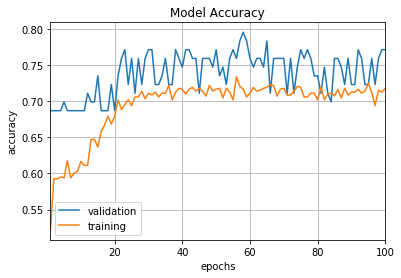

83/83 [==============================] - 0s 182us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5575792121599956, 0.7710843387856541]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 0.7611 - acc: 0.5925 - val_loss: 0.6541 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.6752 - acc: 0.5979 - val_loss: 0.6860 - val_acc: 0.4940
Epoch 3/100
 - 0s - loss: 0.6753 - acc: 0.6032 - val_loss: 0.6443 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.6644 - acc: 0.6232 - val_loss: 0.6447 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6567 - acc: 0.6272 - val_loss: 0.6385 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 0.6550 - acc: 0.6152 - val_loss: 0.6350 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.6455 - acc: 0.6338 - val_loss: 0.6504 - val_acc: 0.6024
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5793 - acc: 0.7190 - val_loss: 0.6010 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.5797 - acc: 0.7164 - val_loss: 0.5772 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.5808 - acc: 0.7190 - val_loss: 0.5940 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.5763 - acc: 0.7204 - val_loss: 0.5841 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5769 - acc: 0.7150 - val_loss: 0.5924 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.5815 - acc: 0.7204 - val_loss: 0.5967 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5762 - acc: 0.7217 - val_loss: 0.5784 - val_acc: 0.6627
Epoch 100/100
 - 0s - loss: 0.5843 - acc: 0.7177 - val_loss: 0.5780 - val_acc: 0.6627


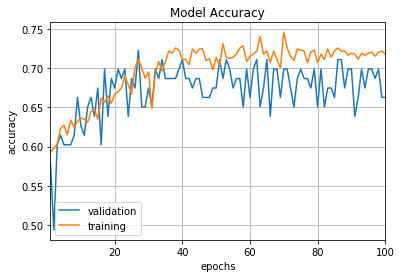

83/83 [==============================] - 0s 259us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.5779697334910013, 0.6626506016915104]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 0.7350 - acc: 0.4381 - val_loss: 0.6866 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.6776 - acc: 0.5965 - val_loss: 0.6712 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6677 - acc: 0.6045 - val_loss: 0.6636 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6616 - acc: 0.6045 - val_loss: 0.6594 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6575 - acc: 0.6019 - val_loss: 0.6562 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6507 - acc: 0.5992 - val_loss: 0.6527 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6431 - acc: 0.6112 - val_loss: 0.6538 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5617 - acc: 0.7217 - val_loss: 0.6179 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.5616 - acc: 0.7190 - val_loss: 0.6133 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.5646 - acc: 0.7164 - val_loss: 0.6188 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.5603 - acc: 0.7217 - val_loss: 0.6257 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.5615 - acc: 0.7257 - val_loss: 0.6222 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.5629 - acc: 0.7244 - val_loss: 0.6178 - val_acc: 0.6867
Epoch 99/100
 - 0s - loss: 0.5597 - acc: 0.7297 - val_loss: 0.6276 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.5663 - acc: 0.7244 - val_loss: 0.6239 - val_acc: 0.6867


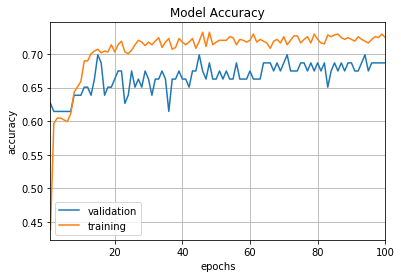

83/83 [==============================] - 0s 212us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6238824172192309, 0.6867469822067812]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 0.6610 - acc: 0.6032 - val_loss: 0.6699 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.6574 - acc: 0.6032 - val_loss: 0.6703 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.6572 - acc: 0.6032 - val_loss: 0.6679 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.6583 - acc: 0.6032 - val_loss: 0.6681 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.6540 - acc: 0.6032 - val_loss: 0.6679 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.6544 - acc: 0.6032 - val_loss: 0.6658 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.6526 - acc: 0.6032 - val_loss: 0.6639 - val_acc: 0.5904
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5750 - acc: 0.7190 - val_loss: 0.5855 - val_acc: 0.7470
Epoch 94/100
 - 0s - loss: 0.5748 - acc: 0.7124 - val_loss: 0.5850 - val_acc: 0.7711
Epoch 95/100
 - 0s - loss: 0.5715 - acc: 0.7164 - val_loss: 0.5859 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.5724 - acc: 0.7164 - val_loss: 0.5845 - val_acc: 0.7711
Epoch 97/100
 - 0s - loss: 0.5741 - acc: 0.7137 - val_loss: 0.5895 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.5751 - acc: 0.7071 - val_loss: 0.5852 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.5741 - acc: 0.7084 - val_loss: 0.5910 - val_acc: 0.7470
Epoch 100/100
 - 0s - loss: 0.5753 - acc: 0.7150 - val_loss: 0.5851 - val_acc: 0.7470


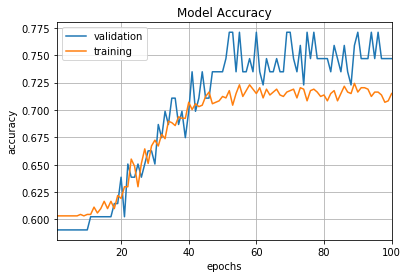

83/83 [==============================] - 0s 248us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5850844433508724, 0.7469879582703832]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 0.6692 - acc: 0.6032 - val_loss: 0.6717 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.6627 - acc: 0.6032 - val_loss: 0.6718 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.6628 - acc: 0.6032 - val_loss: 0.6734 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.6618 - acc: 0.6032 - val_loss: 0.6709 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.6611 - acc: 0.6032 - val_loss: 0.6705 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.6601 - acc: 0.6032 - val_loss: 0.6698 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.6606 - acc: 0.6032 - val_loss: 0.6695 - val_acc: 0.5904
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5765 - acc: 0.7217 - val_loss: 0.5883 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.5784 - acc: 0.7204 - val_loss: 0.5824 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.5774 - acc: 0.7190 - val_loss: 0.5914 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.5756 - acc: 0.7217 - val_loss: 0.5919 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.5780 - acc: 0.7190 - val_loss: 0.5799 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.5755 - acc: 0.7124 - val_loss: 0.5924 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.5754 - acc: 0.7190 - val_loss: 0.5892 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.5748 - acc: 0.7204 - val_loss: 0.5945 - val_acc: 0.6747


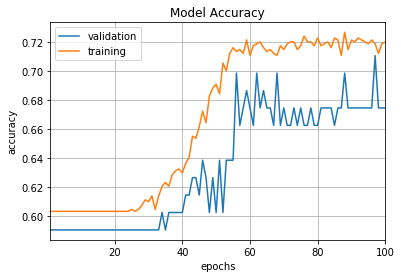

83/83 [==============================] - 0s 261us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5945132338857076, 0.6746987976941717]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 0.6764 - acc: 0.5712 - val_loss: 0.6410 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.6503 - acc: 0.6059 - val_loss: 0.6428 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 0.6484 - acc: 0.6138 - val_loss: 0.6347 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.6431 - acc: 0.6019 - val_loss: 0.6434 - val_acc: 0.6627
Epoch 5/100
 - 0s - loss: 0.6453 - acc: 0.6125 - val_loss: 0.6285 - val_acc: 0.6627
Epoch 6/100
 - 0s - loss: 0.6409 - acc: 0.6152 - val_loss: 0.6253 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.6233 - acc: 0.6498 - val_loss: 0.6008 - val_acc: 0.6506
Epoch 8

Epoch 93/100
 - 0s - loss: 0.5778 - acc: 0.7124 - val_loss: 0.5471 - val_acc: 0.7470
Epoch 94/100
 - 0s - loss: 0.5765 - acc: 0.7111 - val_loss: 0.5483 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.5767 - acc: 0.7097 - val_loss: 0.5475 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.5735 - acc: 0.7164 - val_loss: 0.5751 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.5849 - acc: 0.7111 - val_loss: 0.5488 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.5754 - acc: 0.7057 - val_loss: 0.5475 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.5798 - acc: 0.7004 - val_loss: 0.5485 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.5777 - acc: 0.7177 - val_loss: 0.5574 - val_acc: 0.7590


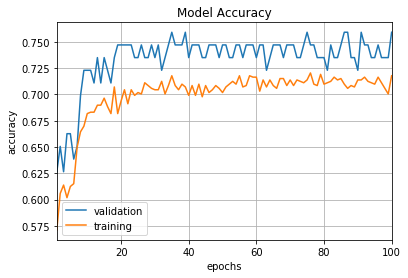

83/83 [==============================] - 0s 287us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.5574367764484451, 0.7590361388332872]
 best Score: 0.7710843387856541          
-------------------------------------------------------------------------------------------




In [38]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.binary_crossentropy,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [39]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7710843387856541
0.6932157209787433


[[0.6317412257194519, 0.6547619076002211],
 [0.54080502476011, 0.7500000028383165],
 [0.5614626010258993, 0.7023809552192688],
 [0.7076556824502491, 0.5238095266478402],
 [0.5575792121599956, 0.7710843387856541],
 [0.5779697334910013, 0.6626506016915104],
 [0.6238824172192309, 0.6867469822067812],
 [0.5850844433508724, 0.7469879582703832],
 [0.5945132338857076, 0.6746987976941717],
 [0.5574367764484451, 0.7590361388332872]]

In [40]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7074249460715163


[0.725333335796992,
 0.6999999992052715,
 0.7253333365917206,
 0.6106666727860769,
 0.7177097233094166,
 0.7177097202537857,
 0.7243675065739018,
 0.715046604765398,
 0.7203728365358436,
 0.7177097248967573]

# 12 #losses.kullback_leibler_divergence,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 0.6754 - acc: 0.6093 - val_loss: 0.6835 - val_acc: 0.5357
Epoch 2/100
 - 0s - loss: 0.6576 - acc: 0.6093 - val_loss: 0.6847 - val_acc: 0.5357
Epoch 3/100
 - 0s - loss: 0.6571 - acc: 0.6093 - val_loss: 0.6849 - val_acc: 0.5357
Epoch 4/100
 - 0s - loss: 0.6585 - acc: 0.6093 - val_loss: 0.6934 - val_acc: 0.5357
Epoch 5/100
 - 0s - loss: 0.6569 - acc: 0.6093 - val_loss: 0.6839 - val_acc: 0.5357
Epoch 6/100
 - 0s - loss: 0.6567 - acc: 0.6093 - val_loss: 0.6789 - val_acc: 0.5476
Epoch 7/100
 - 0s - loss: 0.6560 - acc: 0.6093 - val_loss: 0.6839 - val_acc: 0.5357
Epoch 8/100
 - 0s - loss: 0.6547 - acc: 0.6093 - val_loss: 0.6868 - val_acc: 0.5357
Epoch 9/100
 - 0s - loss: 0.6547 - acc: 0.6093 - val_loss: 0.6809 - val_acc: 0.5476
Epoch 10/100
 - 0s - loss: 0.6542 - acc: 0.6093 - val_loss: 0.6862 - val_acc: 0.5476
Epoch 11/100
 - 0s - loss: 0.6543 - acc: 0.6093 - val_loss: 0.6791 - val_acc: 0.5476
Epoch 12/100
 - 0s -

Epoch 97/100
 - 0s - loss: 0.5944 - acc: 0.6987 - val_loss: 0.6236 - val_acc: 0.6667
Epoch 98/100
 - 0s - loss: 0.5921 - acc: 0.6933 - val_loss: 0.6193 - val_acc: 0.6905
Epoch 99/100
 - 0s - loss: 0.5911 - acc: 0.7027 - val_loss: 0.6252 - val_acc: 0.6905
Epoch 100/100
 - 0s - loss: 0.5930 - acc: 0.6933 - val_loss: 0.6241 - val_acc: 0.6786


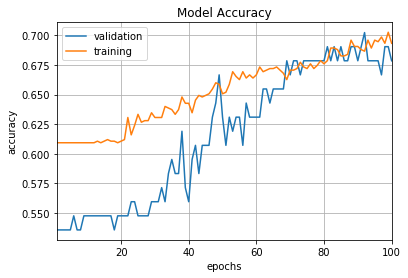

84/84 [==============================] - 0s 164us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6240953717912946, 0.678571431409745]
 best Score: 0.678571431409745          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 2.3407 - acc: 0.4000 - val_loss: 1.1278 - val_acc: 0.3810
Epoch 2/100
 - 0s - loss: 0.7896 - acc: 0.4200 - val_loss: 0.6848 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.6760 - acc: 0.6000 - val_loss: 0.6626 - val_acc: 0.6190
Epoch 4/100
 - 0s - loss: 0.6721 - acc: 0.6000 - val_loss: 0.6609 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.6716 - acc: 0.6000 - val_loss: 0.6593 - val_acc: 0.6190
Epoch 6/100
 - 0s - loss: 0.6720 - acc: 0.6000 - val_loss: 0.6637 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.6718 - acc: 0.6000 - val_loss: 0.6613 - val_acc: 0.6190
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5806 - acc: 0.7187 - val_loss: 0.5263 - val_acc: 0.7500
Epoch 94/100
 - 0s - loss: 0.5780 - acc: 0.7147 - val_loss: 0.5420 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.5807 - acc: 0.7147 - val_loss: 0.5246 - val_acc: 0.7500
Epoch 96/100
 - 0s - loss: 0.5831 - acc: 0.7053 - val_loss: 0.5528 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.5829 - acc: 0.7173 - val_loss: 0.5339 - val_acc: 0.7500
Epoch 98/100
 - 0s - loss: 0.5815 - acc: 0.7080 - val_loss: 0.5343 - val_acc: 0.7500
Epoch 99/100
 - 0s - loss: 0.5800 - acc: 0.7120 - val_loss: 0.5275 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.5783 - acc: 0.7107 - val_loss: 0.5257 - val_acc: 0.7500


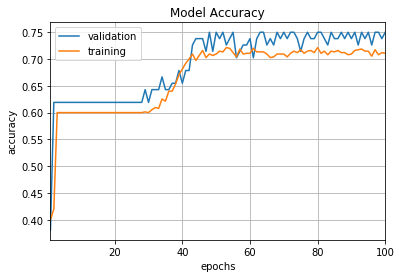

84/84 [==============================] - 0s 220us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.5257473431882405, 0.75]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 0.9566 - acc: 0.5707 - val_loss: 0.6355 - val_acc: 0.6667
Epoch 2/100
 - 0s - loss: 0.6706 - acc: 0.5947 - val_loss: 0.6721 - val_acc: 0.6548
Epoch 3/100
 - 0s - loss: 0.6731 - acc: 0.5947 - val_loss: 0.6363 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 0.6755 - acc: 0.5840 - val_loss: 0.6666 - val_acc: 0.6548
Epoch 5/100
 - 0s - loss: 0.6674 - acc: 0.5947 - val_loss: 0.6343 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.6674 - acc: 0.5893 - val_loss: 0.6964 - val_acc: 0.4524
Epoch 7/100
 - 0s - loss: 0.6647 - acc: 0.5987 - val_loss: 0.6236 - val_acc: 0.6667
Epoch 8/100
 - 0s - loss: 0.6647 - a

 - 0s - loss: 0.5869 - acc: 0.7173 - val_loss: 0.5616 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.5906 - acc: 0.7133 - val_loss: 0.5819 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: 0.5882 - acc: 0.7093 - val_loss: 0.5572 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.5832 - acc: 0.7147 - val_loss: 0.5568 - val_acc: 0.7143
Epoch 97/100
 - 0s - loss: 0.5860 - acc: 0.7080 - val_loss: 0.5758 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.5825 - acc: 0.7227 - val_loss: 0.5567 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.5829 - acc: 0.7280 - val_loss: 0.5570 - val_acc: 0.7143
Epoch 100/100
 - 0s - loss: 0.5819 - acc: 0.7200 - val_loss: 0.5572 - val_acc: 0.7143


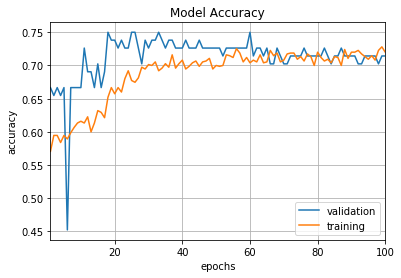

84/84 [==============================] - 0s 220us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5572266408375331, 0.7142857114473978]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 0.6583 - acc: 0.6107 - val_loss: 0.7104 - val_acc: 0.5238
Epoch 2/100
 - 0s - loss: 0.6558 - acc: 0.6107 - val_loss: 0.7175 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: 0.6551 - acc: 0.6107 - val_loss: 0.7131 - val_acc: 0.5238
Epoch 4/100
 - 0s - loss: 0.6542 - acc: 0.6107 - val_loss: 0.7016 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: 0.6551 - acc: 0.6107 - val_loss: 0.7107 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: 0.6526 - acc: 0.6107 - val_loss: 0.6993 - val_acc: 0.5238
Epoch 7/100
 - 0s - loss: 0.6516 - acc: 0.6107 - val_loss: 0.7032 - val_acc: 0.5238
Epoch 8/100
 - 0s - lo

Epoch 93/100
 - 0s - loss: 0.5678 - acc: 0.7253 - val_loss: 0.6483 - val_acc: 0.6667
Epoch 94/100
 - 0s - loss: 0.5665 - acc: 0.7160 - val_loss: 0.6371 - val_acc: 0.6667
Epoch 95/100
 - 0s - loss: 0.5672 - acc: 0.7293 - val_loss: 0.6517 - val_acc: 0.6429
Epoch 96/100
 - 0s - loss: 0.5697 - acc: 0.7187 - val_loss: 0.6435 - val_acc: 0.6667
Epoch 97/100
 - 0s - loss: 0.5665 - acc: 0.7240 - val_loss: 0.6545 - val_acc: 0.6310
Epoch 98/100
 - 0s - loss: 0.5647 - acc: 0.7160 - val_loss: 0.6608 - val_acc: 0.6429
Epoch 99/100
 - 0s - loss: 0.5688 - acc: 0.7253 - val_loss: 0.6453 - val_acc: 0.6786
Epoch 100/100
 - 0s - loss: 0.5648 - acc: 0.7227 - val_loss: 0.6397 - val_acc: 0.6667


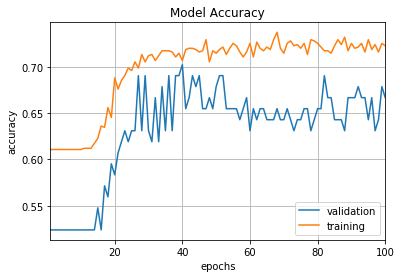

84/84 [==============================] - 0s 168us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6396919063159398, 0.6666666638283503]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 0.6959 - acc: 0.5859 - val_loss: 0.6196 - val_acc: 0.6867
Epoch 2/100
 - 0s - loss: 0.6610 - acc: 0.5925 - val_loss: 0.6141 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.6647 - acc: 0.5925 - val_loss: 0.6204 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.6603 - acc: 0.5952 - val_loss: 0.6274 - val_acc: 0.6867
Epoch 5/100
 - 0s - loss: 0.6549 - acc: 0.5965 - val_loss: 0.6249 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.6545 - acc: 0.5939 - val_loss: 0.6235 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.6535 - acc: 0.5952 - val_loss: 0.6133 - val_acc: 0.6867
Epoch 8/100
 - 0s - lo

Epoch 93/100
 - 0s - loss: 0.5768 - acc: 0.7071 - val_loss: 0.5950 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5758 - acc: 0.7031 - val_loss: 0.5803 - val_acc: 0.7590
Epoch 95/100
 - 0s - loss: 0.5786 - acc: 0.7190 - val_loss: 0.5855 - val_acc: 0.7590
Epoch 96/100
 - 0s - loss: 0.5756 - acc: 0.7164 - val_loss: 0.5811 - val_acc: 0.7711
Epoch 97/100
 - 0s - loss: 0.5753 - acc: 0.7137 - val_loss: 0.5840 - val_acc: 0.7590
Epoch 98/100
 - 0s - loss: 0.5758 - acc: 0.7190 - val_loss: 0.5844 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.5758 - acc: 0.7150 - val_loss: 0.5990 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.5735 - acc: 0.7111 - val_loss: 0.5879 - val_acc: 0.7470


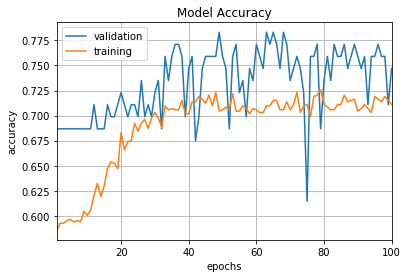

83/83 [==============================] - 0s 197us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.5879021617303412, 0.7469879582703832]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 0.6747 - acc: 0.6205 - val_loss: 0.6609 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.6653 - acc: 0.6152 - val_loss: 0.6516 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.6645 - acc: 0.6019 - val_loss: 0.7006 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.6637 - acc: 0.6085 - val_loss: 0.6417 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.6485 - acc: 0.6178 - val_loss: 0.6378 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 0.6505 - acc: 0.6338 - val_loss: 0.6367 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.6403 - acc: 0.6378 - val_loss: 0.6302 - val_acc: 0.6024
Epoch 8/100
 - 0s - lo

Epoch 93/100
 - 0s - loss: 0.5766 - acc: 0.7244 - val_loss: 0.5861 - val_acc: 0.6265
Epoch 94/100
 - 0s - loss: 0.5795 - acc: 0.7111 - val_loss: 0.5761 - val_acc: 0.6506
Epoch 95/100
 - 0s - loss: 0.5715 - acc: 0.7137 - val_loss: 0.5765 - val_acc: 0.6506
Epoch 96/100
 - 0s - loss: 0.5821 - acc: 0.7257 - val_loss: 0.5784 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.5778 - acc: 0.7137 - val_loss: 0.5745 - val_acc: 0.6627
Epoch 98/100
 - 0s - loss: 0.5755 - acc: 0.7124 - val_loss: 0.6173 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5841 - acc: 0.7177 - val_loss: 0.5818 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.5760 - acc: 0.7164 - val_loss: 0.5964 - val_acc: 0.7229


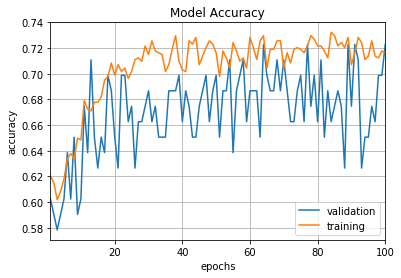

83/83 [==============================] - 0s 215us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.5964015420660915, 0.7228915605200342]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 1.3545 - acc: 0.6005 - val_loss: 0.7427 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.6904 - acc: 0.6005 - val_loss: 0.6513 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6565 - acc: 0.6019 - val_loss: 0.6485 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6532 - acc: 0.6019 - val_loss: 0.6486 - val_acc: 0.6024
Epoch 5/100
 - 0s - loss: 0.6515 - acc: 0.6019 - val_loss: 0.6487 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 0.6504 - acc: 0.6032 - val_loss: 0.6485 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.6495 - acc: 0.6032 - val_loss: 0.6481 - val_acc: 0.6145
Epoch 8/100
 - 0s - lo

Epoch 93/100
 - 0s - loss: 0.5680 - acc: 0.7137 - val_loss: 0.6435 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.5691 - acc: 0.7084 - val_loss: 0.6419 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.5697 - acc: 0.7257 - val_loss: 0.6390 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.5673 - acc: 0.7244 - val_loss: 0.6416 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.5672 - acc: 0.7257 - val_loss: 0.6424 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.5657 - acc: 0.7230 - val_loss: 0.6432 - val_acc: 0.6627
Epoch 99/100
 - 0s - loss: 0.5701 - acc: 0.7270 - val_loss: 0.6446 - val_acc: 0.6627
Epoch 100/100
 - 0s - loss: 0.5679 - acc: 0.7244 - val_loss: 0.6402 - val_acc: 0.6988


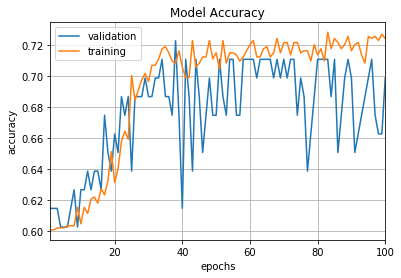

83/83 [==============================] - 0s 207us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6402313522545688, 0.6987951800047633]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.6892 - acc: 0.6032 - val_loss: 0.6868 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.6837 - acc: 0.6032 - val_loss: 0.6834 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.6807 - acc: 0.6032 - val_loss: 0.6813 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.6785 - acc: 0.6032 - val_loss: 0.6801 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.6766 - acc: 0.6032 - val_loss: 0.6789 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.6753 - acc: 0.6032 - val_loss: 0.6779 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.6741 - acc: 0.6032 - val_loss: 0.6774 - val_acc: 0.5904
Epoch 8/100
 - 0s - lo

Epoch 93/100
 - 0s - loss: 0.6719 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 94/100
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 95/100
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 96/100
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 97/100
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6771 - val_acc: 0.5904
Epoch 98/100
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 99/100
 - 0s - loss: 0.6718 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904
Epoch 100/100
 - 0s - loss: 0.6717 - acc: 0.6032 - val_loss: 0.6772 - val_acc: 0.5904


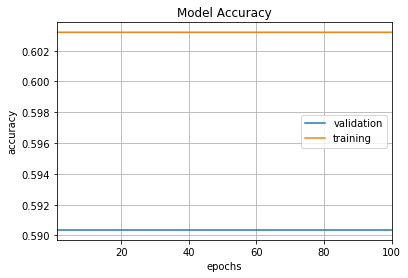

83/83 [==============================] - 0s 235us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.677234253251409, 0.590361450091902]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.8390 - acc: 0.5939 - val_loss: 0.6395 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.6427 - acc: 0.6272 - val_loss: 0.6484 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: 0.6429 - acc: 0.6378 - val_loss: 0.6327 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6348 - acc: 0.6365 - val_loss: 0.6272 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.6387 - acc: 0.6312 - val_loss: 0.6265 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.6334 - acc: 0.6391 - val_loss: 0.6283 - val_acc: 0.7229
Epoch 7/100
 - 0s - loss: 0.6293 - acc: 0.6525 - val_loss: 0.6315 - val_acc: 0.6024
Epoch 8/100
 - 0s - loss

Epoch 93/100
 - 0s - loss: 0.5767 - acc: 0.7164 - val_loss: 0.5823 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5756 - acc: 0.7257 - val_loss: 0.5905 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.5784 - acc: 0.7177 - val_loss: 0.5834 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.5823 - acc: 0.7097 - val_loss: 0.5757 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.5772 - acc: 0.7137 - val_loss: 0.6000 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.5769 - acc: 0.7124 - val_loss: 0.5809 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.5766 - acc: 0.7164 - val_loss: 0.5756 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.5771 - acc: 0.7190 - val_loss: 0.5790 - val_acc: 0.7108


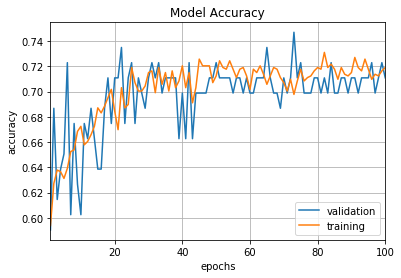

83/83 [==============================] - 0s 219us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5790166459887861, 0.7108433778027454]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.7027 - acc: 0.6005 - val_loss: 0.6526 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.6612 - acc: 0.6005 - val_loss: 0.6446 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6564 - acc: 0.6005 - val_loss: 0.6424 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6541 - acc: 0.5992 - val_loss: 0.6397 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6523 - acc: 0.6005 - val_loss: 0.6383 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6507 - acc: 0.6019 - val_loss: 0.6351 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6492 - acc: 0.6019 - val_loss: 0.6327 - val_acc: 0.6145
Epoch 8/100
 - 0s - l

Epoch 93/100
 - 0s - loss: 0.5805 - acc: 0.7004 - val_loss: 0.5435 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.5839 - acc: 0.7057 - val_loss: 0.5388 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.5777 - acc: 0.7177 - val_loss: 0.5412 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.5849 - acc: 0.7177 - val_loss: 0.5389 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.5772 - acc: 0.7124 - val_loss: 0.5390 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.5778 - acc: 0.7137 - val_loss: 0.5409 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.5800 - acc: 0.7164 - val_loss: 0.5409 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.5790 - acc: 0.7084 - val_loss: 0.5408 - val_acc: 0.7349


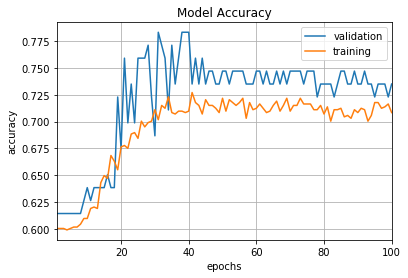

83/83 [==============================] - 0s 176us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.5408486687993429, 0.7349397619086576]
 best Score: 0.75          
-------------------------------------------------------------------------------------------




In [41]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.kullback_leibler_divergence,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [42]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.75
0.7014343095283979


[[0.6240953717912946, 0.678571431409745],
 [0.5257473431882405, 0.75],
 [0.5572266408375331, 0.7142857114473978],
 [0.6396919063159398, 0.6666666638283503],
 [0.5879021617303412, 0.7469879582703832],
 [0.5964015420660915, 0.7228915605200342],
 [0.6402313522545688, 0.6987951800047633],
 [0.677234253251409, 0.590361450091902],
 [0.5790166459887861, 0.7108433778027454],
 [0.5408486687993429, 0.7349397619086576]]

In [43]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7029090120389467


[0.6933333359162013,
 0.7106666684150695,
 0.7200000007947286,
 0.7226666684945424,
 0.7110519281398758,
 0.7163781641961414,
 0.7243675137169352,
 0.603195745205276,
 0.7190412802797818,
 0.7083888152309169]

# 13 #poisson

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 11s - loss: 1.3965 - acc: 0.6093 - val_loss: 0.8820 - val_acc: 0.5476
Epoch 2/100
 - 0s - loss: 0.8264 - acc: 0.6320 - val_loss: 0.8345 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.8241 - acc: 0.6320 - val_loss: 0.8385 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.8219 - acc: 0.6347 - val_loss: 0.8348 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.8205 - acc: 0.6320 - val_loss: 0.8313 - val_acc: 0.6190
Epoch 6/100
 - 0s - loss: 0.8199 - acc: 0.6320 - val_loss: 0.8303 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.8185 - acc: 0.6453 - val_loss: 0.8329 - val_acc: 0.5833
Epoch 8/100
 - 0s - loss: 0.8178 - acc: 0.6440 - val_loss: 0.8288 - val_acc: 0.6310
Epoch 9/100
 - 0s - loss: 0.8150 - acc: 0.6467 - val_loss: 0.8264 - val_acc: 0.6310
Epoch 10/100
 - 0s - loss: 0.8133 - acc: 0.6853 - val_loss: 0.8293 - val_acc: 0.6190
Epoch 11/100
 - 0s - loss: 0.8121 - acc: 0.6627 - val_loss: 0.8232 - val_acc: 0.6429
Epoch 12/100
 - 0s -

Epoch 97/100
 - 0s - loss: 0.7849 - acc: 0.7200 - val_loss: 0.8079 - val_acc: 0.6548
Epoch 98/100
 - 0s - loss: 0.7887 - acc: 0.7093 - val_loss: 0.8150 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.7870 - acc: 0.7187 - val_loss: 0.8068 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.7855 - acc: 0.7107 - val_loss: 0.8060 - val_acc: 0.7143


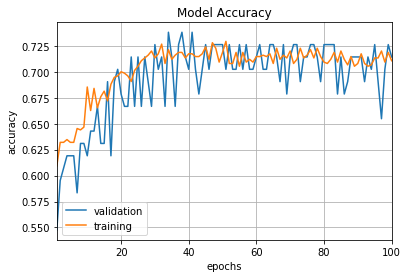

84/84 [==============================] - 0s 202us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.8060483904111952, 0.7142857171240307]
 best Score: 0.7142857171240307          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 11s - loss: 1.3678 - acc: 0.4000 - val_loss: 0.9718 - val_acc: 0.3810
Epoch 2/100
 - 0s - loss: 0.8642 - acc: 0.4867 - val_loss: 0.8312 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.8373 - acc: 0.6000 - val_loss: 0.8272 - val_acc: 0.6190
Epoch 4/100
 - 0s - loss: 0.8352 - acc: 0.6000 - val_loss: 0.8255 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.8343 - acc: 0.6000 - val_loss: 0.8261 - val_acc: 0.6190
Epoch 6/100
 - 0s - loss: 0.8339 - acc: 0.6000 - val_loss: 0.8244 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.8339 - acc: 0.6000 - val_loss: 0.8255 - val_acc: 0.6190
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.7862 - acc: 0.7120 - val_loss: 0.7719 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.7837 - acc: 0.7187 - val_loss: 0.7853 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.7845 - acc: 0.7093 - val_loss: 0.7739 - val_acc: 0.7262
Epoch 96/100
 - 0s - loss: 0.7839 - acc: 0.7107 - val_loss: 0.7674 - val_acc: 0.7143
Epoch 97/100
 - 0s - loss: 0.7844 - acc: 0.7187 - val_loss: 0.7649 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.7866 - acc: 0.7093 - val_loss: 0.7670 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.7843 - acc: 0.7133 - val_loss: 0.7886 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.7844 - acc: 0.7147 - val_loss: 0.7711 - val_acc: 0.7262


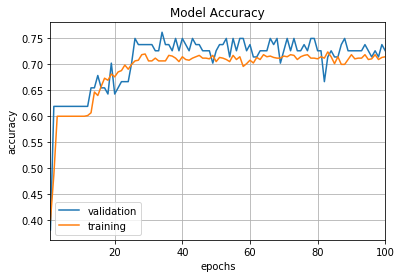

84/84 [==============================] - 0s 251us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.7711158905710492, 0.7261904790287926]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 11s - loss: 1.1892 - acc: 0.5160 - val_loss: 0.8150 - val_acc: 0.6667
Epoch 2/100
 - 0s - loss: 0.8389 - acc: 0.5960 - val_loss: 0.8097 - val_acc: 0.6667
Epoch 3/100
 - 0s - loss: 0.8391 - acc: 0.5907 - val_loss: 0.8157 - val_acc: 0.6548
Epoch 4/100
 - 0s - loss: 0.8348 - acc: 0.5933 - val_loss: 0.8167 - val_acc: 0.7024
Epoch 5/100
 - 0s - loss: 0.8324 - acc: 0.5893 - val_loss: 0.8132 - val_acc: 0.6905
Epoch 6/100
 - 0s - loss: 0.8343 - acc: 0.5987 - val_loss: 0.8074 - val_acc: 0.6667
Epoch 7/100
 - 0s - loss: 0.8343 - acc: 0.5787 - val_loss: 0.8026 - val_acc: 0.6667
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.7888 - acc: 0.7200 - val_loss: 0.7794 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.7897 - acc: 0.7187 - val_loss: 0.7936 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.7902 - acc: 0.7133 - val_loss: 0.7899 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.7910 - acc: 0.7160 - val_loss: 0.7787 - val_acc: 0.7262
Epoch 97/100
 - 1s - loss: 0.7903 - acc: 0.7093 - val_loss: 0.7885 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.7886 - acc: 0.7147 - val_loss: 0.7780 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.7929 - acc: 0.7040 - val_loss: 0.8034 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.7947 - acc: 0.7093 - val_loss: 0.7793 - val_acc: 0.7024


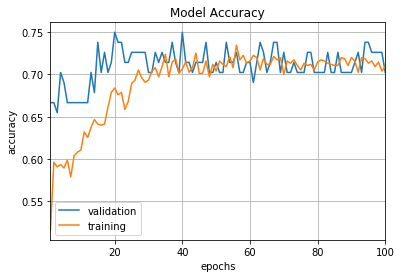

84/84 [==============================] - 0s 409us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.7792834128652301, 0.7023809467043195]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 11s - loss: 1.4608 - acc: 0.5267 - val_loss: 0.8629 - val_acc: 0.5238
Epoch 2/100
 - 0s - loss: 0.8344 - acc: 0.6107 - val_loss: 0.8455 - val_acc: 0.5357
Epoch 3/100
 - 0s - loss: 0.8331 - acc: 0.6080 - val_loss: 0.8426 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 0.8367 - acc: 0.6067 - val_loss: 0.8408 - val_acc: 0.5595
Epoch 5/100
 - 0s - loss: 0.8298 - acc: 0.5973 - val_loss: 0.8579 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: 0.8350 - acc: 0.5947 - val_loss: 0.8439 - val_acc: 0.5238
Epoch 7/100
 - 0s - loss: 0.8275 - acc: 0.6160 - val_loss: 0.8372 - val_acc: 0.5833
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.7862 - acc: 0.7147 - val_loss: 0.8239 - val_acc: 0.6548
Epoch 94/100
 - 0s - loss: 0.7864 - acc: 0.7187 - val_loss: 0.8626 - val_acc: 0.6190
Epoch 95/100
 - 0s - loss: 0.7881 - acc: 0.7147 - val_loss: 0.8271 - val_acc: 0.6429
Epoch 96/100
 - 0s - loss: 0.7841 - acc: 0.7147 - val_loss: 0.8133 - val_acc: 0.6548
Epoch 97/100
 - 0s - loss: 0.7863 - acc: 0.7200 - val_loss: 0.8138 - val_acc: 0.6667
Epoch 98/100
 - 0s - loss: 0.7866 - acc: 0.7093 - val_loss: 0.8381 - val_acc: 0.6667
Epoch 99/100
 - 0s - loss: 0.7846 - acc: 0.7227 - val_loss: 0.8222 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.7856 - acc: 0.7227 - val_loss: 0.8174 - val_acc: 0.6548


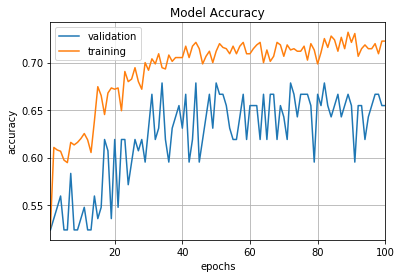

84/84 [==============================] - 0s 237us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.817375069572812, 0.6547618990852719]
 best Score: 0.7261904790287926          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 2.5421 - acc: 0.4075 - val_loss: 1.4479 - val_acc: 0.3133
Epoch 2/100
 - 0s - loss: 0.9962 - acc: 0.4075 - val_loss: 0.9071 - val_acc: 0.3373
Epoch 3/100
 - 0s - loss: 0.8665 - acc: 0.4021 - val_loss: 0.8573 - val_acc: 0.3614
Epoch 4/100
 - 0s - loss: 0.8500 - acc: 0.4900 - val_loss: 0.8402 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.8438 - acc: 0.5739 - val_loss: 0.8324 - val_acc: 0.6988
Epoch 6/100
 - 0s - loss: 0.8409 - acc: 0.5952 - val_loss: 0.8269 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.8394 - acc: 0.5952 - val_loss: 0.8241 - val_acc: 0.6867
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.7876 - acc: 0.7217 - val_loss: 0.7853 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.7872 - acc: 0.7230 - val_loss: 0.7838 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.7866 - acc: 0.7204 - val_loss: 0.7784 - val_acc: 0.7590
Epoch 96/100
 - 0s - loss: 0.7869 - acc: 0.7324 - val_loss: 0.7770 - val_acc: 0.7590
Epoch 97/100
 - 0s - loss: 0.7875 - acc: 0.7244 - val_loss: 0.7835 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.7868 - acc: 0.7297 - val_loss: 0.7759 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.7884 - acc: 0.7150 - val_loss: 0.7846 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.7879 - acc: 0.7204 - val_loss: 0.7809 - val_acc: 0.7470


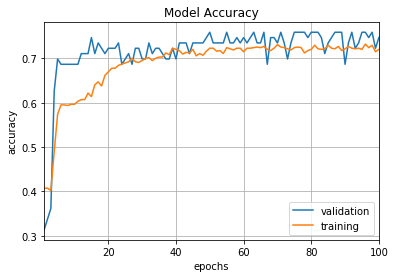

83/83 [==============================] - 0s 281us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.780931167573814, 0.7469879532434854]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 12s - loss: 1.6337 - acc: 0.4487 - val_loss: 0.8588 - val_acc: 0.5783
Epoch 2/100
 - 0s - loss: 0.8399 - acc: 0.5885 - val_loss: 0.8508 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.8370 - acc: 0.6005 - val_loss: 0.8449 - val_acc: 0.5542
Epoch 4/100
 - 0s - loss: 0.8377 - acc: 0.5779 - val_loss: 0.8431 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: 0.8345 - acc: 0.6032 - val_loss: 0.8409 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.8320 - acc: 0.5925 - val_loss: 0.8400 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.8324 - acc: 0.5899 - val_loss: 0.8381 - val_acc: 0.5783
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.7874 - acc: 0.7270 - val_loss: 0.7938 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.7859 - acc: 0.7257 - val_loss: 0.7927 - val_acc: 0.6265
Epoch 95/100
 - 0s - loss: 0.7863 - acc: 0.7217 - val_loss: 0.7934 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.7858 - acc: 0.7217 - val_loss: 0.7942 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.7860 - acc: 0.7297 - val_loss: 0.7941 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.7862 - acc: 0.7244 - val_loss: 0.7949 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.7872 - acc: 0.7244 - val_loss: 0.7939 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.7851 - acc: 0.7217 - val_loss: 0.7929 - val_acc: 0.6265


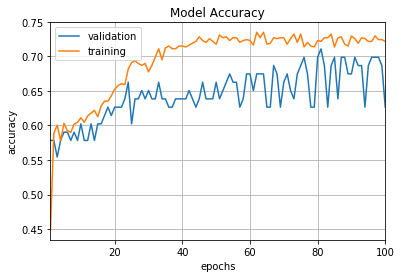

83/83 [==============================] - 0s 233us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.7929023475532072, 0.626506028405155]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 12s - loss: 0.9445 - acc: 0.6005 - val_loss: 0.8297 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.8278 - acc: 0.6099 - val_loss: 0.8261 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.8270 - acc: 0.6112 - val_loss: 0.8249 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.8232 - acc: 0.6245 - val_loss: 0.8282 - val_acc: 0.5663
Epoch 5/100
 - 0s - loss: 0.8244 - acc: 0.6298 - val_loss: 0.8258 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.8225 - acc: 0.6298 - val_loss: 0.8295 - val_acc: 0.5422
Epoch 7/100
 - 0s - loss: 0.8200 - acc: 0.6445 - val_loss: 0.8256 - val_acc: 0.6265
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.7877 - acc: 0.7164 - val_loss: 0.8062 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.7857 - acc: 0.7150 - val_loss: 0.8083 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.7895 - acc: 0.7230 - val_loss: 0.8099 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.7888 - acc: 0.7244 - val_loss: 0.8088 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.7856 - acc: 0.7111 - val_loss: 0.8097 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.7855 - acc: 0.7190 - val_loss: 0.8064 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.7868 - acc: 0.7177 - val_loss: 0.8097 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.7850 - acc: 0.7297 - val_loss: 0.8085 - val_acc: 0.6867


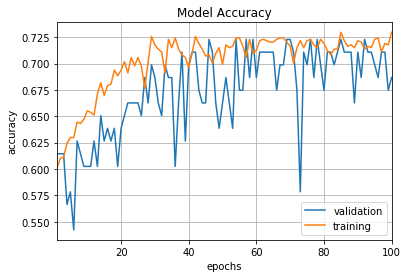

83/83 [==============================] - 0s 255us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.8084928680615253, 0.686746987233679]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 12s - loss: 0.8367 - acc: 0.5965 - val_loss: 0.8228 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.8272 - acc: 0.6085 - val_loss: 0.8368 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.8272 - acc: 0.6099 - val_loss: 0.8277 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.8248 - acc: 0.6152 - val_loss: 0.8264 - val_acc: 0.6506
Epoch 5/100
 - 0s - loss: 0.8238 - acc: 0.6205 - val_loss: 0.8239 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.8215 - acc: 0.6218 - val_loss: 0.8192 - val_acc: 0.6627
Epoch 7/100
 - 0s - loss: 0.8203 - acc: 0.6218 - val_loss: 0.8182 - val_acc: 0.6506
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.7873 - acc: 0.7124 - val_loss: 0.7916 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.7913 - acc: 0.7244 - val_loss: 0.7967 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.7881 - acc: 0.7204 - val_loss: 0.7994 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.7846 - acc: 0.7230 - val_loss: 0.7938 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.7859 - acc: 0.7297 - val_loss: 0.7935 - val_acc: 0.7711
Epoch 98/100
 - 0s - loss: 0.7862 - acc: 0.7230 - val_loss: 0.7933 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.7839 - acc: 0.7230 - val_loss: 0.7985 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.7830 - acc: 0.7297 - val_loss: 0.7930 - val_acc: 0.7470


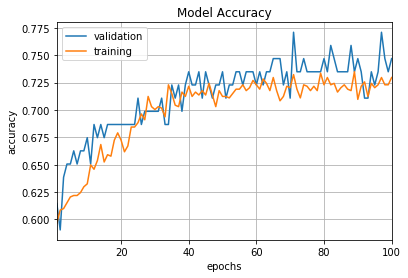

83/83 [==============================] - 0s 237us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.79303338872381, 0.7469879532434854]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 12s - loss: 0.8733 - acc: 0.4940 - val_loss: 0.8364 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.8326 - acc: 0.6032 - val_loss: 0.8347 - val_acc: 0.5904
Epoch 3/100
 - 1s - loss: 0.8314 - acc: 0.6032 - val_loss: 0.8346 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.8310 - acc: 0.6032 - val_loss: 0.8344 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.8313 - acc: 0.6032 - val_loss: 0.8344 - val_acc: 0.5904
Epoch 6/100
 - 0s - loss: 0.8308 - acc: 0.6032 - val_loss: 0.8341 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.8304 - acc: 0.6032 - val_loss: 0.8340 - val_acc: 0.5904
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.7871 - acc: 0.7057 - val_loss: 0.7893 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.7873 - acc: 0.7044 - val_loss: 0.7878 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.7863 - acc: 0.7057 - val_loss: 0.7925 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.7871 - acc: 0.7137 - val_loss: 0.7837 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.7883 - acc: 0.7097 - val_loss: 0.7880 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.7871 - acc: 0.7164 - val_loss: 0.7869 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.7864 - acc: 0.7150 - val_loss: 0.7860 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.7856 - acc: 0.7137 - val_loss: 0.7902 - val_acc: 0.7108


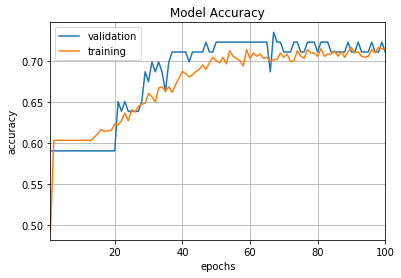

83/83 [==============================] - 0s 289us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.7901598049933651, 0.7108433778027454]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 12s - loss: 0.8741 - acc: 0.5872 - val_loss: 0.8539 - val_acc: 0.5904
Epoch 2/100
 - 0s - loss: 0.8430 - acc: 0.5952 - val_loss: 0.8402 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: 0.8386 - acc: 0.6205 - val_loss: 0.8345 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.8340 - acc: 0.6085 - val_loss: 0.8493 - val_acc: 0.5663
Epoch 5/100
 - 0s - loss: 0.8325 - acc: 0.6165 - val_loss: 0.8270 - val_acc: 0.6145
Epoch 6/100
 - 1s - loss: 0.8294 - acc: 0.6272 - val_loss: 0.8313 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.8352 - acc: 0.6059 - val_loss: 0.8225 - val_acc: 0.6265
Epoch 8

Epoch 93/100
 - 0s - loss: 0.7929 - acc: 0.7031 - val_loss: 0.7753 - val_acc: 0.7590
Epoch 94/100
 - 0s - loss: 0.7956 - acc: 0.7044 - val_loss: 0.7775 - val_acc: 0.7470
Epoch 95/100
 - 0s - loss: 0.7914 - acc: 0.7177 - val_loss: 0.7739 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.7907 - acc: 0.7031 - val_loss: 0.7760 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.7900 - acc: 0.7097 - val_loss: 0.7747 - val_acc: 0.7590
Epoch 98/100
 - 0s - loss: 0.7917 - acc: 0.7071 - val_loss: 0.7736 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.7939 - acc: 0.7164 - val_loss: 0.7736 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.7912 - acc: 0.7084 - val_loss: 0.7742 - val_acc: 0.7349


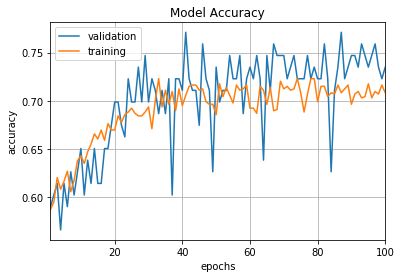

83/83 [==============================] - 0s 257us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.7741749351283154, 0.7349397619086576]
 best Score: 0.7469879532434854          
-------------------------------------------------------------------------------------------




In [44]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.poisson,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [45]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7469879532434854
0.7050631103779623


[[0.8060483904111952, 0.7142857171240307],
 [0.7711158905710492, 0.7261904790287926],
 [0.7792834128652301, 0.7023809467043195],
 [0.817375069572812, 0.6547618990852719],
 [0.780931167573814, 0.7469879532434854],
 [0.7929023475532072, 0.626506028405155],
 [0.8084928680615253, 0.686746987233679],
 [0.79303338872381, 0.7469879532434854],
 [0.7901598049933651, 0.7108433778027454],
 [0.7741749351283154, 0.7349397619086576]]

In [46]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7180901922782263


[0.7106666684150695,
 0.7146666689713796,
 0.7093333331743876,
 0.7226666696866353,
 0.7203728378057163,
 0.7217043964427892,
 0.72969374390004,
 0.7296937430270026,
 0.713715048112501,
 0.708388813246741]

# 14 #losses.cosine_proximity, 

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 12s - loss: -6.6908e-01 - acc: 0.5067 - val_loss: -7.1276e-01 - val_acc: 0.5357
Epoch 2/100
 - 0s - loss: -7.4182e-01 - acc: 0.6093 - val_loss: -7.1828e-01 - val_acc: 0.5357
Epoch 3/100
 - 1s - loss: -7.4481e-01 - acc: 0.6160 - val_loss: -7.1911e-01 - val_acc: 0.5952
Epoch 4/100
 - 1s - loss: -7.4641e-01 - acc: 0.6707 - val_loss: -7.0483e-01 - val_acc: 0.5952
Epoch 5/100
 - 2s - loss: -7.4989e-01 - acc: 0.6773 - val_loss: -7.1796e-01 - val_acc: 0.5952
Epoch 6/100
 - 1s - loss: -7.5382e-01 - acc: 0.6920 - val_loss: -7.2161e-01 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: -7.5809e-01 - acc: 0.7080 - val_loss: -7.1550e-01 - val_acc: 0.6190
Epoch 8/100
 - 1s - loss: -7.5737e-01 - acc: 0.6933 - val_loss: -7.3109e-01 - val_acc: 0.6310
Epoch 9/100
 - 1s - loss: -7.6118e-01 - acc: 0.6933 - val_loss: -7.3590e-01 - val_acc: 0.6310
Epoch 10/100
 - 1s - loss: -7.6298e-01 - acc: 0.6987 - val_loss: -7.3435e-01 - val_acc: 0.6190
Epoch

Epoch 87/100
 - 0s - loss: -7.8070e-01 - acc: 0.7120 - val_loss: -7.6538e-01 - val_acc: 0.7143
Epoch 88/100
 - 1s - loss: -7.8545e-01 - acc: 0.7267 - val_loss: -7.6059e-01 - val_acc: 0.7143
Epoch 89/100
 - 1s - loss: -7.8062e-01 - acc: 0.7173 - val_loss: -7.6150e-01 - val_acc: 0.7143
Epoch 90/100
 - 0s - loss: -7.8595e-01 - acc: 0.7307 - val_loss: -7.6292e-01 - val_acc: 0.7143
Epoch 91/100
 - 0s - loss: -7.8641e-01 - acc: 0.7320 - val_loss: -7.6345e-01 - val_acc: 0.7024
Epoch 92/100
 - 1s - loss: -7.8438e-01 - acc: 0.7200 - val_loss: -7.6313e-01 - val_acc: 0.7143
Epoch 93/100
 - 0s - loss: -7.8174e-01 - acc: 0.7213 - val_loss: -7.6221e-01 - val_acc: 0.7143
Epoch 94/100
 - 0s - loss: -7.8427e-01 - acc: 0.7240 - val_loss: -7.6163e-01 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: -7.8606e-01 - acc: 0.7253 - val_loss: -7.6202e-01 - val_acc: 0.7143
Epoch 96/100
 - 1s - loss: -7.8257e-01 - acc: 0.7200 - val_loss: -7.6006e-01 - val_acc: 0.6548
Epoch 97/100
 - 0s - loss: -7.8609e-01 - acc: 0.72

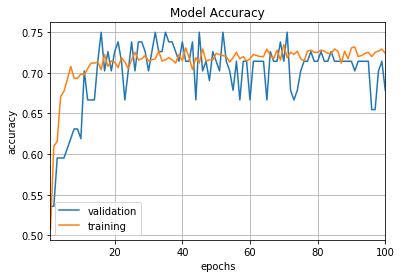

84/84 [==============================] - 0s 432us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [-0.7636483283269972, 0.678571431409745]
 best Score: 0.678571431409745          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 12s - loss: -6.7930e-01 - acc: 0.5480 - val_loss: -7.4463e-01 - val_acc: 0.6190
Epoch 2/100
 - 1s - loss: -7.3079e-01 - acc: 0.6027 - val_loss: -7.4239e-01 - val_acc: 0.6310
Epoch 3/100
 - 0s - loss: -7.3531e-01 - acc: 0.6027 - val_loss: -7.3311e-01 - val_acc: 0.6786
Epoch 4/100
 - 0s - loss: -7.3699e-01 - acc: 0.6160 - val_loss: -7.5175e-01 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: -7.4048e-01 - acc: 0.6187 - val_loss: -7.3708e-01 - val_acc: 0.7619
Epoch 6/100
 - 0s - loss: -7.3868e-01 - acc: 0.6187 - val_loss: -7.5955e-01 - val_acc: 0.6310
Epoch 7/100
 - 0s - loss: -7.4526

 - 0s - loss: -7.7872e-01 - acc: 0.7120 - val_loss: -8.0583e-01 - val_acc: 0.7500
Epoch 84/100
 - 1s - loss: -7.7734e-01 - acc: 0.7053 - val_loss: -8.0768e-01 - val_acc: 0.7619
Epoch 85/100
 - 0s - loss: -7.7863e-01 - acc: 0.7133 - val_loss: -7.9957e-01 - val_acc: 0.7500
Epoch 86/100
 - 0s - loss: -7.8004e-01 - acc: 0.7213 - val_loss: -8.0070e-01 - val_acc: 0.7381
Epoch 87/100
 - 0s - loss: -7.7782e-01 - acc: 0.7173 - val_loss: -8.0802e-01 - val_acc: 0.7619
Epoch 88/100
 - 0s - loss: -7.8260e-01 - acc: 0.7240 - val_loss: -7.7881e-01 - val_acc: 0.7500
Epoch 89/100
 - 0s - loss: -7.7840e-01 - acc: 0.7080 - val_loss: -8.0868e-01 - val_acc: 0.7619
Epoch 90/100
 - 0s - loss: -7.8002e-01 - acc: 0.7067 - val_loss: -8.0897e-01 - val_acc: 0.7619
Epoch 91/100
 - 0s - loss: -7.7907e-01 - acc: 0.7040 - val_loss: -8.0757e-01 - val_acc: 0.7619
Epoch 92/100
 - 0s - loss: -7.7989e-01 - acc: 0.7093 - val_loss: -8.0882e-01 - val_acc: 0.7381
Epoch 93/100
 - 0s - loss: -7.7913e-01 - acc: 0.7200 - val_loss

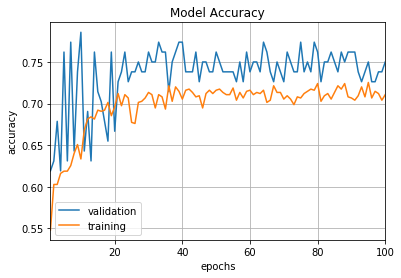

84/84 [==============================] - 0s 285us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [-0.8088630068869818, 0.75]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 13s - loss: -7.2898e-01 - acc: 0.6040 - val_loss: -7.4871e-01 - val_acc: 0.6905
Epoch 2/100
 - 0s - loss: -7.3509e-01 - acc: 0.6240 - val_loss: -7.6090e-01 - val_acc: 0.6786
Epoch 3/100
 - 0s - loss: -7.3708e-01 - acc: 0.6227 - val_loss: -7.6258e-01 - val_acc: 0.6905
Epoch 4/100
 - 0s - loss: -7.3796e-01 - acc: 0.6160 - val_loss: -7.6472e-01 - val_acc: 0.6905
Epoch 5/100
 - 1s - loss: -7.4150e-01 - acc: 0.6360 - val_loss: -7.5033e-01 - val_acc: 0.7024
Epoch 6/100
 - 0s - loss: -7.4320e-01 - acc: 0.6467 - val_loss: -7.6658e-01 - val_acc: 0.7024
Epoch 7/100
 - 0s - loss: -7.4680e-01 - acc: 0.6427 - val_l

Epoch 84/100
 - 0s - loss: -7.8073e-01 - acc: 0.7293 - val_loss: -7.8697e-01 - val_acc: 0.7024
Epoch 85/100
 - 0s - loss: -7.8100e-01 - acc: 0.7213 - val_loss: -7.8774e-01 - val_acc: 0.7024
Epoch 86/100
 - 0s - loss: -7.8169e-01 - acc: 0.7253 - val_loss: -7.8513e-01 - val_acc: 0.7024
Epoch 87/100
 - 0s - loss: -7.8103e-01 - acc: 0.7240 - val_loss: -7.8985e-01 - val_acc: 0.7143
Epoch 88/100
 - 1s - loss: -7.8137e-01 - acc: 0.7213 - val_loss: -7.8641e-01 - val_acc: 0.7024
Epoch 89/100
 - 0s - loss: -7.8109e-01 - acc: 0.7133 - val_loss: -7.8339e-01 - val_acc: 0.7024
Epoch 90/100
 - 0s - loss: -7.8229e-01 - acc: 0.7267 - val_loss: -7.7862e-01 - val_acc: 0.7262
Epoch 91/100
 - 1s - loss: -7.7958e-01 - acc: 0.7200 - val_loss: -7.8847e-01 - val_acc: 0.7024
Epoch 92/100
 - 0s - loss: -7.8137e-01 - acc: 0.7240 - val_loss: -7.8318e-01 - val_acc: 0.7262
Epoch 93/100
 - 0s - loss: -7.8008e-01 - acc: 0.7160 - val_loss: -7.8517e-01 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: -7.8221e-01 - acc: 0.72

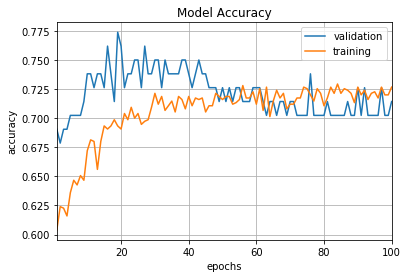

84/84 [==============================] - 0s 223us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [-0.7885079837980724, 0.7142857199623471]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 13s - loss: -5.8476e-01 - acc: 0.4773 - val_loss: -7.0484e-01 - val_acc: 0.5238
Epoch 2/100
 - 0s - loss: -7.2838e-01 - acc: 0.6160 - val_loss: -6.8990e-01 - val_acc: 0.5238
Epoch 3/100
 - 0s - loss: -7.3022e-01 - acc: 0.6107 - val_loss: -6.9298e-01 - val_acc: 0.5238
Epoch 4/100
 - 1s - loss: -7.3148e-01 - acc: 0.6107 - val_loss: -7.0617e-01 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: -7.3185e-01 - acc: 0.6120 - val_loss: -6.8957e-01 - val_acc: 0.5238
Epoch 6/100
 - 0s - loss: -7.3165e-01 - acc: 0.6133 - val_loss: -7.0113e-01 - val_acc: 0.5238
Epoch 7/100
 - 0s - loss: -7.3826e-01 - acc: 

Epoch 84/100
 - 1s - loss: -7.8666e-01 - acc: 0.7267 - val_loss: -7.3664e-01 - val_acc: 0.6429
Epoch 85/100
 - 0s - loss: -7.8571e-01 - acc: 0.7320 - val_loss: -7.3717e-01 - val_acc: 0.6429
Epoch 86/100
 - 1s - loss: -7.8609e-01 - acc: 0.7320 - val_loss: -7.2911e-01 - val_acc: 0.6429
Epoch 87/100
 - 0s - loss: -7.8803e-01 - acc: 0.7320 - val_loss: -7.3800e-01 - val_acc: 0.6429
Epoch 88/100
 - 0s - loss: -7.8594e-01 - acc: 0.7253 - val_loss: -7.2817e-01 - val_acc: 0.6429
Epoch 89/100
 - 0s - loss: -7.8709e-01 - acc: 0.7307 - val_loss: -7.3069e-01 - val_acc: 0.6429
Epoch 90/100
 - 0s - loss: -7.8640e-01 - acc: 0.7320 - val_loss: -7.3238e-01 - val_acc: 0.6310
Epoch 91/100
 - 0s - loss: -7.8620e-01 - acc: 0.7253 - val_loss: -7.1793e-01 - val_acc: 0.6429
Epoch 92/100
 - 1s - loss: -7.8752e-01 - acc: 0.7227 - val_loss: -7.2732e-01 - val_acc: 0.6310
Epoch 93/100
 - 0s - loss: -7.8502e-01 - acc: 0.7320 - val_loss: -7.4146e-01 - val_acc: 0.6429
Epoch 94/100
 - 0s - loss: -7.8364e-01 - acc: 0.71

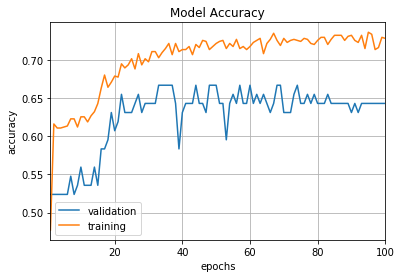

84/84 [==============================] - 0s 318us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [-0.7424324807666597, 0.6428571371805101]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 13s - loss: -7.3262e-01 - acc: 0.6165 - val_loss: -7.4689e-01 - val_acc: 0.7229
Epoch 2/100
 - 0s - loss: -7.3549e-01 - acc: 0.6325 - val_loss: -7.6511e-01 - val_acc: 0.6867
Epoch 3/100
 - 0s - loss: -7.3888e-01 - acc: 0.6152 - val_loss: -7.6012e-01 - val_acc: 0.6988
Epoch 4/100
 - 0s - loss: -7.4060e-01 - acc: 0.6405 - val_loss: -7.6532e-01 - val_acc: 0.6747
Epoch 5/100
 - 1s - loss: -7.4061e-01 - acc: 0.6258 - val_loss: -7.4920e-01 - val_acc: 0.7349
Epoch 6/100
 - 0s - loss: -7.3840e-01 - acc: 0.6352 - val_loss: -7.6877e-01 - val_acc: 0.6867
Epoch 7/100
 - 1s - loss: -7.4486e-01 - acc: 

Epoch 84/100
 - 1s - loss: -7.8166e-01 - acc: 0.7164 - val_loss: -7.8512e-01 - val_acc: 0.7470
Epoch 85/100
 - 1s - loss: -7.8078e-01 - acc: 0.7164 - val_loss: -7.9332e-01 - val_acc: 0.7590
Epoch 86/100
 - 0s - loss: -7.8068e-01 - acc: 0.7097 - val_loss: -7.7268e-01 - val_acc: 0.7349
Epoch 87/100
 - 1s - loss: -7.8125e-01 - acc: 0.7177 - val_loss: -7.9097e-01 - val_acc: 0.7711
Epoch 88/100
 - 0s - loss: -7.7984e-01 - acc: 0.7124 - val_loss: -7.8529e-01 - val_acc: 0.7470
Epoch 89/100
 - 1s - loss: -7.7825e-01 - acc: 0.7057 - val_loss: -7.8798e-01 - val_acc: 0.7711
Epoch 90/100
 - 0s - loss: -7.8159e-01 - acc: 0.7204 - val_loss: -7.8065e-01 - val_acc: 0.7229
Epoch 91/100
 - 0s - loss: -7.8222e-01 - acc: 0.7244 - val_loss: -7.6768e-01 - val_acc: 0.7349
Epoch 92/100
 - 1s - loss: -7.7943e-01 - acc: 0.7217 - val_loss: -7.6603e-01 - val_acc: 0.7229
Epoch 93/100
 - 0s - loss: -7.8052e-01 - acc: 0.7057 - val_loss: -7.9033e-01 - val_acc: 0.7711
Epoch 94/100
 - 1s - loss: -7.8194e-01 - acc: 0.71

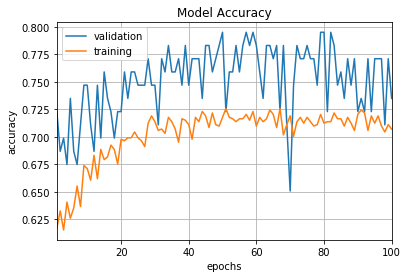

83/83 [==============================] - 0s 244us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [-0.7707506432590714, 0.7349397654992988]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 13s - loss: -5.6845e-01 - acc: 0.4727 - val_loss: -7.0846e-01 - val_acc: 0.5783
Epoch 2/100
 - 1s - loss: -7.2146e-01 - acc: 0.5979 - val_loss: -7.1403e-01 - val_acc: 0.5783
Epoch 3/100
 - 1s - loss: -7.2457e-01 - acc: 0.6032 - val_loss: -7.1569e-01 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: -7.2630e-01 - acc: 0.5939 - val_loss: -7.1879e-01 - val_acc: 0.5783
Epoch 5/100
 - 0s - loss: -7.2635e-01 - acc: 0.6112 - val_loss: -7.1512e-01 - val_acc: 0.5783
Epoch 6/100
 - 1s - loss: -7.2743e-01 - acc: 0.6019 - val_loss: -7.2203e-01 - val_acc: 0.5783
Epoch 7/100
 - 1s - loss: -7.3117e-01 - acc: 

Epoch 84/100
 - 1s - loss: -7.8227e-01 - acc: 0.7297 - val_loss: -7.6895e-01 - val_acc: 0.6627
Epoch 85/100
 - 1s - loss: -7.8259e-01 - acc: 0.7124 - val_loss: -7.6906e-01 - val_acc: 0.6867
Epoch 86/100
 - 1s - loss: -7.8098e-01 - acc: 0.7230 - val_loss: -7.6844e-01 - val_acc: 0.6265
Epoch 87/100
 - 1s - loss: -7.8076e-01 - acc: 0.7270 - val_loss: -7.6891e-01 - val_acc: 0.6747
Epoch 88/100
 - 0s - loss: -7.8092e-01 - acc: 0.7150 - val_loss: -7.6768e-01 - val_acc: 0.7108
Epoch 89/100
 - 1s - loss: -7.8166e-01 - acc: 0.7257 - val_loss: -7.6836e-01 - val_acc: 0.6265
Epoch 90/100
 - 1s - loss: -7.8086e-01 - acc: 0.7164 - val_loss: -7.6914e-01 - val_acc: 0.6988
Epoch 91/100
 - 1s - loss: -7.8013e-01 - acc: 0.7244 - val_loss: -7.6837e-01 - val_acc: 0.6265
Epoch 92/100
 - 1s - loss: -7.8239e-01 - acc: 0.7244 - val_loss: -7.6791e-01 - val_acc: 0.6265
Epoch 93/100
 - 1s - loss: -7.8188e-01 - acc: 0.7217 - val_loss: -7.6938e-01 - val_acc: 0.6988
Epoch 94/100
 - 1s - loss: -7.8103e-01 - acc: 0.70

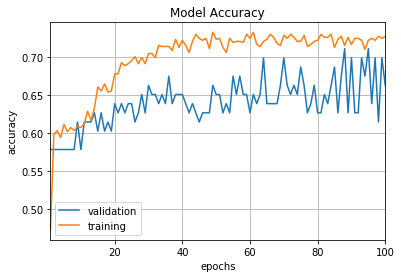

83/83 [==============================] - 0s 247us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [-0.7694266876542425, 0.662650606718408]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 13s - loss: -7.0127e-01 - acc: 0.5220 - val_loss: -7.2920e-01 - val_acc: 0.6145
Epoch 2/100
 - 1s - loss: -7.2616e-01 - acc: 0.6005 - val_loss: -7.2924e-01 - val_acc: 0.6145
Epoch 3/100
 - 1s - loss: -7.2646e-01 - acc: 0.6005 - val_loss: -7.2994e-01 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: -7.2684e-01 - acc: 0.6005 - val_loss: -7.3007e-01 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: -7.2715e-01 - acc: 0.6005 - val_loss: -7.2972e-01 - val_acc: 0.6145
Epoch 6/100
 - 1s - loss: -7.2709e-01 - acc: 0.6005 - val_loss: -7.3096e-01 - val_acc: 0.6145
Epoch 7/100
 - 1s - loss: -7.2846e-01 - acc: 0

Epoch 84/100
 - 1s - loss: -7.8213e-01 - acc: 0.7177 - val_loss: -7.5920e-01 - val_acc: 0.6867
Epoch 85/100
 - 1s - loss: -7.8319e-01 - acc: 0.7244 - val_loss: -7.6000e-01 - val_acc: 0.6988
Epoch 86/100
 - 1s - loss: -7.8147e-01 - acc: 0.7111 - val_loss: -7.5814e-01 - val_acc: 0.6627
Epoch 87/100
 - 1s - loss: -7.8321e-01 - acc: 0.7150 - val_loss: -7.5975e-01 - val_acc: 0.6988
Epoch 88/100
 - 1s - loss: -7.8332e-01 - acc: 0.7150 - val_loss: -7.5848e-01 - val_acc: 0.6627
Epoch 89/100
 - 1s - loss: -7.8376e-01 - acc: 0.7244 - val_loss: -7.5712e-01 - val_acc: 0.6627
Epoch 90/100
 - 1s - loss: -7.8317e-01 - acc: 0.7124 - val_loss: -7.6117e-01 - val_acc: 0.7108
Epoch 91/100
 - 1s - loss: -7.8382e-01 - acc: 0.7204 - val_loss: -7.5736e-01 - val_acc: 0.6627
Epoch 92/100
 - 1s - loss: -7.8439e-01 - acc: 0.7204 - val_loss: -7.5974e-01 - val_acc: 0.6867
Epoch 93/100
 - 1s - loss: -7.8454e-01 - acc: 0.7190 - val_loss: -7.6116e-01 - val_acc: 0.7108
Epoch 94/100
 - 1s - loss: -7.8395e-01 - acc: 0.71

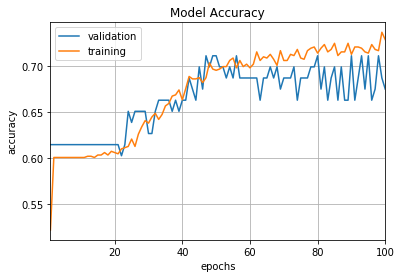

83/83 [==============================] - 0s 191us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [-0.7558762732758579, 0.6746987944625946]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 14s - loss: -7.2729e-01 - acc: 0.6045 - val_loss: -7.3269e-01 - val_acc: 0.5904
Epoch 2/100
 - 1s - loss: -7.3567e-01 - acc: 0.6072 - val_loss: -7.4226e-01 - val_acc: 0.6506
Epoch 3/100
 - 1s - loss: -7.4058e-01 - acc: 0.6312 - val_loss: -7.4502e-01 - val_acc: 0.6747
Epoch 4/100
 - 1s - loss: -7.3770e-01 - acc: 0.6232 - val_loss: -7.4238e-01 - val_acc: 0.6867
Epoch 5/100
 - 1s - loss: -7.4001e-01 - acc: 0.6338 - val_loss: -7.4959e-01 - val_acc: 0.6988
Epoch 6/100
 - 0s - loss: -7.4759e-01 - acc: 0.6538 - val_loss: -7.5126e-01 - val_acc: 0.6747
Epoch 7/100
 - 1s - loss: -7.5163e-01 - acc: 

Epoch 84/100
 - 1s - loss: -7.8219e-01 - acc: 0.7244 - val_loss: -7.8976e-01 - val_acc: 0.7349
Epoch 85/100
 - 1s - loss: -7.7949e-01 - acc: 0.7164 - val_loss: -7.9089e-01 - val_acc: 0.7590
Epoch 86/100
 - 1s - loss: -7.8238e-01 - acc: 0.7244 - val_loss: -7.9047e-01 - val_acc: 0.7590
Epoch 87/100
 - 1s - loss: -7.8248e-01 - acc: 0.7177 - val_loss: -7.9098e-01 - val_acc: 0.7590
Epoch 88/100
 - 1s - loss: -7.8086e-01 - acc: 0.7244 - val_loss: -7.8972e-01 - val_acc: 0.7711
Epoch 89/100
 - 1s - loss: -7.8171e-01 - acc: 0.7177 - val_loss: -7.8608e-01 - val_acc: 0.7470
Epoch 90/100
 - 1s - loss: -7.7895e-01 - acc: 0.7150 - val_loss: -7.9171e-01 - val_acc: 0.7590
Epoch 91/100
 - 1s - loss: -7.8063e-01 - acc: 0.7270 - val_loss: -7.8425e-01 - val_acc: 0.7349
Epoch 92/100
 - 1s - loss: -7.8180e-01 - acc: 0.7230 - val_loss: -7.9137e-01 - val_acc: 0.7590
Epoch 93/100
 - 1s - loss: -7.7998e-01 - acc: 0.7190 - val_loss: -7.8957e-01 - val_acc: 0.7349
Epoch 94/100
 - 1s - loss: -7.8147e-01 - acc: 0.72

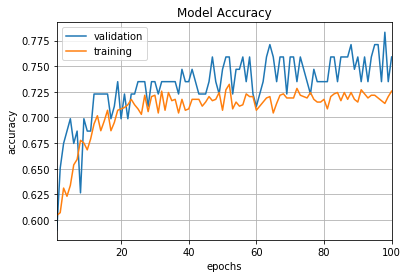

83/83 [==============================] - 0s 193us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [-0.7931139979017786, 0.7590361460145697]
 best Score: 0.7590361460145697          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 14s - loss: -7.3159e-01 - acc: 0.6112 - val_loss: -7.2788e-01 - val_acc: 0.5904
Epoch 2/100
 - 1s - loss: -7.3794e-01 - acc: 0.6019 - val_loss: -7.3298e-01 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: -7.4190e-01 - acc: 0.6032 - val_loss: -7.3492e-01 - val_acc: 0.5904
Epoch 4/100
 - 1s - loss: -7.4508e-01 - acc: 0.6112 - val_loss: -7.3893e-01 - val_acc: 0.6024
Epoch 5/100
 - 1s - loss: -7.4880e-01 - acc: 0.6298 - val_loss: -7.4185e-01 - val_acc: 0.6024
Epoch 6/100
 - 1s - loss: -7.5165e-01 - acc: 0.6471 - val_loss: -7.4514e-01 - val_acc: 0.6145
Epoch 7/100
 - 1s - loss: -7.54

 - 1s - loss: -7.8270e-01 - acc: 0.7164 - val_loss: -7.6242e-01 - val_acc: 0.6867
Epoch 84/100
 - 1s - loss: -7.8425e-01 - acc: 0.7230 - val_loss: -7.5548e-01 - val_acc: 0.6747
Epoch 85/100
 - 1s - loss: -7.8325e-01 - acc: 0.7257 - val_loss: -7.6163e-01 - val_acc: 0.6867
Epoch 86/100
 - 1s - loss: -7.8101e-01 - acc: 0.7324 - val_loss: -7.6246e-01 - val_acc: 0.6867
Epoch 87/100
 - 1s - loss: -7.8428e-01 - acc: 0.7257 - val_loss: -7.6087e-01 - val_acc: 0.6867
Epoch 88/100
 - 1s - loss: -7.8301e-01 - acc: 0.7230 - val_loss: -7.5798e-01 - val_acc: 0.6867
Epoch 89/100
 - 1s - loss: -7.8353e-01 - acc: 0.7350 - val_loss: -7.6348e-01 - val_acc: 0.6867
Epoch 90/100
 - 1s - loss: -7.8277e-01 - acc: 0.7257 - val_loss: -7.6355e-01 - val_acc: 0.6867
Epoch 91/100
 - 1s - loss: -7.8427e-01 - acc: 0.7257 - val_loss: -7.5840e-01 - val_acc: 0.6867
Epoch 92/100
 - 1s - loss: -7.8434e-01 - acc: 0.7364 - val_loss: -7.5463e-01 - val_acc: 0.6747
Epoch 93/100
 - 1s - loss: -7.8419e-01 - acc: 0.7324 - val_loss

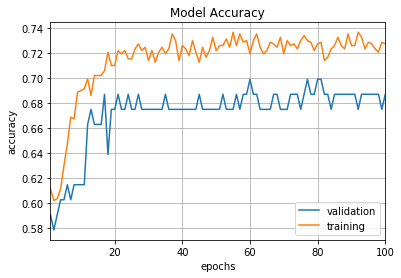

83/83 [==============================] - 0s 265us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [-0.7637750398681824, 0.6867469904652561]
 best Score: 0.7590361460145697          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 14s - loss: -6.9532e-01 - acc: 0.5646 - val_loss: -7.2068e-01 - val_acc: 0.6024
Epoch 2/100
 - 1s - loss: -7.2251e-01 - acc: 0.6045 - val_loss: -7.2541e-01 - val_acc: 0.6145
Epoch 3/100
 - 1s - loss: -7.2280e-01 - acc: 0.6019 - val_loss: -7.2908e-01 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: -7.2823e-01 - acc: 0.6218 - val_loss: -7.3163e-01 - val_acc: 0.6145
Epoch 5/100
 - 1s - loss: -7.2961e-01 - acc: 0.6285 - val_loss: -7.3185e-01 - val_acc: 0.6265
Epoch 6/100
 - 1s - loss: -7.3071e-01 - acc: 0.6205 - val_loss: -7.3561e-01 - val_acc: 0.6265
Epoch 7/100
 - 1s - loss: -7.3

 - 1s - loss: -7.8032e-01 - acc: 0.7150 - val_loss: -7.9507e-01 - val_acc: 0.7590
Epoch 84/100
 - 0s - loss: -7.8124e-01 - acc: 0.7084 - val_loss: -7.9628e-01 - val_acc: 0.7711
Epoch 85/100
 - 1s - loss: -7.8052e-01 - acc: 0.7057 - val_loss: -7.9562e-01 - val_acc: 0.7590
Epoch 86/100
 - 1s - loss: -7.8157e-01 - acc: 0.7137 - val_loss: -7.9492e-01 - val_acc: 0.7590
Epoch 87/100
 - 1s - loss: -7.8073e-01 - acc: 0.7204 - val_loss: -7.9379e-01 - val_acc: 0.7590
Epoch 88/100
 - 1s - loss: -7.8078e-01 - acc: 0.7111 - val_loss: -7.9567e-01 - val_acc: 0.7590
Epoch 89/100
 - 1s - loss: -7.8046e-01 - acc: 0.7137 - val_loss: -7.9487e-01 - val_acc: 0.7590
Epoch 90/100
 - 1s - loss: -7.7927e-01 - acc: 0.7164 - val_loss: -7.8871e-01 - val_acc: 0.7349
Epoch 91/100
 - 1s - loss: -7.8028e-01 - acc: 0.7164 - val_loss: -7.9483e-01 - val_acc: 0.7590
Epoch 92/100
 - 1s - loss: -7.7780e-01 - acc: 0.7057 - val_loss: -7.9224e-01 - val_acc: 0.7349
Epoch 93/100
 - 1s - loss: -7.8113e-01 - acc: 0.7111 - val_loss

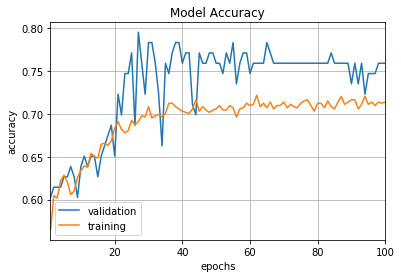

83/83 [==============================] - 0s 229us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [-0.7961860557636583, 0.7590361474508263]
 best Score: 0.7590361474508263          
-------------------------------------------------------------------------------------------




In [47]:
batch_size = 10
num_classes = 2
epochs = 100
input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.cosine_proximity,
                  optimizer=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [48]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7590361474508263
0.7062822739163555


[[-0.7636483283269972, 0.678571431409745],
 [-0.8088630068869818, 0.75],
 [-0.7885079837980724, 0.7142857199623471],
 [-0.7424324807666597, 0.6428571371805101],
 [-0.7707506432590714, 0.7349397654992988],
 [-0.7694266876542425, 0.662650606718408],
 [-0.7558762732758579, 0.6746987944625946],
 [-0.7931139979017786, 0.7590361460145697],
 [-0.7637750398681824, 0.6867469904652561],
 [-0.7961860557636583, 0.7590361474508263]]

In [49]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7218228136442313


[0.7239999977747599,
 0.7106666688124339,
 0.7266666646798452,
 0.7279999979337056,
 0.7070572585780198,
 0.7270306262290589,
 0.7283621816914504,
 0.7256990687031244,
 0.7270306246417182,
 0.7137150473981977]

In [50]:
kfold_validation_score_store

[[-0.7636483283269972, 0.678571431409745],
 [-0.8088630068869818, 0.75],
 [-0.7885079837980724, 0.7142857199623471],
 [-0.7424324807666597, 0.6428571371805101],
 [-0.7707506432590714, 0.7349397654992988],
 [-0.7694266876542425, 0.662650606718408],
 [-0.7558762732758579, 0.6746987944625946],
 [-0.7931139979017786, 0.7590361460145697],
 [-0.7637750398681824, 0.6867469904652561],
 [-0.7961860557636583, 0.7590361474508263]]